## Zillow Time Series Data

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

## Data Collection

In [2]:
zillow_df = pd.read_csv('../data/raw/zillow_data.csv')

In [3]:
zillow_df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [4]:
len(zillow_df['RegionID'].unique())==len(zillow_df)

True

In [5]:
len(zillow_df['City'].unique())

7554

In [6]:
chicago_df = zillow_df[zillow_df['City']=='Chicago']

In [7]:
zillow_dates = chicago_df[chicago_df.columns[7:]]
zillow_dates.head()

1996-04   1996-05   1996-06   1996-07   1996-08   1996-09   1996-10  \
0   334200.0  335400.0  336500.0  337600.0  338500.0  339500.0  340400.0   
3   498100.0  500900.0  503100.0  504600.0  505500.0  505700.0  505300.0   
7   216500.0  216700.0  216900.0  217000.0  217100.0  217200.0  217500.0   
16  122700.0  122800.0  122800.0  122700.0  122400.0  122000.0  121500.0   
19  142600.0  143100.0  143400.0  143300.0  142900.0  142200.0  141300.0   

     1996-11   1996-12   1997-01  ...  2017-07  2017-08  2017-09  2017-10  \
0   341300.0  342600.0  344400.0  ...  1005500  1007500  1007800  1009600   
3   504200.0  503600.0  503400.0  ...  1289800  1287700  1287400  1291500   
7   217900.0  218600.0  219700.0  ...   798000   787100   776100   774900   
16  120900.0  120500.0  120300.0  ...   459600   461400   464300   466500   
19  140100.0  139000.0  138000.0  ...   462700   461200   459900   459200   

    2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0   1013300  1018700  1024400  1030700  1033800  1030600  
3   1296600  1299000  1302700  1306400  1308500  1307000  
7    777900   777900   778500   780500   782800   782800  
16   467900   470600   474500   475100   472600   470200  
19   458700   457900   457400   459000   462500   464300  

[5 rows x 265 columns]

In [8]:
zillow_T = zillow_dates.T
zillow_T.reset_index(inplace=True)

In [9]:
chicago_index = zillow_df.index[zillow_df['City']=='Chicago']
chicago_index

Int64Index([   0,    3,    7,   16,   19,   40,   48,   50,   74,   79,  105,
             150,  157,  215,  231,  284,  318,  324,  332,  347,  497,  638,
             658,  739,  792, 1012, 1360, 1454, 1496, 1727, 1990, 2360, 2420,
            2585, 2830, 3149, 3156, 3960, 4040, 4362, 7863],
           dtype='int64')

In [10]:
chicago_index = chicago_index.astype(str)

In [11]:
zillow_T.rename(columns={'index':'date'}, inplace=True)
zillow_T.head()

date         0         3         7        16        19        40  \
0  1996-04  334200.0  498100.0  216500.0  122700.0  142600.0  297900.0   
1  1996-05  335400.0  500900.0  216700.0  122800.0  143100.0  300400.0   
2  1996-06  336500.0  503100.0  216900.0  122800.0  143400.0  302600.0   
3  1996-07  337600.0  504600.0  217000.0  122700.0  143300.0  304700.0   
4  1996-08  338500.0  505500.0  217100.0  122400.0  142900.0  306600.0   

        48        50       74  ...      2360      2420      2585      2830  \
0  93400.0  148900.0  76400.0  ...  100900.0  215600.0  165400.0  103700.0   
1  94100.0  149300.0  77000.0  ...  101400.0  215100.0  165300.0  104400.0   
2  94600.0  149600.0  77400.0  ...  101900.0  214500.0  165000.0  104700.0   
3  94800.0  149700.0  77700.0  ...  102300.0  213900.0  164600.0  104700.0   
4  94700.0  149700.0  77700.0  ...  102700.0  213200.0  164100.0  104400.0   

       3149      3156      3960      4040      4362     7863  
0  180900.0  166300.0  125700.0  197300.0  224100.0  77900.0  
1  182200.0  166900.0  126300.0  198900.0  223300.0  78200.0  
2  183100.0  167200.0  126600.0  200100.0  222400.0  78300.0  
3  183500.0  167100.0  126500.0  200800.0  221500.0  78500.0  
4  183400.0  166900.0  126100.0  201000.0  220500.0  78500.0  

[5 rows x 42 columns]

In [12]:
zillow_T['date'] = pd.to_datetime(zillow_T['date'])
# zillow_T.info()

In [13]:
chicago_zips = zillow_df.RegionName.iloc[chicago_index.astype(int)]
chicago_zips.head()

0     60657
3     60614
7     60640
16    60647
19    60618
Name: RegionName, dtype: int64

In [14]:
zillow_T.columns = ['date']+list(chicago_zips)
zillow_chicago = zillow_T
zillow_chicago.head()

date     60657     60614     60640     60647     60618     60613  \
0 1996-04-01  334200.0  498100.0  216500.0  122700.0  142600.0  297900.0   
1 1996-05-01  335400.0  500900.0  216700.0  122800.0  143100.0  300400.0   
2 1996-06-01  336500.0  503100.0  216900.0  122800.0  143400.0  302600.0   
3 1996-07-01  337600.0  504600.0  217000.0  122700.0  143300.0  304700.0   
4 1996-08-01  338500.0  505500.0  217100.0  122400.0  142900.0  306600.0   

     60629     60625    60619  ...     60612     60607     60659     60652  \
0  93400.0  148900.0  76400.0  ...  100900.0  215600.0  165400.0  103700.0   
1  94100.0  149300.0  77000.0  ...  101400.0  215100.0  165300.0  104400.0   
2  94600.0  149600.0  77400.0  ...  101900.0  214500.0  165000.0  104700.0   
3  94800.0  149700.0  77700.0  ...  102300.0  213900.0  164600.0  104700.0   
4  94700.0  149700.0  77700.0  ...  102700.0  213200.0  164100.0  104400.0   

      60631     60656     60655     60646     60642    60633  
0  180900.0  166300.0  125700.0  197300.0  224100.0  77900.0  
1  182200.0  166900.0  126300.0  198900.0  223300.0  78200.0  
2  183100.0  167200.0  126600.0  200100.0  222400.0  78300.0  
3  183500.0  167100.0  126500.0  200800.0  221500.0  78500.0  
4  183400.0  166900.0  126100.0  201000.0  220500.0  78500.0  

[5 rows x 42 columns]

In [15]:
zillow_chicago.set_index('date', inplace=True)

After some analysis below, we went back to our original dataframe and decided to use a subset of the years from 2012 onwards. 

In [16]:
zillow_chicago = zillow_chicago.loc['2013':'2017',:]
zillow_chicago.head

<bound method NDFrame.head of                 60657      60614     60640     60647     60618      60613  \
date                                                                        
2013-01-01   802300.0  1006300.0  547400.0  299700.0  324500.0   775200.0   
2013-02-01   806100.0  1013700.0  549900.0  304600.0  327400.0   779800.0   
2013-03-01   810900.0  1024800.0  556700.0  310800.0  331400.0   783000.0   
2013-04-01   817400.0  1038300.0  566800.0  317200.0  336300.0   787300.0   
2013-05-01   826800.0  1053900.0  574000.0  322100.0  341500.0   795700.0   
2013-06-01   837900.0  1070600.0  581200.0  327300.0  347500.0   803900.0   
2013-07-01   848100.0  1089900.0  588500.0  332800.0  353000.0   811800.0   
2013-08-01   853800.0  1108100.0  591400.0  334100.0  356200.0   818500.0   
2013-09-01   856700.0  1123700.0  591700.0  332100.0  357800.0   819600.0   
2013-10-01   856600.0  1135100.0  591800.0  330400.0  359900.0   817000.0   
2013-11-01   854400.0  1141000.0  589500.0  32

## Exploratory Analysis
- Baseline model
	- Staitonarity (e.g. trends, seasonal patterns, cyclical patterns, differencing, Dickey Fuller Test)  
	- ACF
	- PACF
	- At least AR and MA models
	- Evaluation metric  

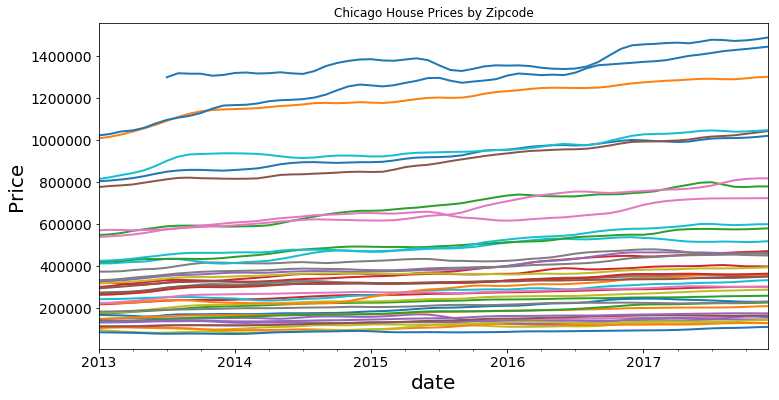

In [17]:
cat = zillow_chicago.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel('date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Chicago House Prices by Zipcode')
cat.legend().remove()


In [18]:
# cat = zillow_chicago['2014'].plot(figsize=(12,6), linewidth=2, fontsize=14)
# plt.xlabel('date', fontsize=20)
# plt.ylabel('Price', fontsize=20)
# plt.title('Chicago House Prices by Zipcode')
# cat.legend().remove()

From the previous plot, we can see there is no seasonality in the data.

In [19]:
# zillow_chicago.loc['2014',60657].plot()

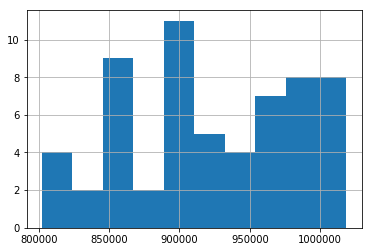

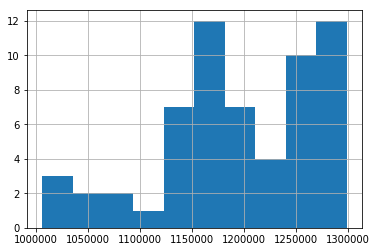

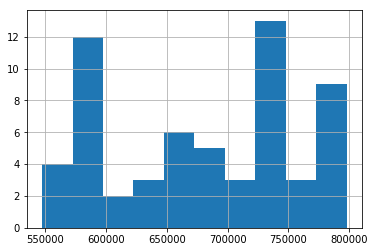

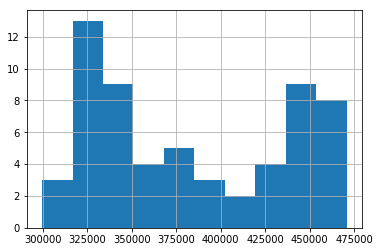

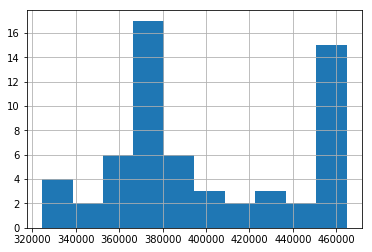

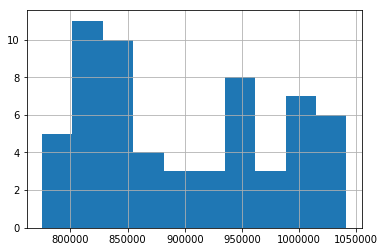

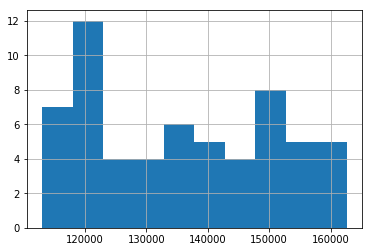

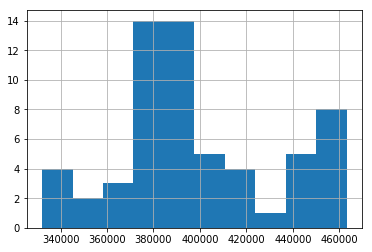

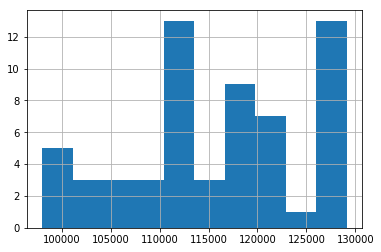

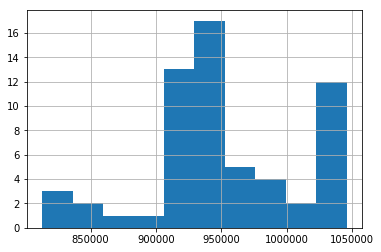

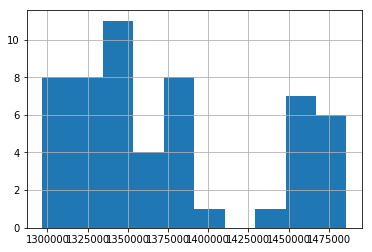

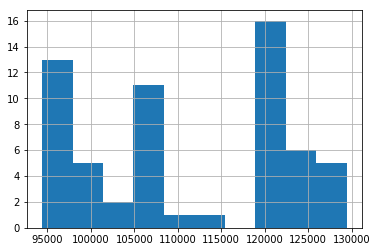

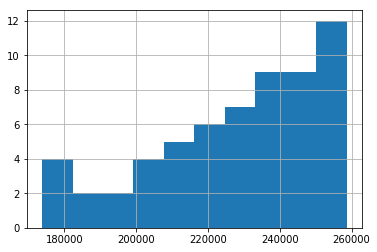

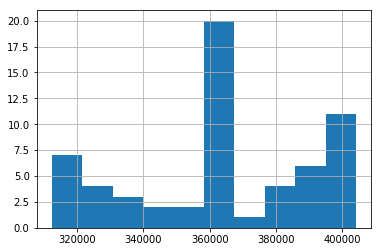

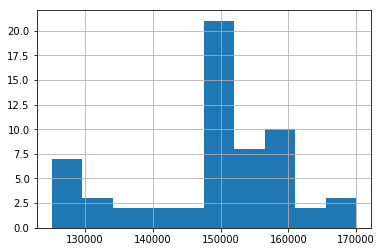

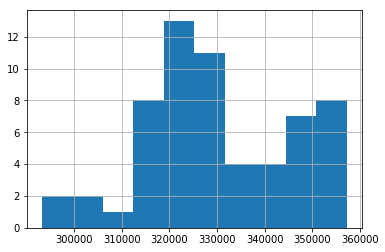

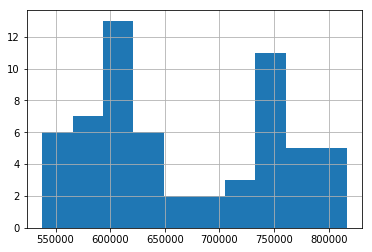

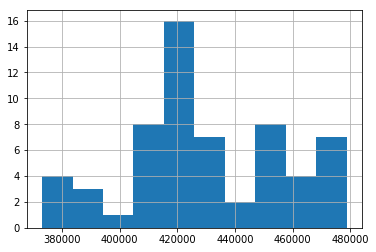

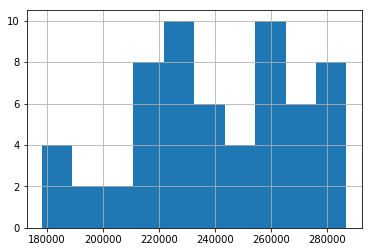

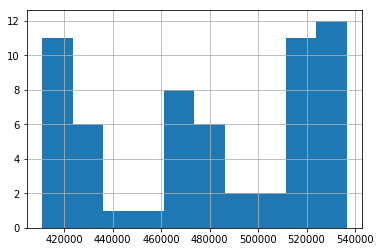

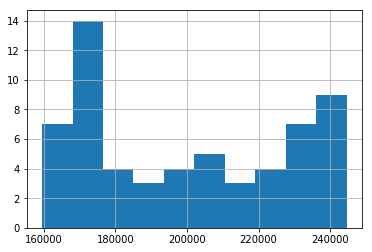

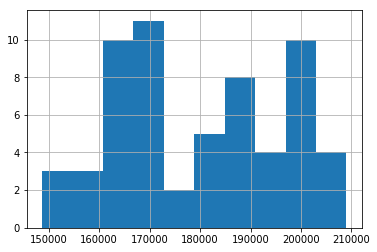

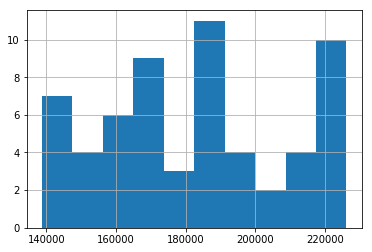

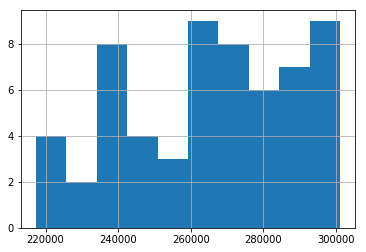

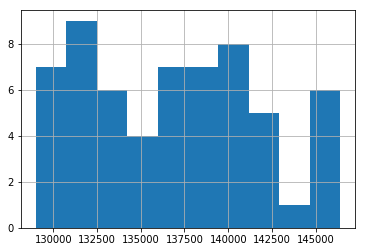

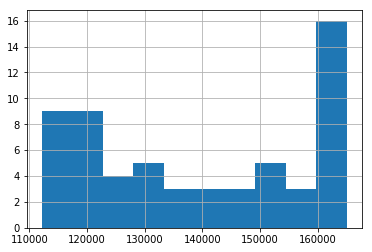

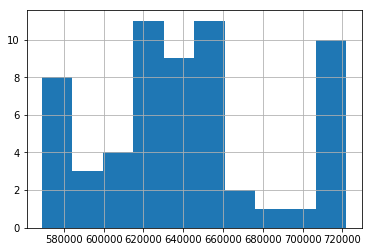

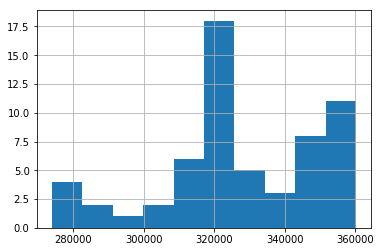

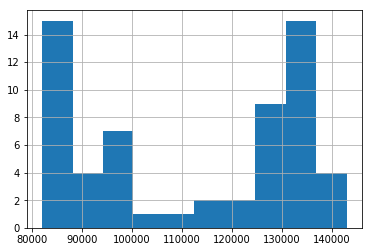

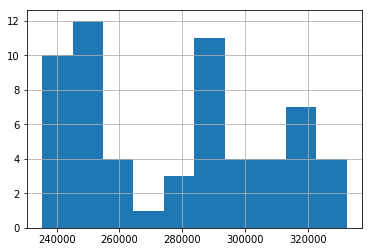

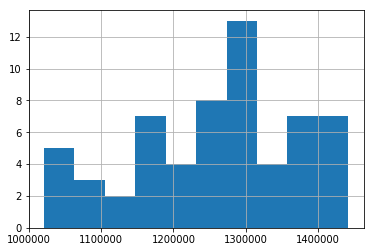

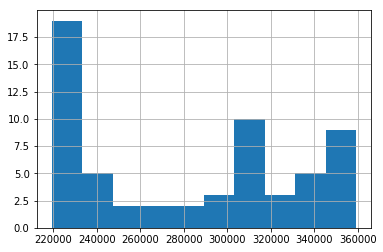

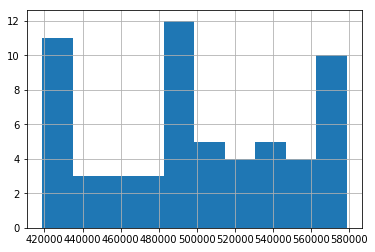

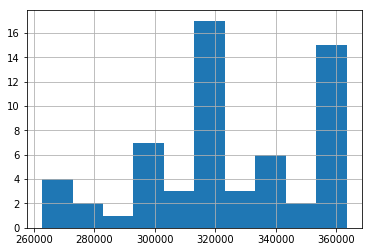

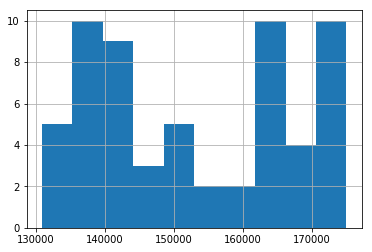

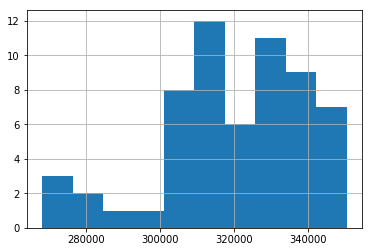

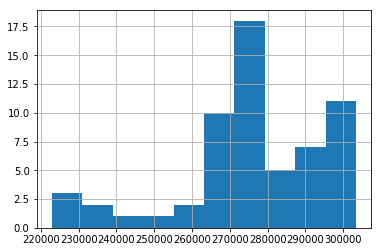

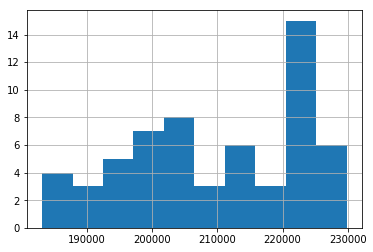

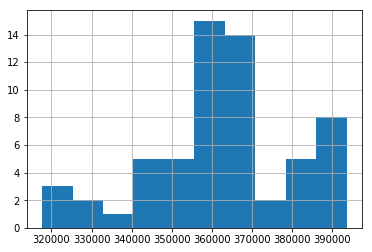

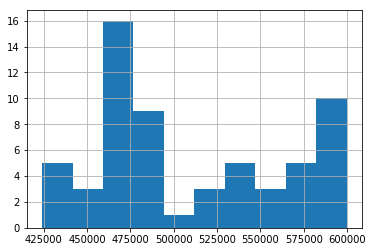

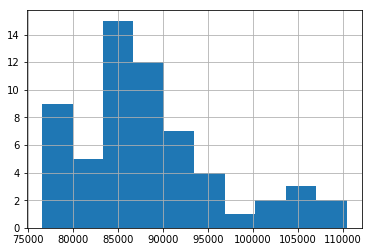

In [20]:
for zipcode in list(zillow_chicago.columns):
    zillow_chicago.loc[:,zipcode].hist()
    plt.show()
    
# price and count of where it spent the most time at which price point

In order to run analysis on the zipcode, we need to detrend our data from any trends associated with climate, season, etc. 

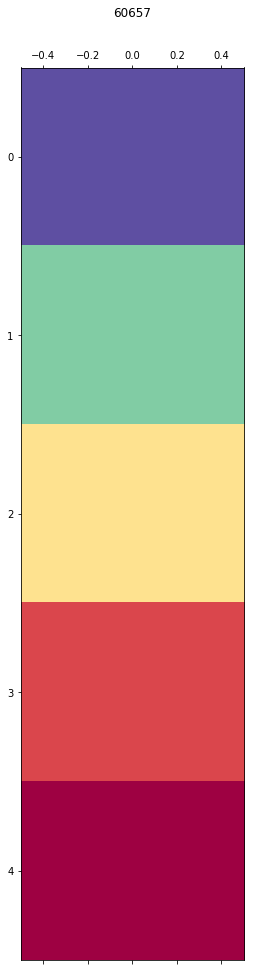

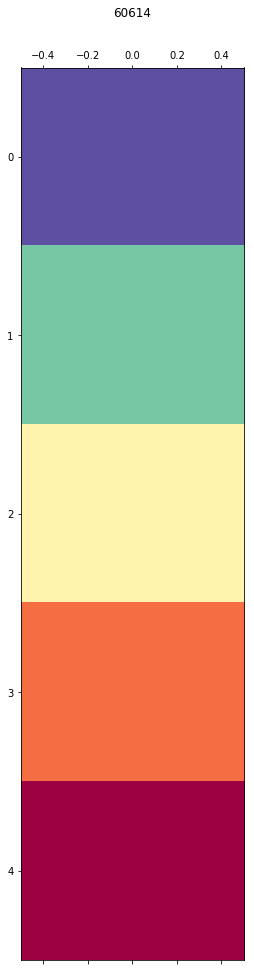

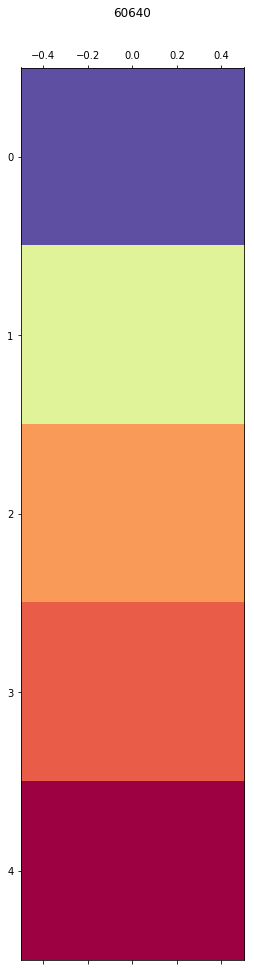

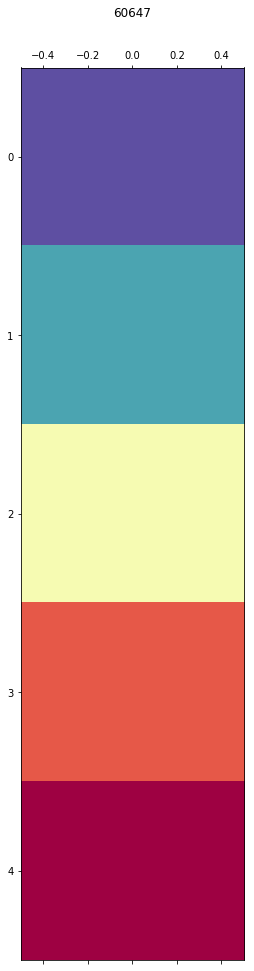

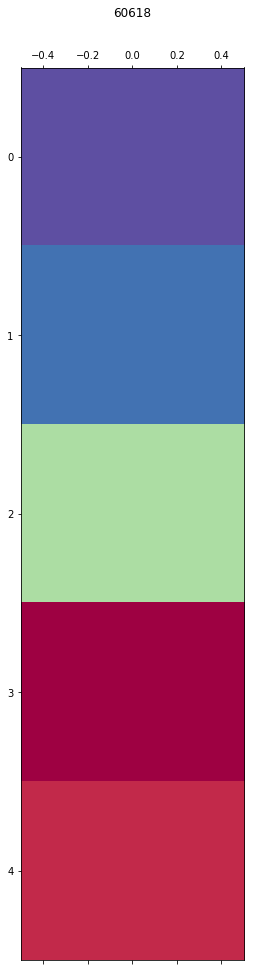

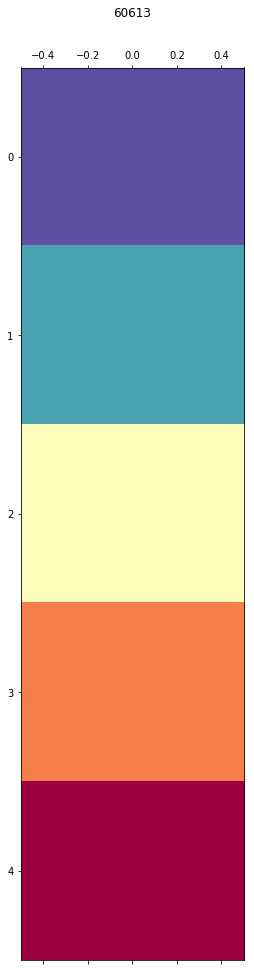

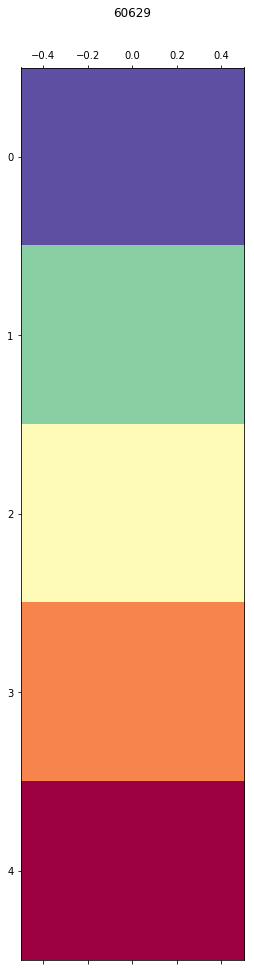

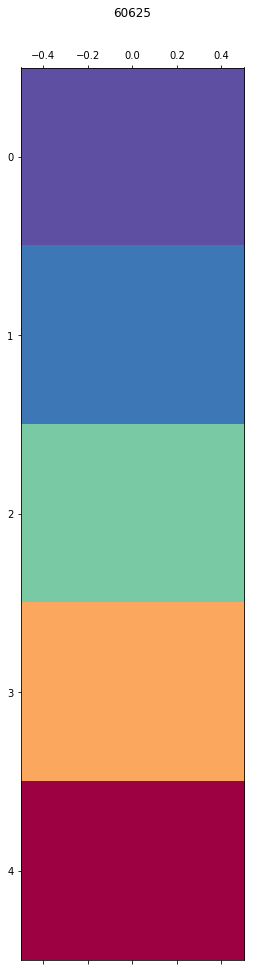

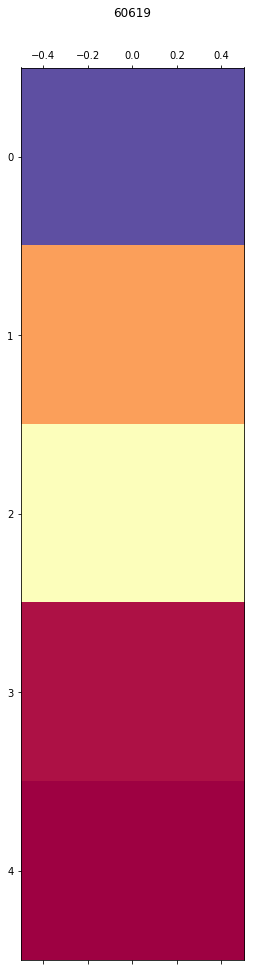

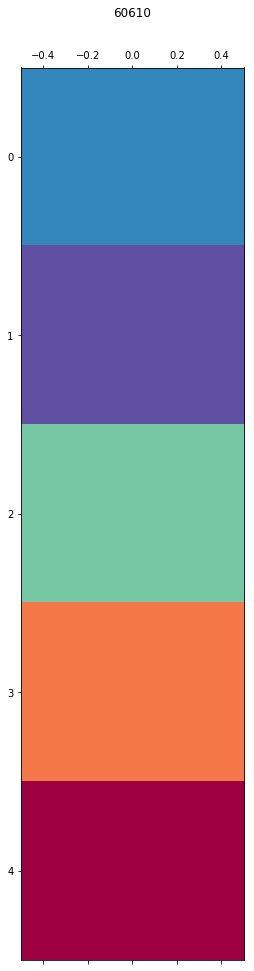

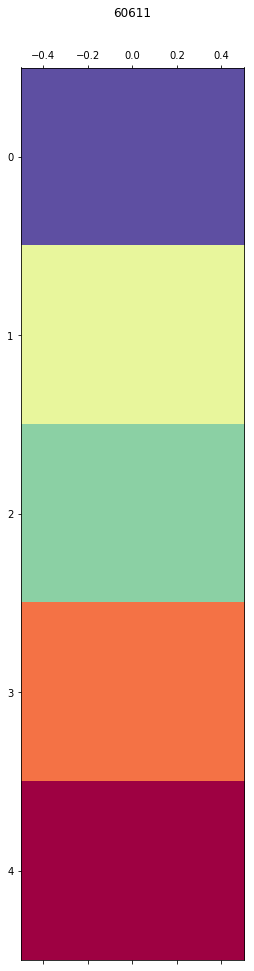

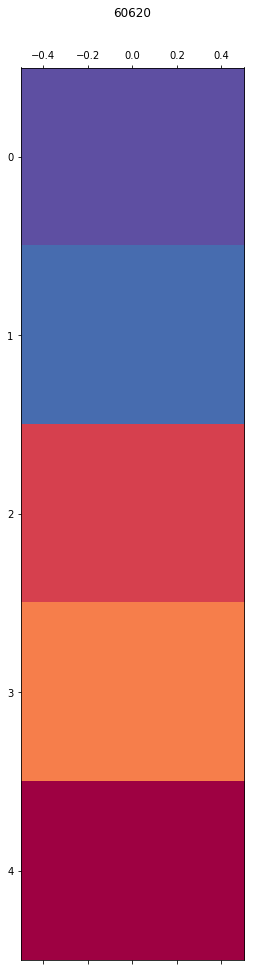

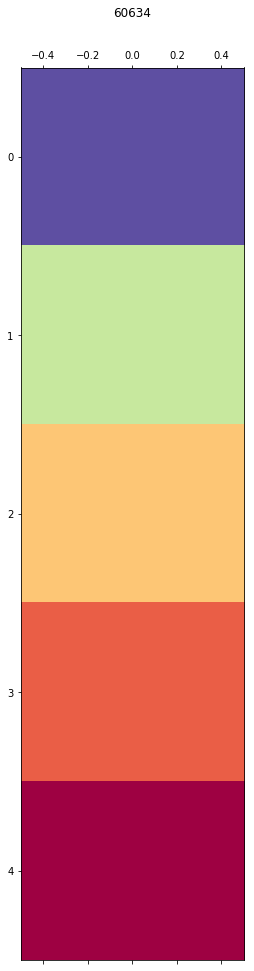

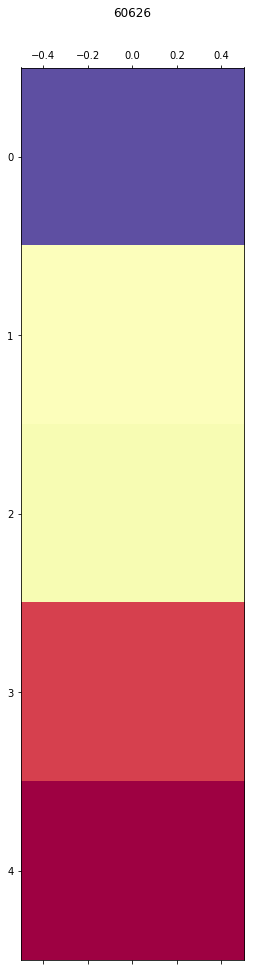

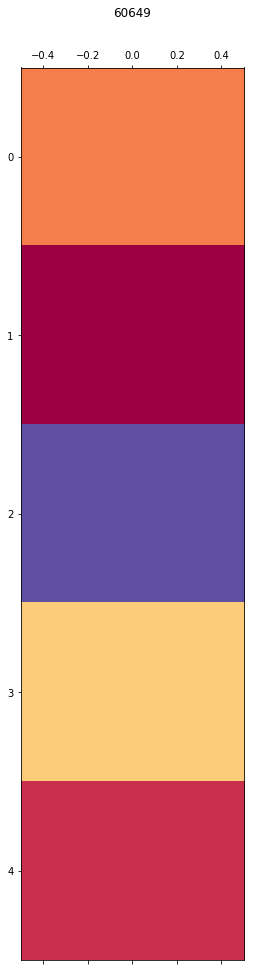

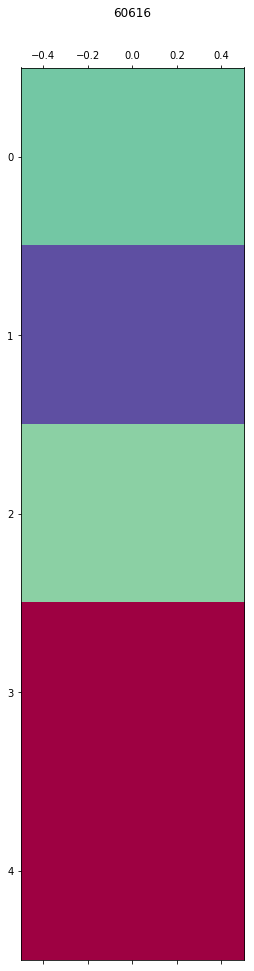

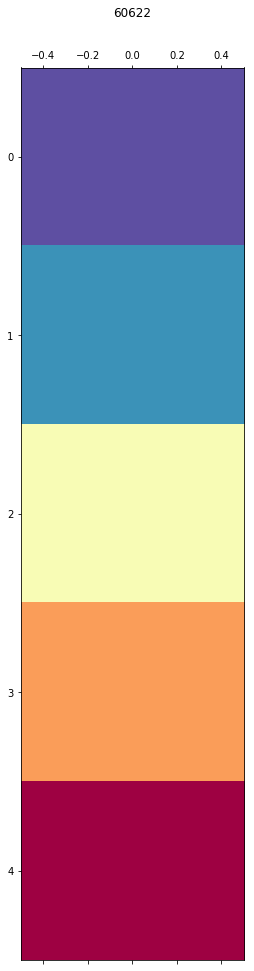

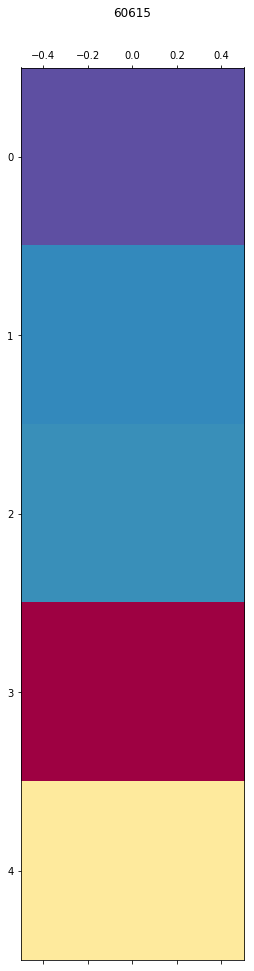

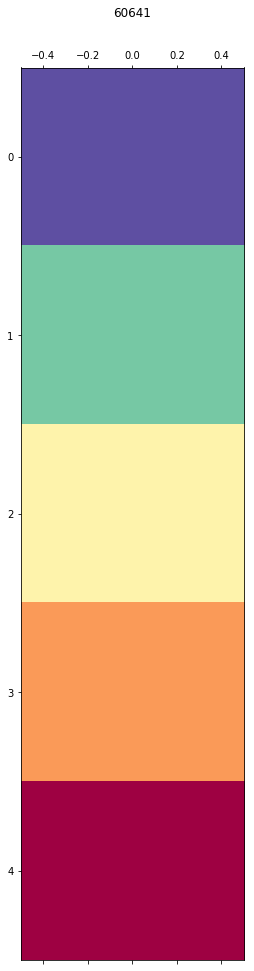

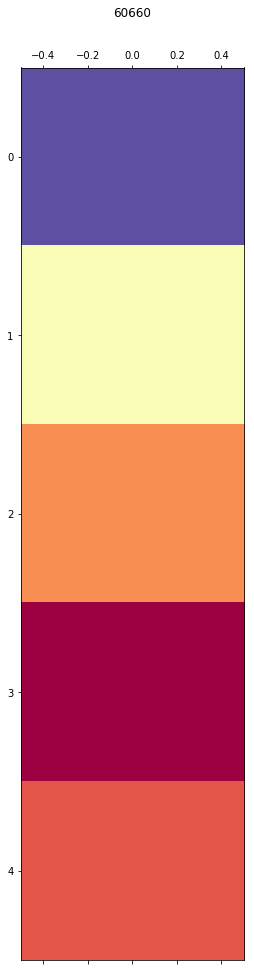

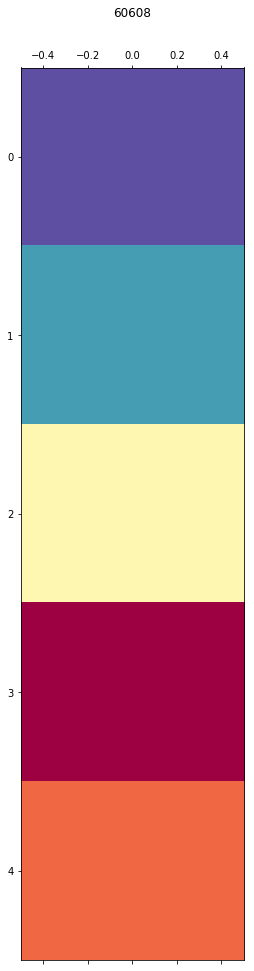

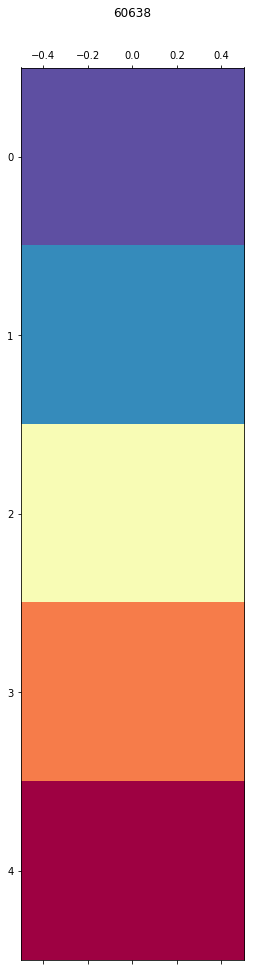

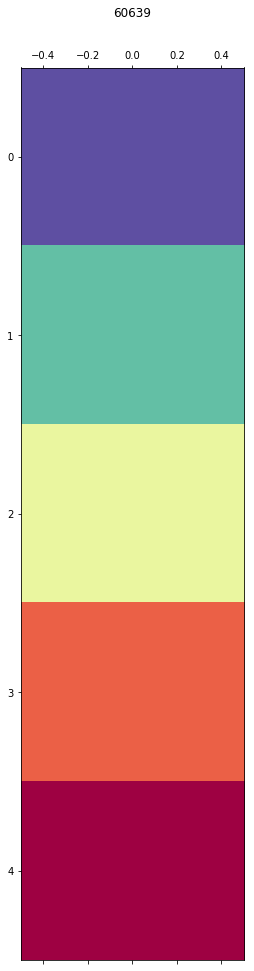

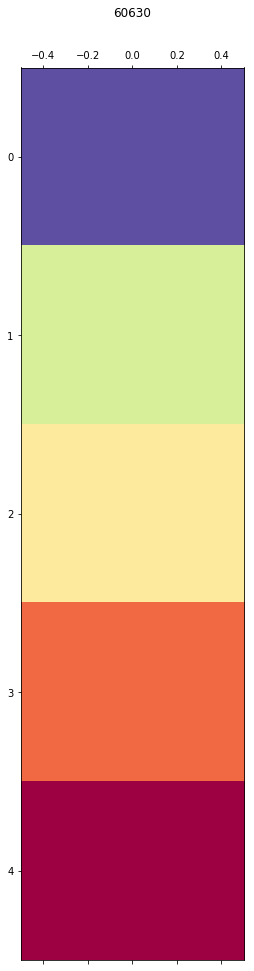

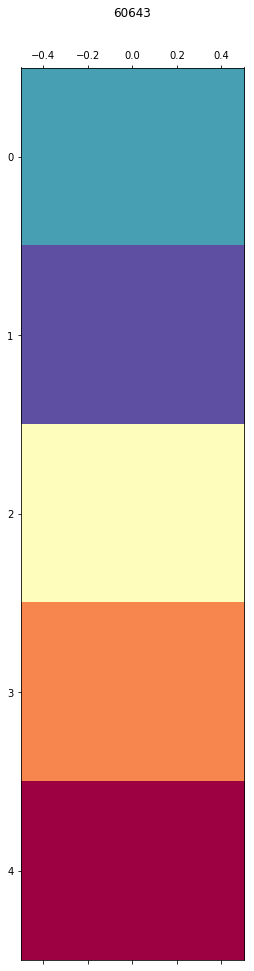

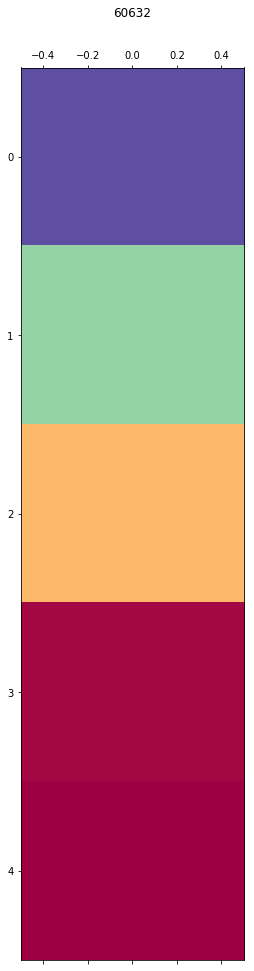

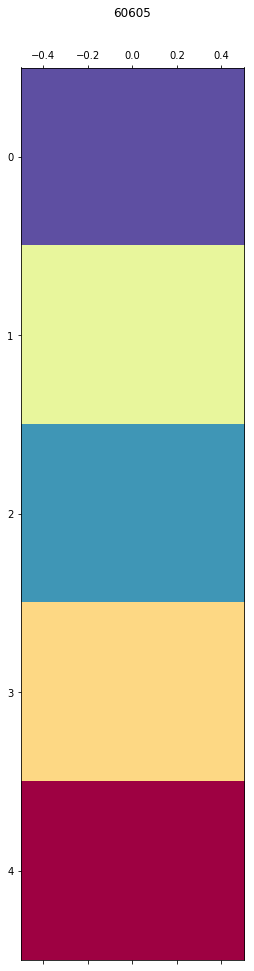

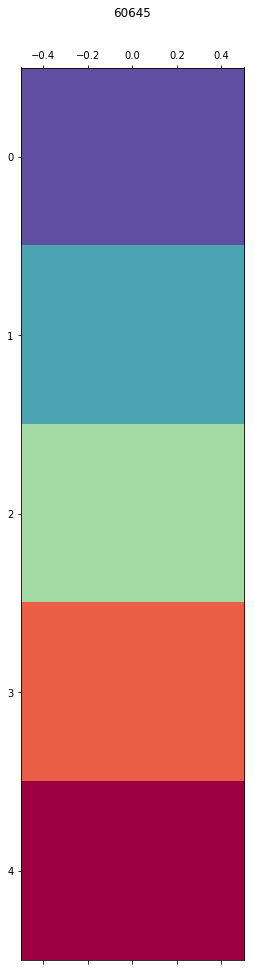

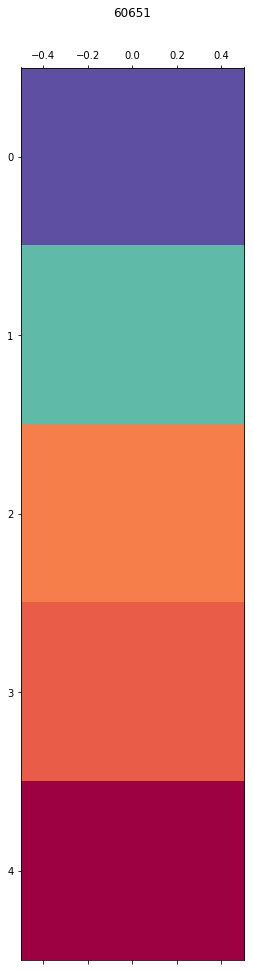

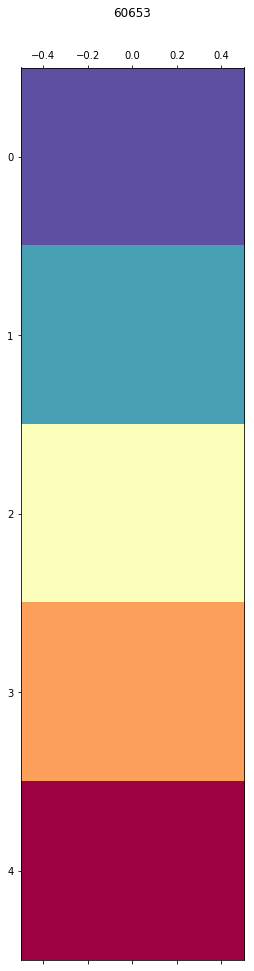

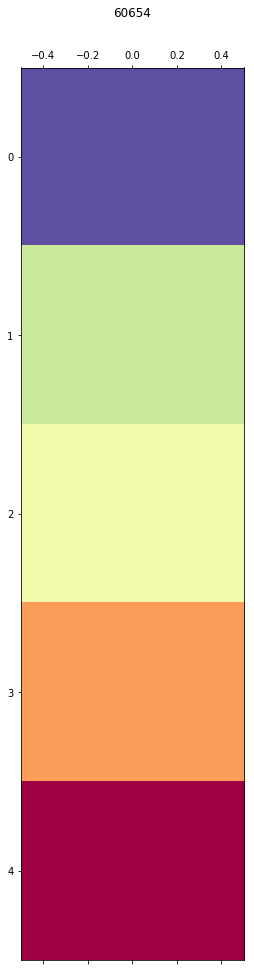

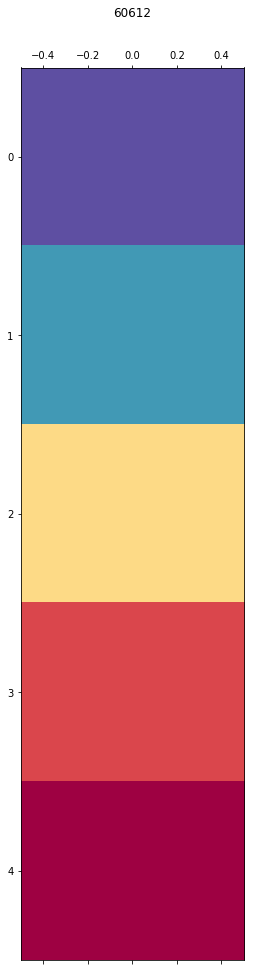

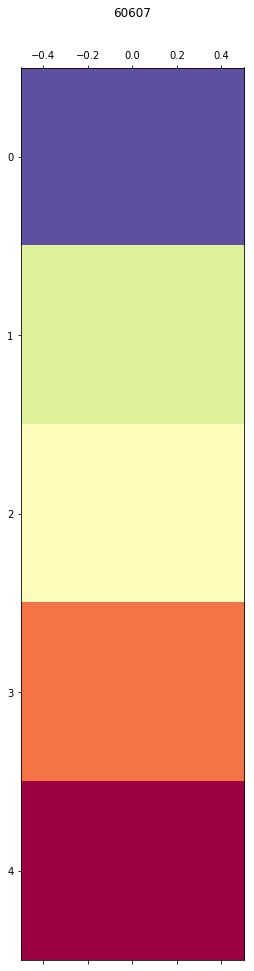

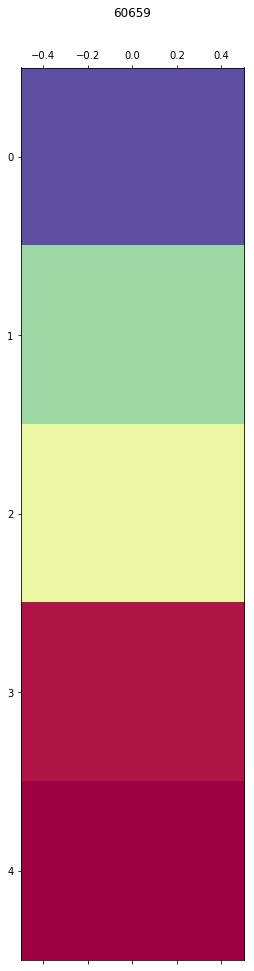

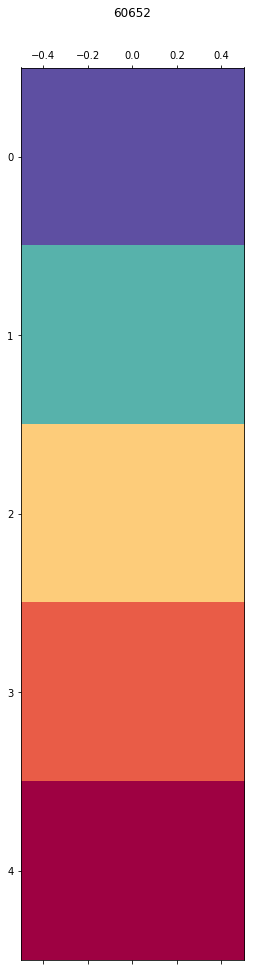

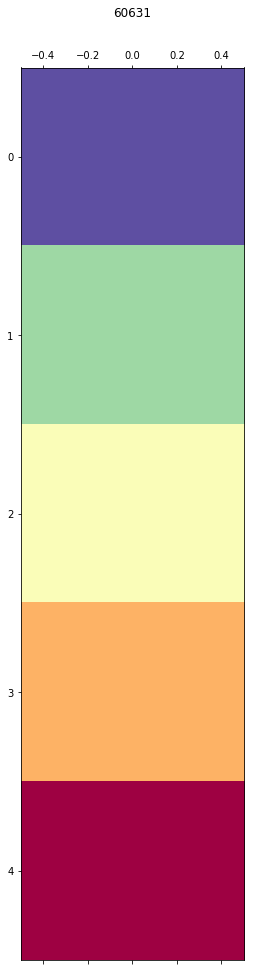

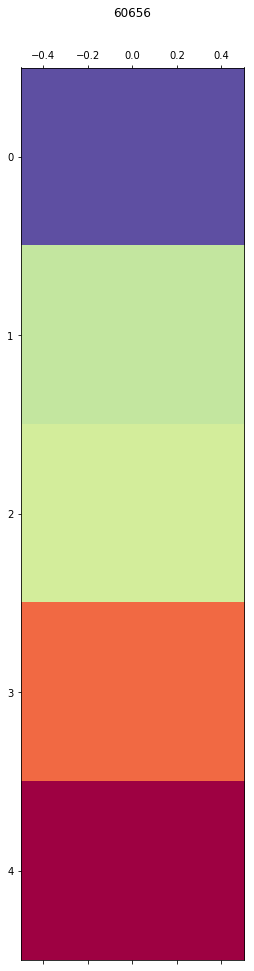

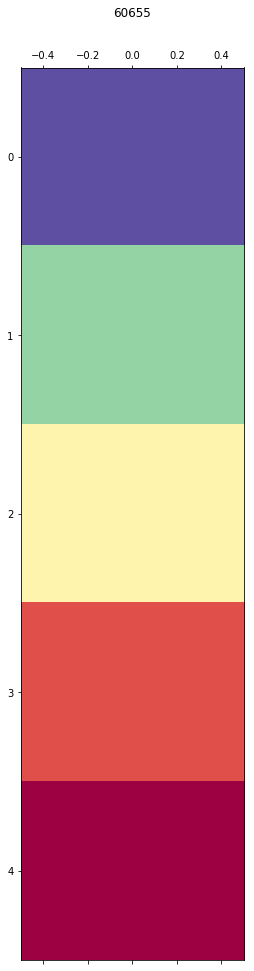

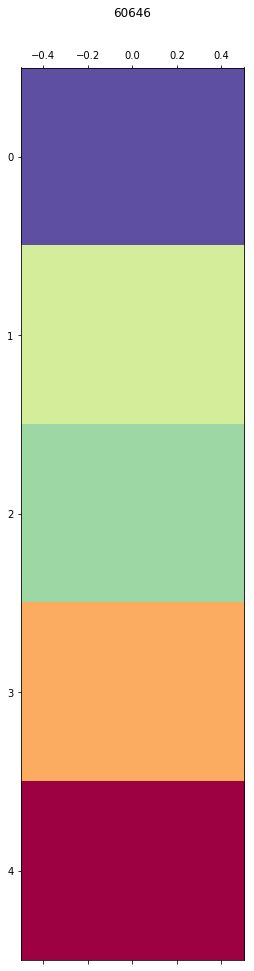

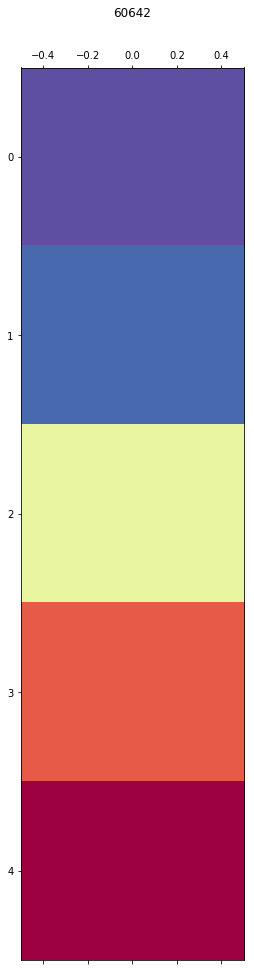

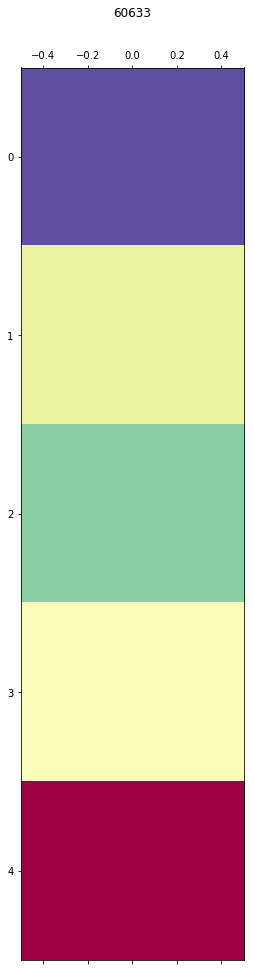

In [21]:
# Grouping data
for zipcode in list(zillow_chicago.columns):
    frequency = 'M' #string
    series = zillow_chicago[zipcode]
    frequency_groups = series.groupby(pd.Grouper(freq =frequency))
        # Plot grouped df
    df_annual = pd.DataFrame()  #creates blank df
    for yr, group in frequency_groups:
        df_annual[yr.year] = group.values.ravel()
        # Heatmaps
    year_matrix = df_annual.T #each row=1 year, each column=1 month
    plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
    plt.title('{}'.format(zipcode))
    plt.show()

# y-years
# x-time in months

From the rainbow plots above there is no visible seasonality in our data. 

### Rolling Mean

In [22]:
def stationarity_check(TS, column):
    '''Outputs a plot of the Rolling Mean and prints results of the Dickey-Fuller Test
      TS: Time Series, this is the dataframe from which you are pulling your information
      column: This is the column within the TS that you are interested in, e.g. the zipcode or stock ticker'''
    # Calculate rolling statistics
    rolmean = TS[column].rolling(window = 8, center = False).mean()
    rolstd = TS[column].rolling(window = 8, center = False).std()
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column].dropna()) # change the passengers column as required
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS[column], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for {}'.format(column))
    plt.show(block=False)
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


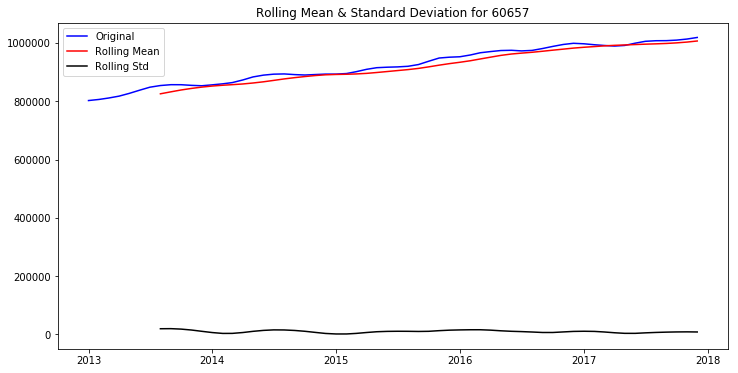

Results of Dickey-Fuller Test:
Test Statistic                 -0.554385
p-value                         0.880960
#Lags Used                      8.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


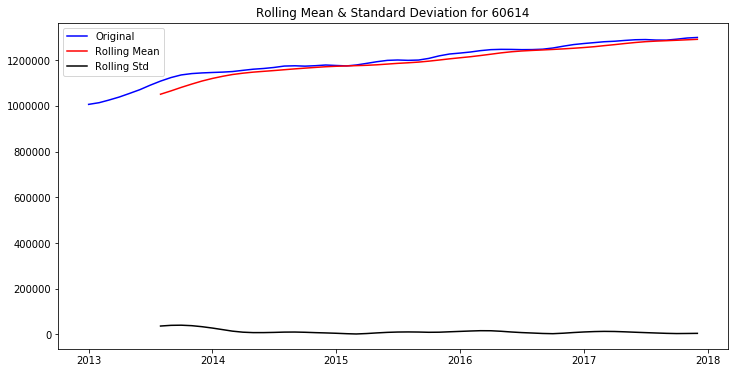

Results of Dickey-Fuller Test:
Test Statistic                 -2.092300
p-value                         0.247622
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


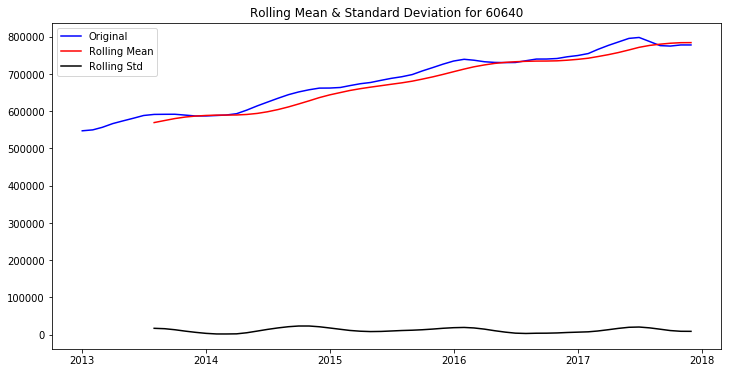

Results of Dickey-Fuller Test:
Test Statistic                 -1.659611
p-value                         0.452033
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


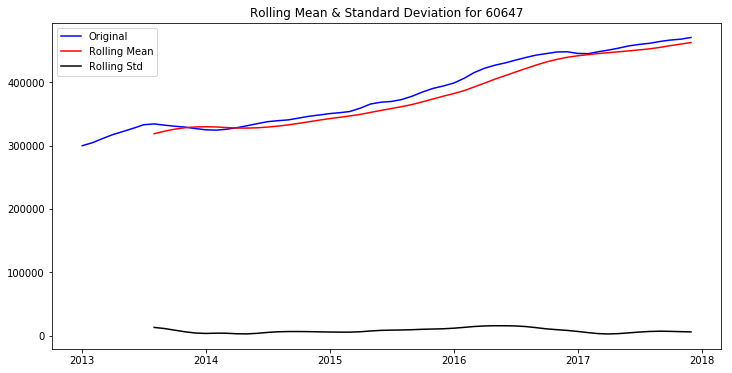

Results of Dickey-Fuller Test:
Test Statistic                  0.747417
p-value                         0.990738
#Lags Used                      6.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


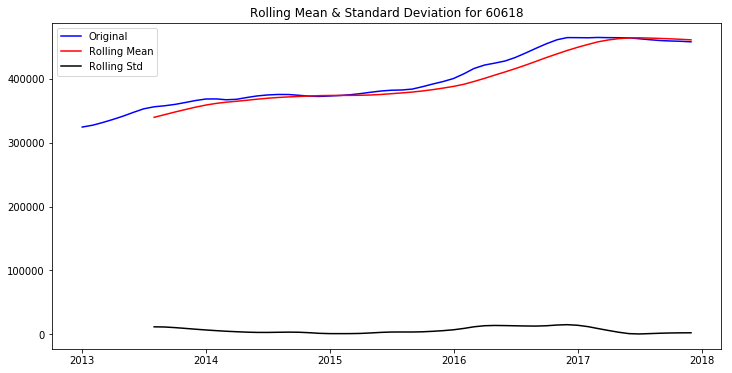

Results of Dickey-Fuller Test:
Test Statistic                 -0.649147
p-value                         0.859486
#Lags Used                      8.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


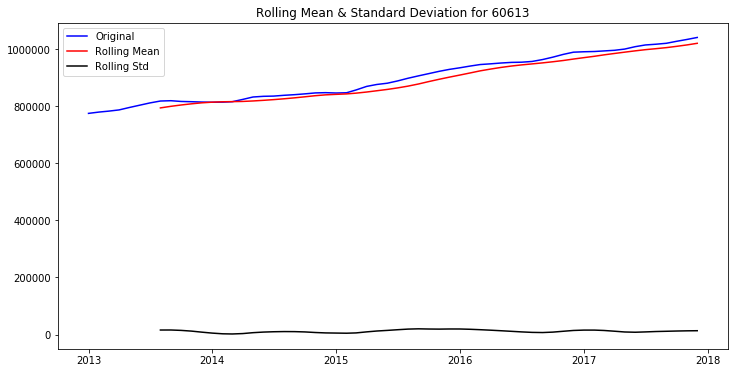

Results of Dickey-Fuller Test:
Test Statistic                  1.037762
p-value                         0.994649
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


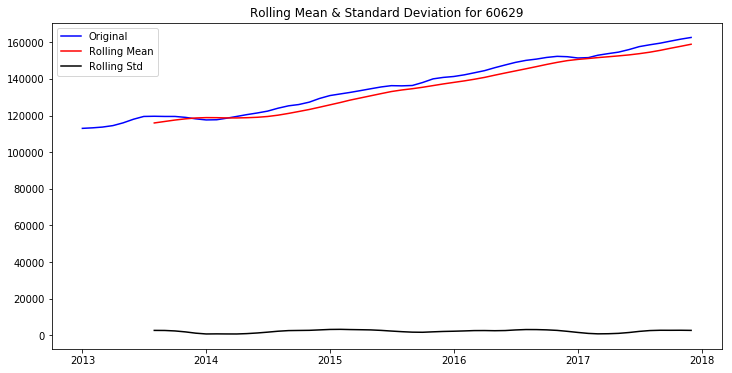

Results of Dickey-Fuller Test:
Test Statistic                  0.868340
p-value                         0.992663
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


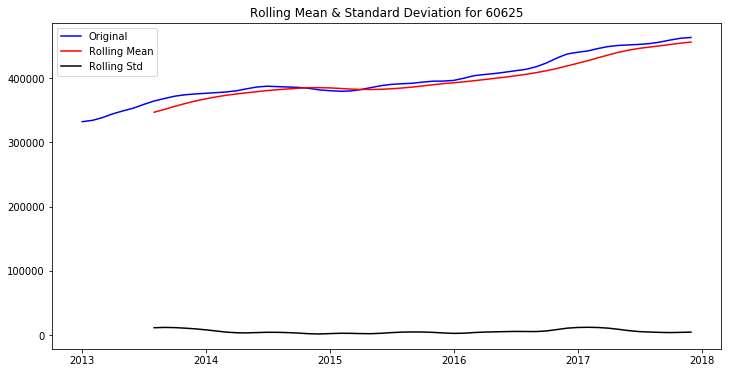

Results of Dickey-Fuller Test:
Test Statistic                 -0.259214
p-value                         0.931085
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


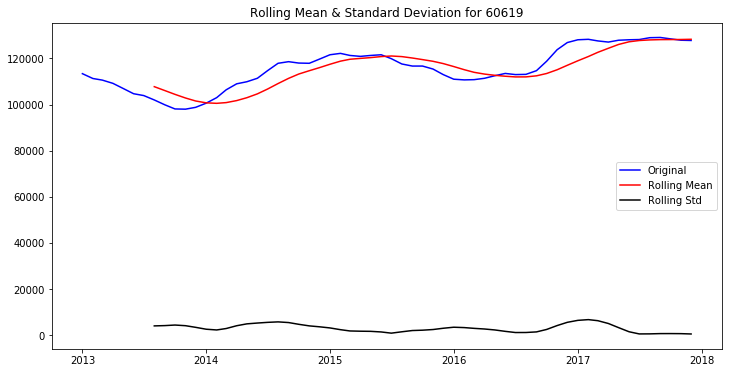

Results of Dickey-Fuller Test:
Test Statistic                 -2.195397
p-value                         0.207920
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


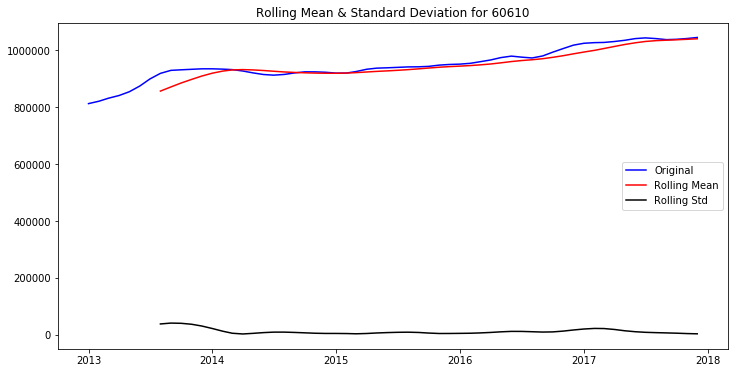

Results of Dickey-Fuller Test:
Test Statistic                  0.914549
p-value                         0.993277
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


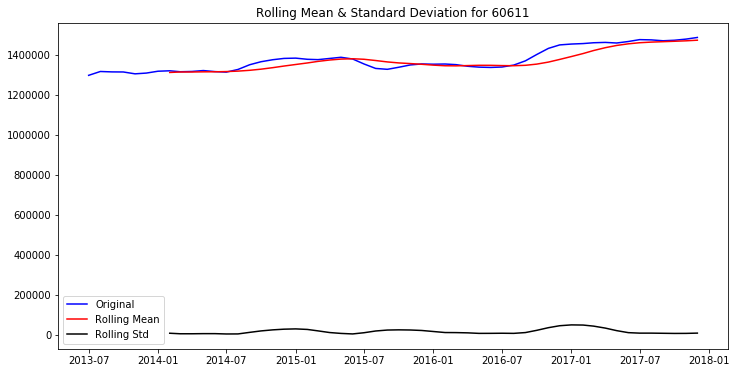

Results of Dickey-Fuller Test:
Test Statistic                 -0.860278
p-value                         0.800772
#Lags Used                      4.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


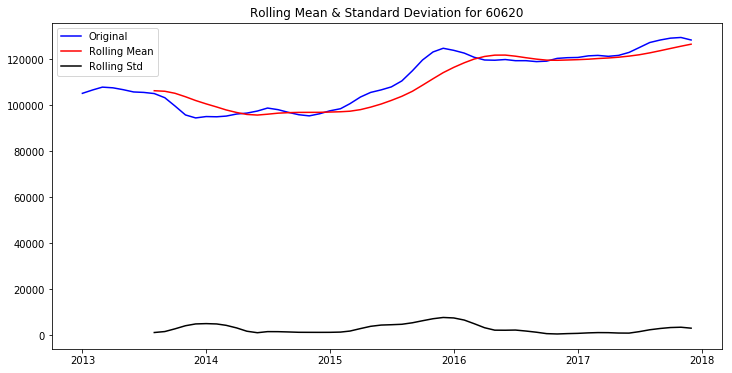

Results of Dickey-Fuller Test:
Test Statistic                 -1.008662
p-value                         0.750092
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


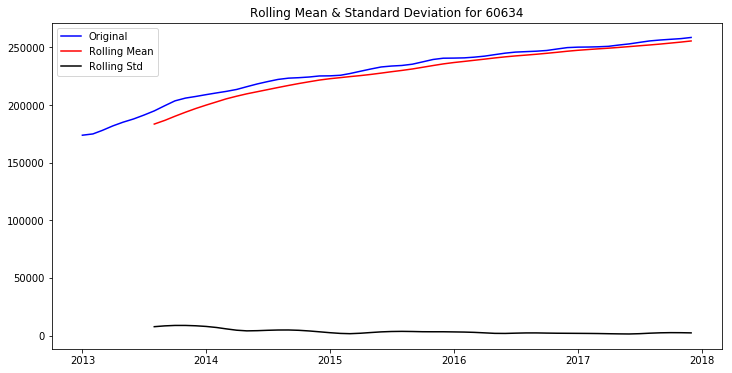

Results of Dickey-Fuller Test:
Test Statistic                 -3.434923
p-value                         0.009824
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


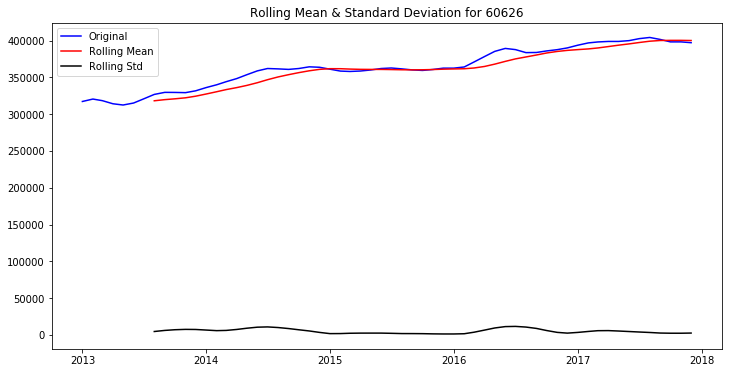

Results of Dickey-Fuller Test:
Test Statistic                 -2.164363
p-value                         0.219433
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


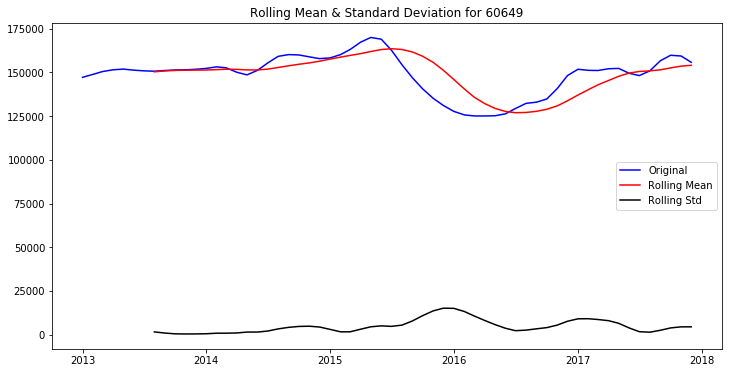

Results of Dickey-Fuller Test:
Test Statistic                 -2.974063
p-value                         0.037389
#Lags Used                      6.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


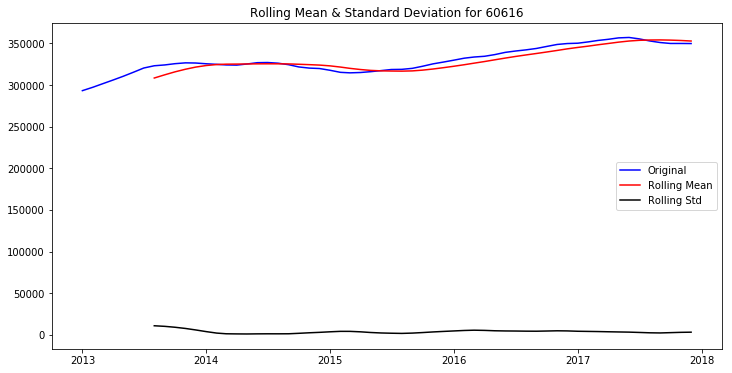

Results of Dickey-Fuller Test:
Test Statistic                 -0.740161
p-value                         0.836071
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


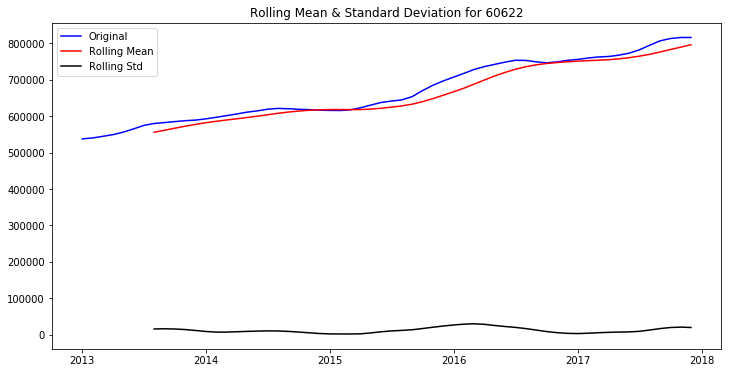

Results of Dickey-Fuller Test:
Test Statistic                  0.341163
p-value                         0.979156
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


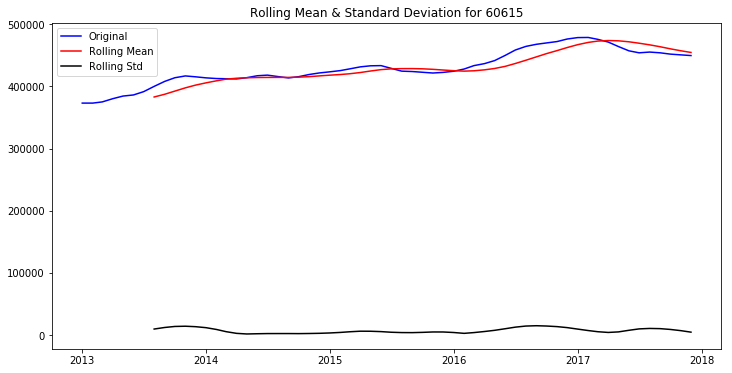

Results of Dickey-Fuller Test:
Test Statistic                 -1.866044
p-value                         0.348200
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


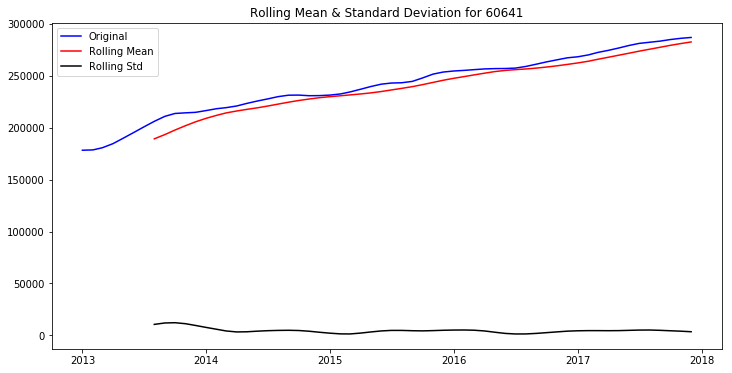

Results of Dickey-Fuller Test:
Test Statistic                 -1.493492
p-value                         0.536728
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


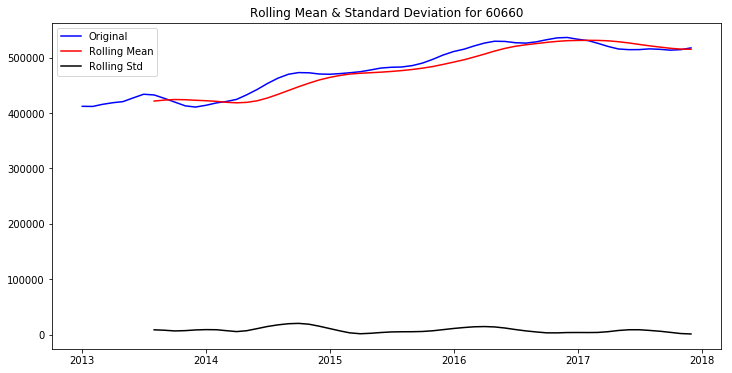

Results of Dickey-Fuller Test:
Test Statistic                 -1.325352
p-value                         0.617495
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


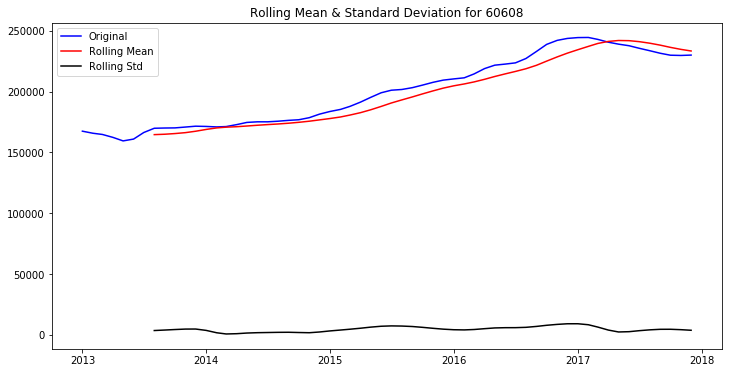

Results of Dickey-Fuller Test:
Test Statistic                 -2.147796
p-value                         0.225735
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


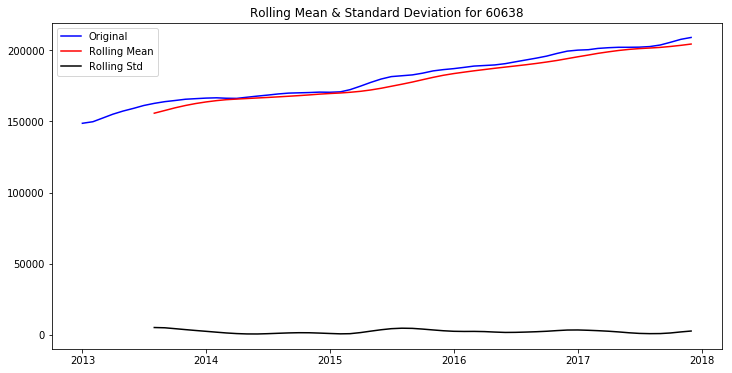

Results of Dickey-Fuller Test:
Test Statistic                  0.382304
p-value                         0.980821
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


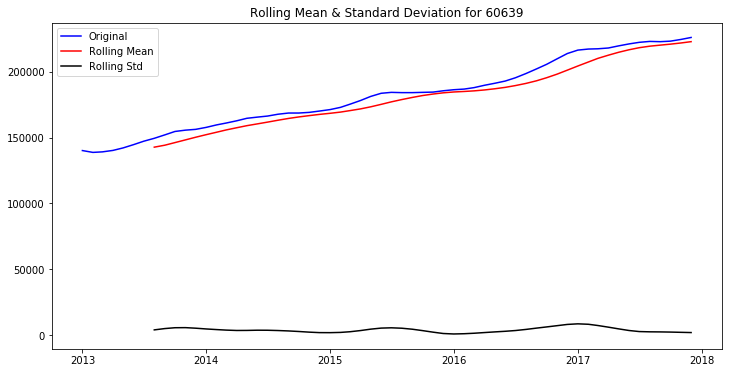

Results of Dickey-Fuller Test:
Test Statistic                  0.455833
p-value                         0.983467
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


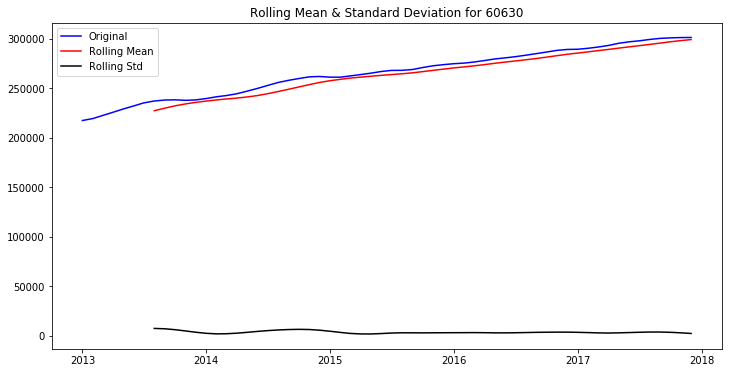

Results of Dickey-Fuller Test:
Test Statistic                 -2.444598
p-value                         0.129543
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


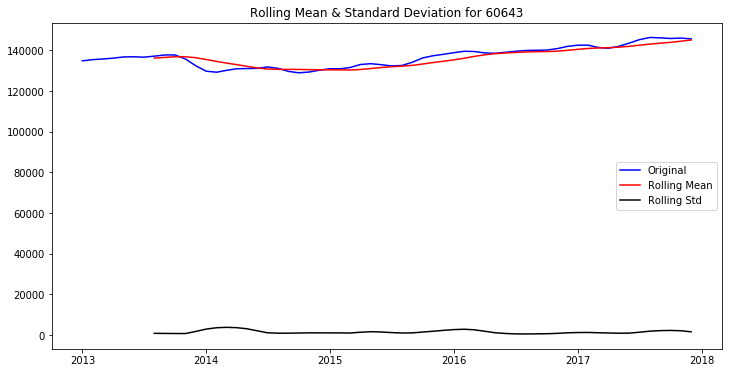

Results of Dickey-Fuller Test:
Test Statistic                 -0.897873
p-value                         0.788672
#Lags Used                      8.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


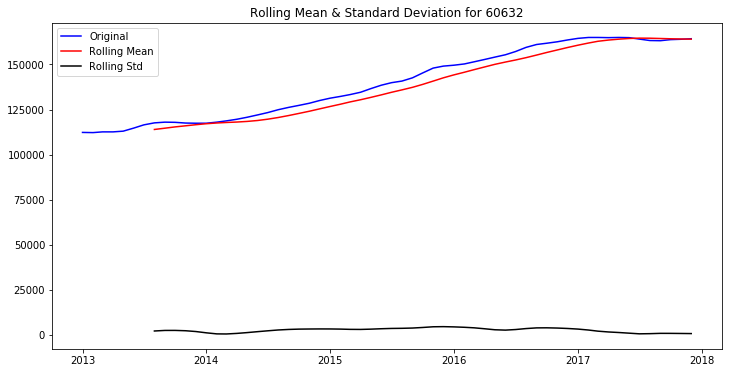

Results of Dickey-Fuller Test:
Test Statistic                 -0.464443
p-value                         0.898771
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


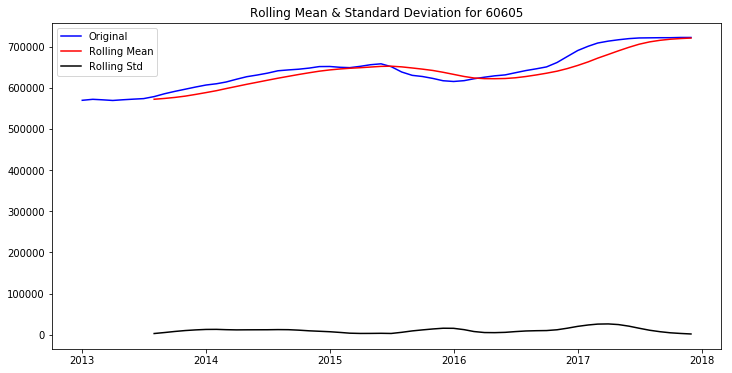

Results of Dickey-Fuller Test:
Test Statistic                 -1.912321
p-value                         0.326287
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


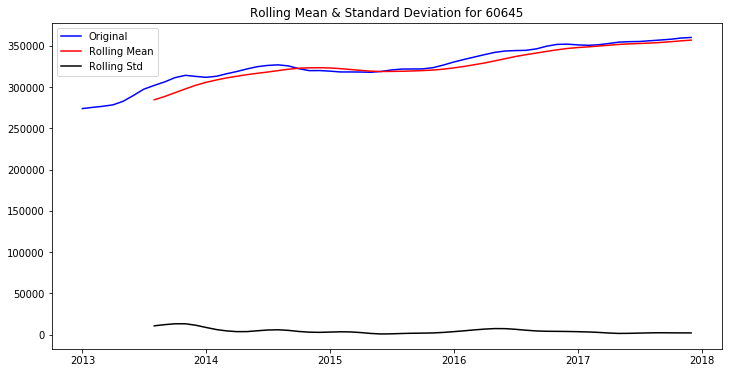

Results of Dickey-Fuller Test:
Test Statistic                 -0.979708
p-value                         0.760593
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


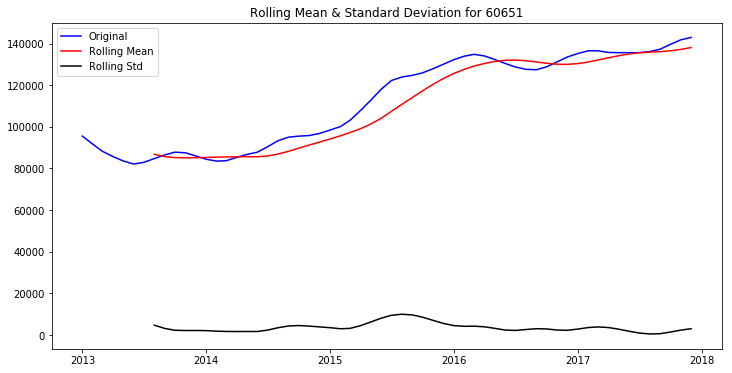

Results of Dickey-Fuller Test:
Test Statistic                 -1.151816
p-value                         0.693973
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


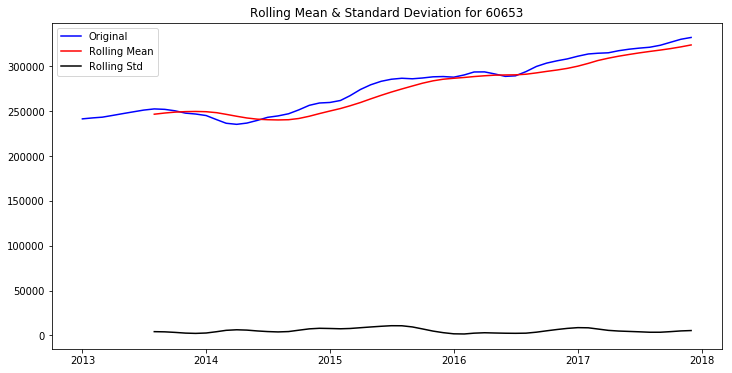

Results of Dickey-Fuller Test:
Test Statistic                  0.086587
p-value                         0.965133
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


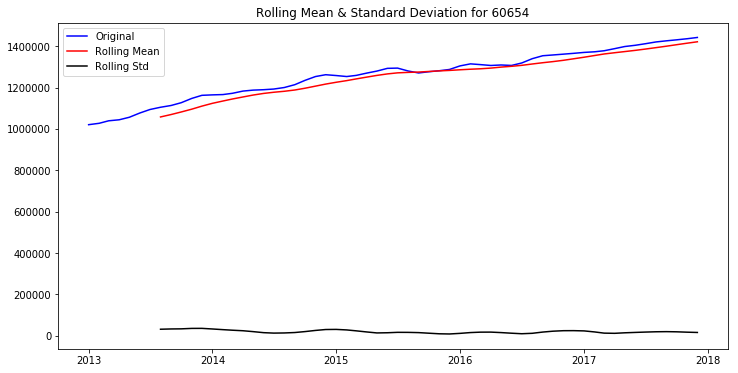

Results of Dickey-Fuller Test:
Test Statistic                 -1.116630
p-value                         0.708395
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


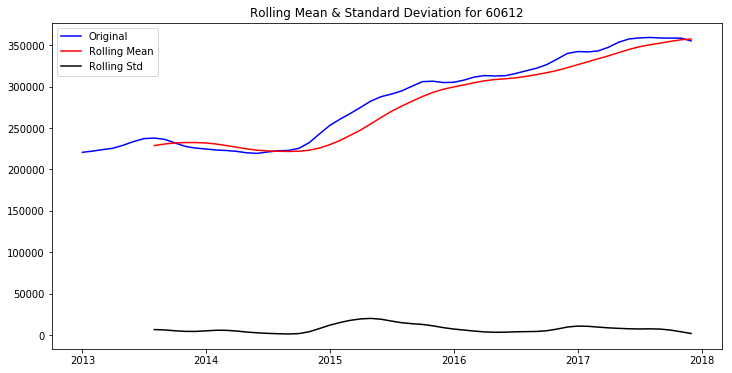

Results of Dickey-Fuller Test:
Test Statistic                 -0.960445
p-value                         0.767416
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


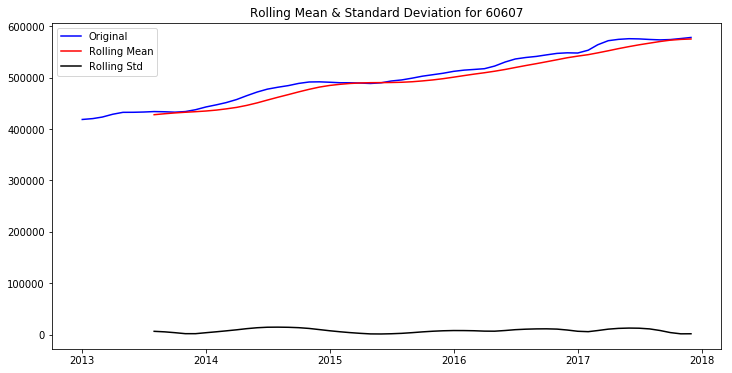

Results of Dickey-Fuller Test:
Test Statistic                 -1.012315
p-value                         0.748746
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


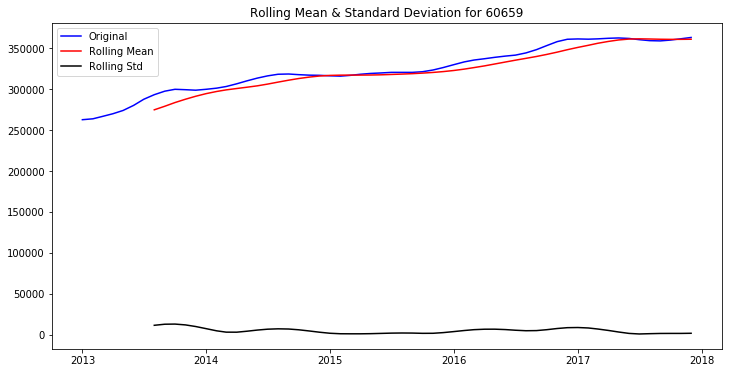

Results of Dickey-Fuller Test:
Test Statistic                 -0.940856
p-value                         0.774221
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


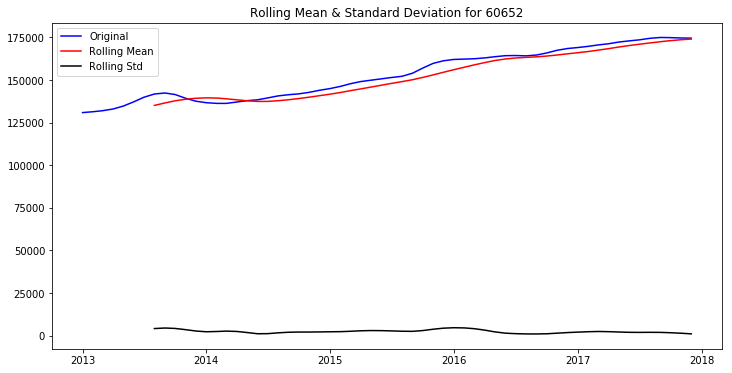

Results of Dickey-Fuller Test:
Test Statistic                 -0.060380
p-value                         0.953245
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


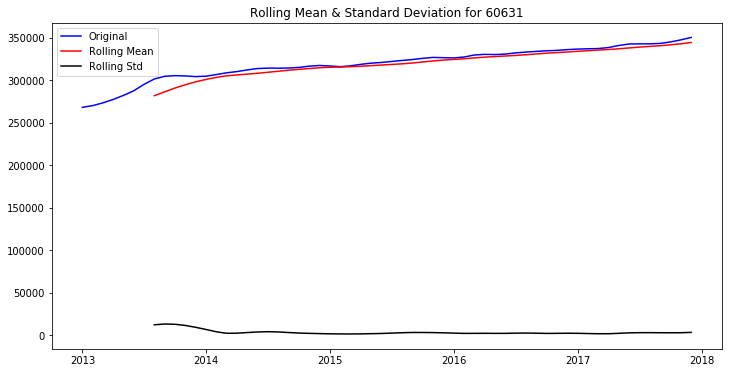

Results of Dickey-Fuller Test:
Test Statistic                  1.563617
p-value                         0.997744
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


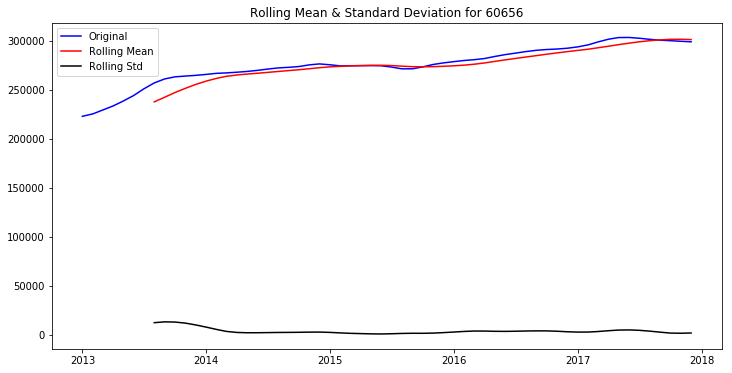

Results of Dickey-Fuller Test:
Test Statistic                 -0.691160
p-value                         0.849026
#Lags Used                      8.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


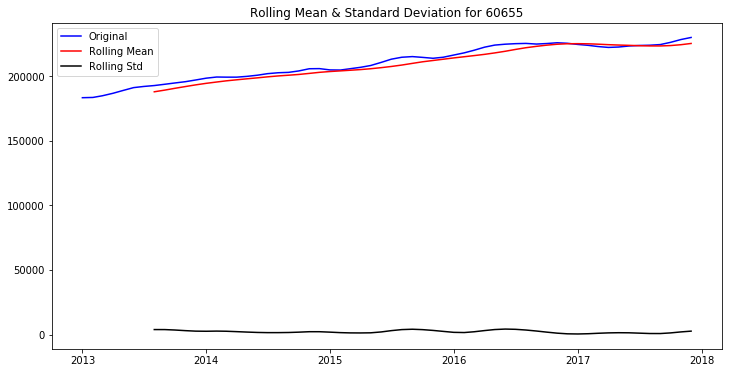

Results of Dickey-Fuller Test:
Test Statistic                 -1.299821
p-value                         0.629254
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


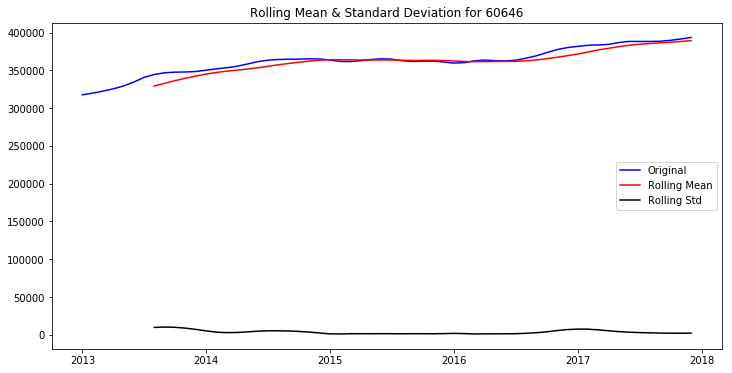

Results of Dickey-Fuller Test:
Test Statistic                 -0.310306
p-value                         0.924032
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


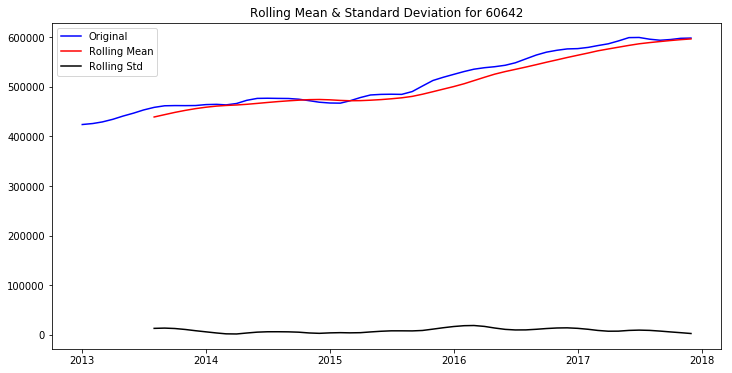

Results of Dickey-Fuller Test:
Test Statistic                 -0.396144
p-value                         0.910741
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


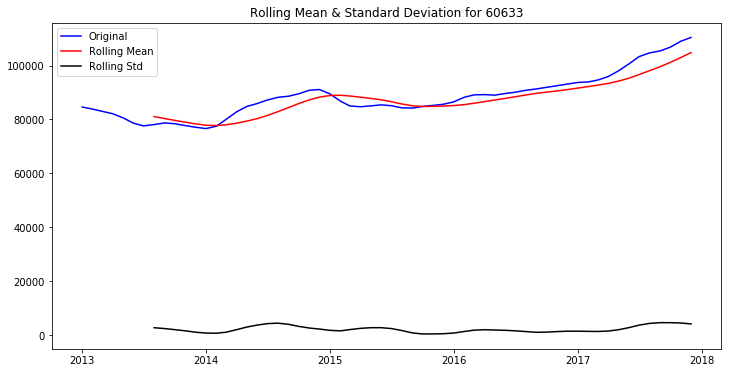

Results of Dickey-Fuller Test:
Test Statistic                  1.715147
p-value                         0.998165
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [23]:
[stationarity_check(zillow_chicago,x) for x in list(zillow_chicago.columns)]

Trend in the mean, variance is fairly close to zero and is constant. 

## Removing trend and seasonality

In [24]:
def detrend(TS, column):
    decomposition=seasonal_decompose(np.log(TS[column].dropna()))
    residuals = decomposition.resid
    #series_shift = TS[column].shift(periods=1)
    #data_diff = TS[column].diff(periods=1)
    #data_minus_rolmean = TS[column] - rolmean
    dftest = adfuller(residuals.dropna())
    residuals.plot(figsize=(20,6))
    plt.title('{}'.format(column))
    plt.show()
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Values (%s)' %key] = value
    print(dfoutput)
    

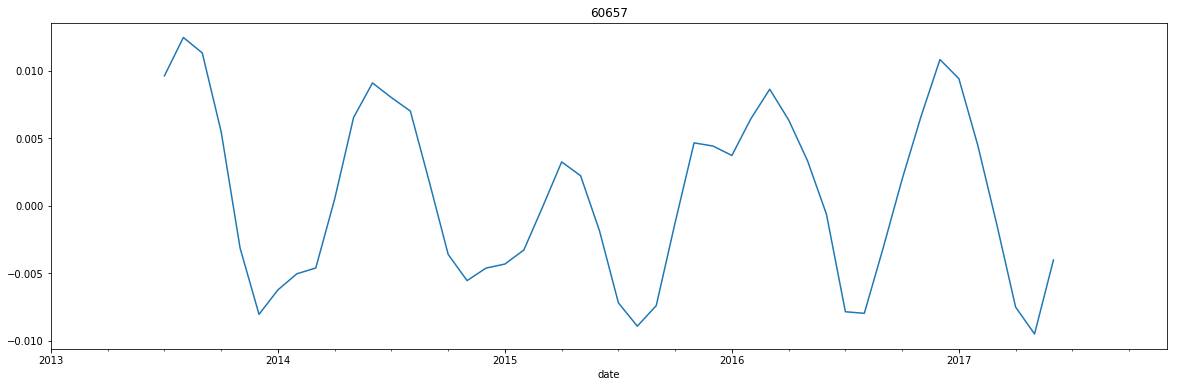

Test Statistic                 -3.248879
p-value                         0.017324
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Values (1%)           -3.592504
Critical Values (5%)           -2.931550
Critical Values (10%)          -2.604066
dtype: float64


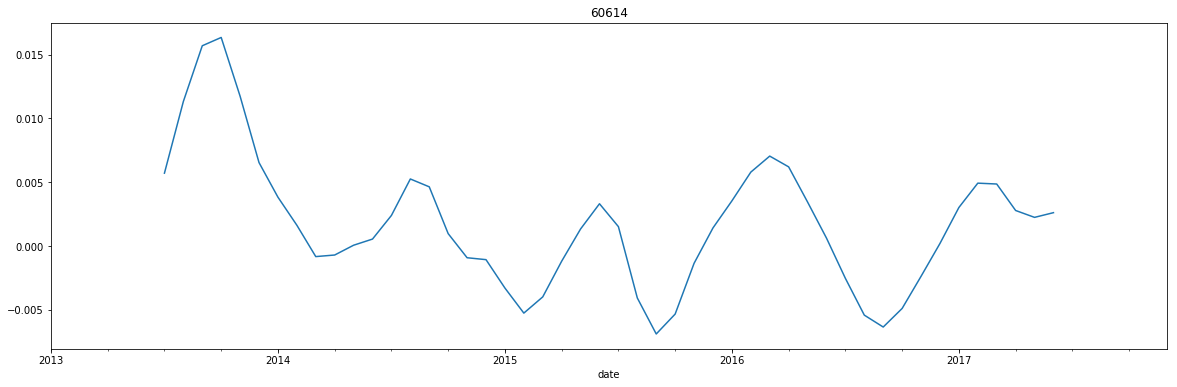

Test Statistic                 -2.369143
p-value                         0.150636
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Values (1%)           -3.592504
Critical Values (5%)           -2.931550
Critical Values (10%)          -2.604066
dtype: float64


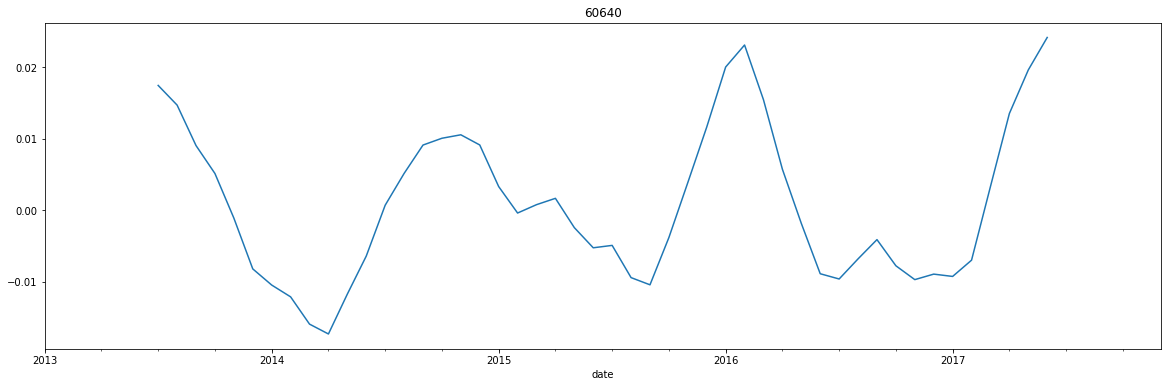

Test Statistic                 -4.702441
p-value                         0.000083
#Lags Used                      7.000000
Number of Observations Used    40.000000
Critical Values (1%)           -3.605565
Critical Values (5%)           -2.937069
Critical Values (10%)          -2.606986
dtype: float64


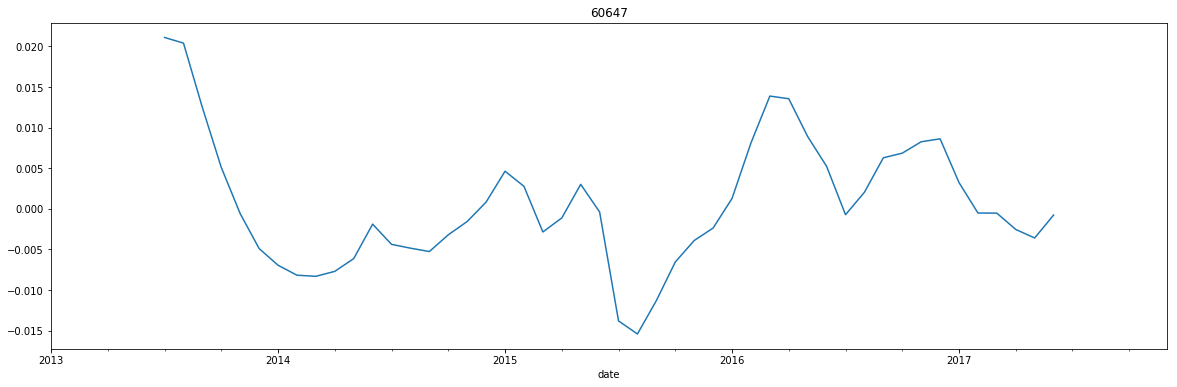

Test Statistic                 -2.836038
p-value                         0.053308
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


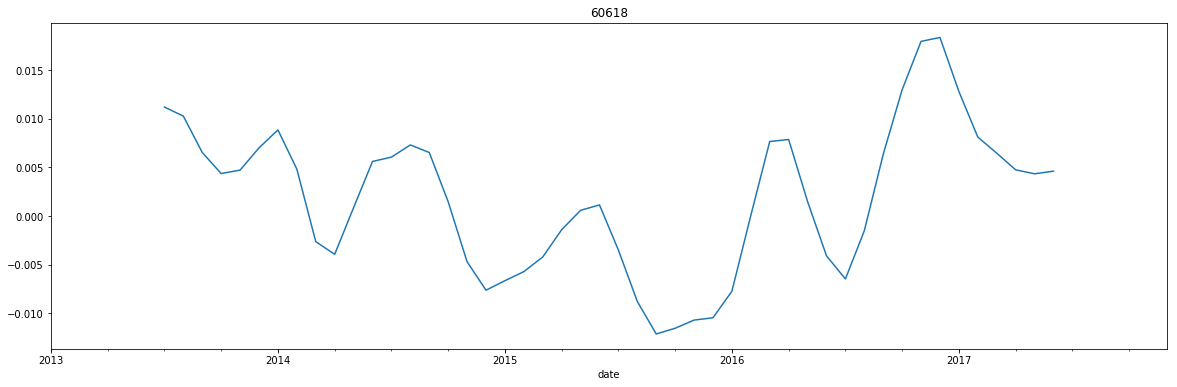

Test Statistic                 -1.602091
p-value                         0.482543
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Values (1%)           -3.592504
Critical Values (5%)           -2.931550
Critical Values (10%)          -2.604066
dtype: float64


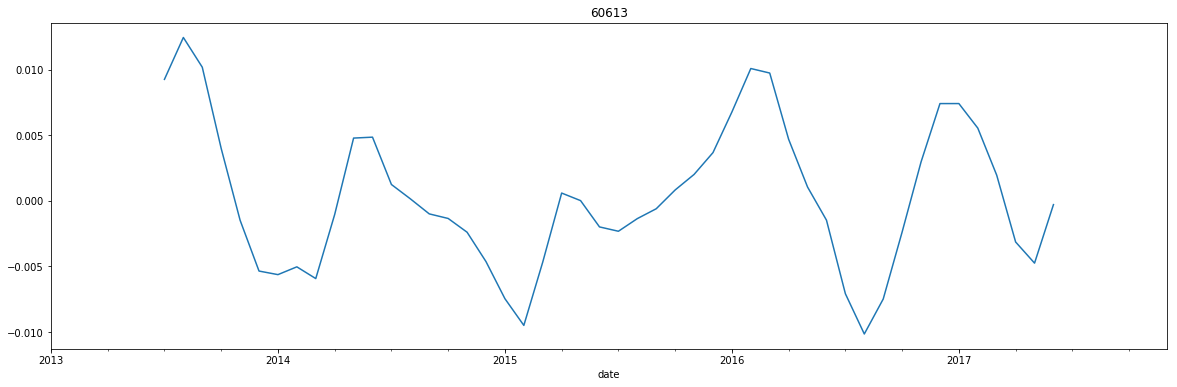

Test Statistic                 -2.787925
p-value                         0.060019
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Values (1%)           -3.592504
Critical Values (5%)           -2.931550
Critical Values (10%)          -2.604066
dtype: float64


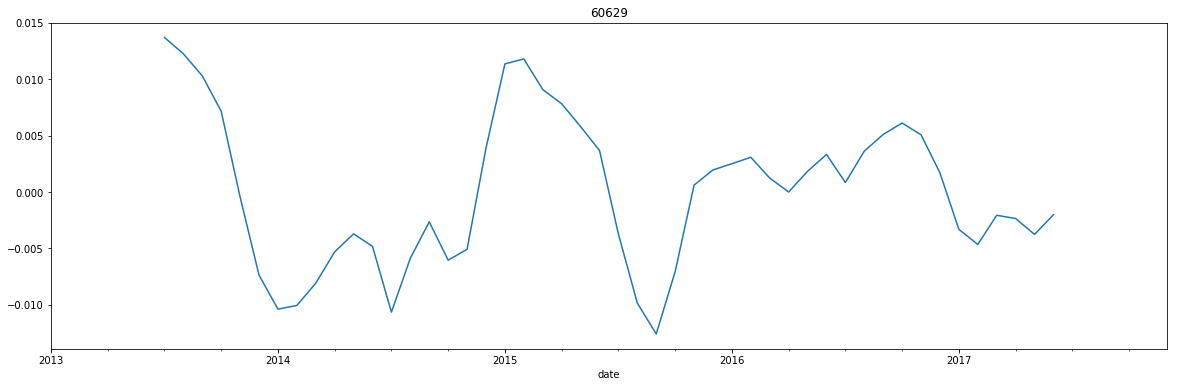

Test Statistic                 -4.057185
p-value                         0.001139
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


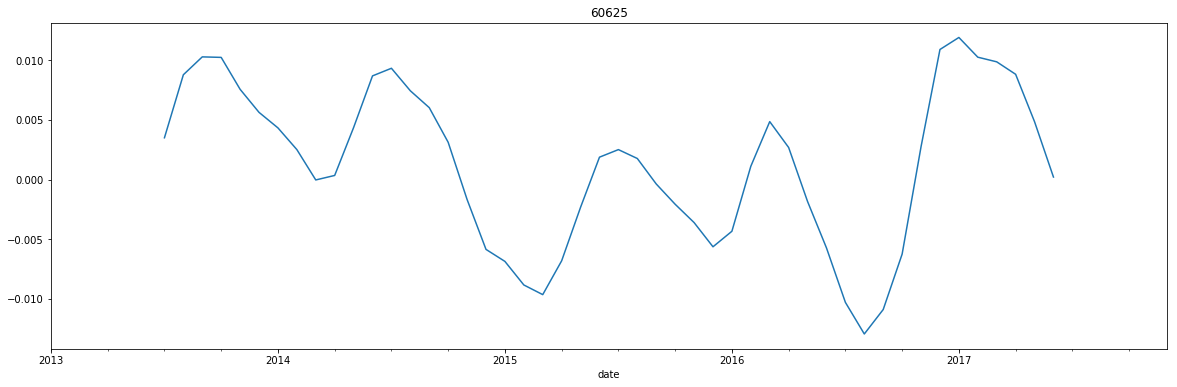

Test Statistic                 -2.153891
p-value                         0.223404
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Values (1%)           -3.592504
Critical Values (5%)           -2.931550
Critical Values (10%)          -2.604066
dtype: float64


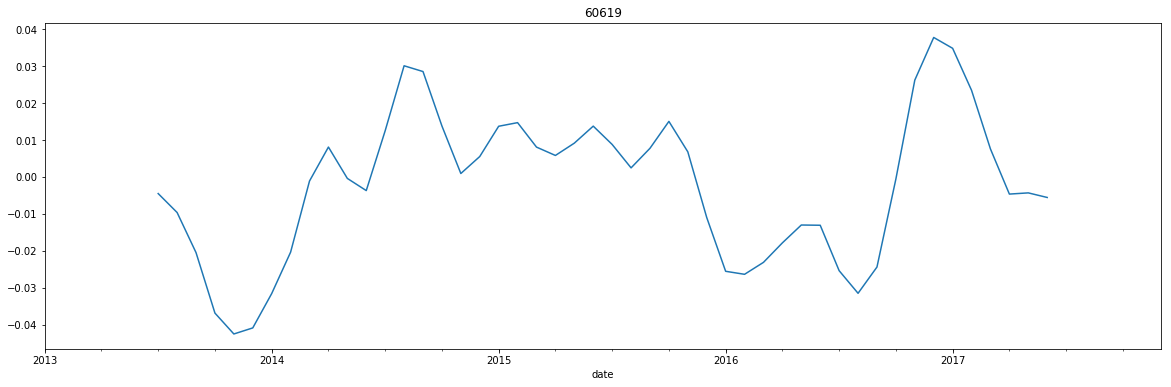

Test Statistic                 -3.214471
p-value                         0.019162
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


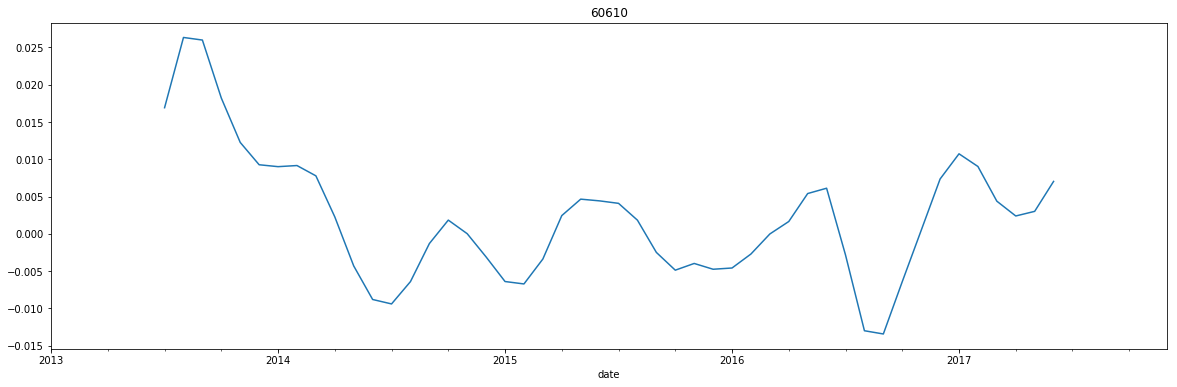

Test Statistic                 -0.868865
p-value                         0.798053
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Values (1%)           -3.620918
Critical Values (5%)           -2.943539
Critical Values (10%)          -2.610400
dtype: float64


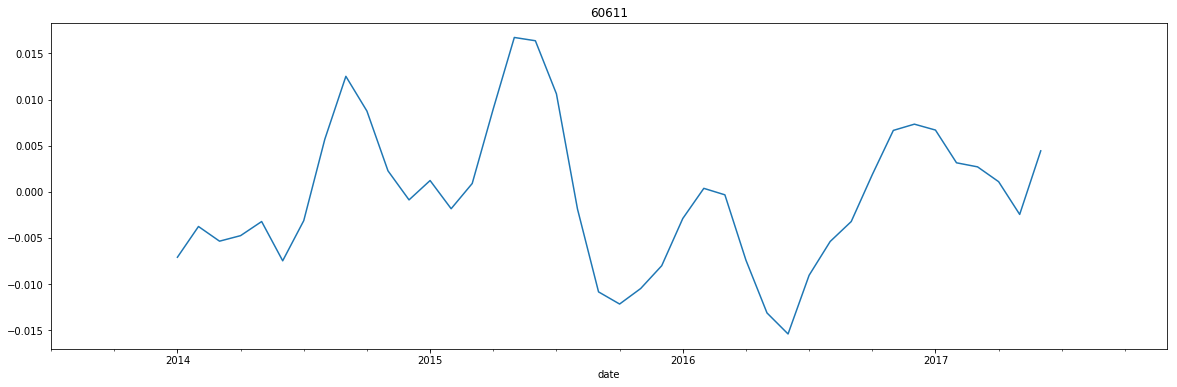

Test Statistic                 -1.879002
p-value                         0.342003
#Lags Used                      8.000000
Number of Observations Used    33.000000
Critical Values (1%)           -3.646135
Critical Values (5%)           -2.954127
Critical Values (10%)          -2.615968
dtype: float64


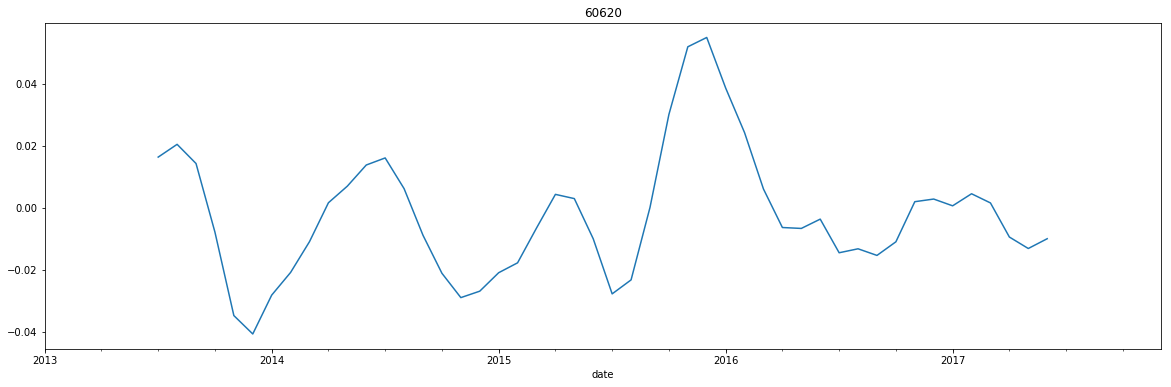

Test Statistic                 -3.225382
p-value                         0.018562
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


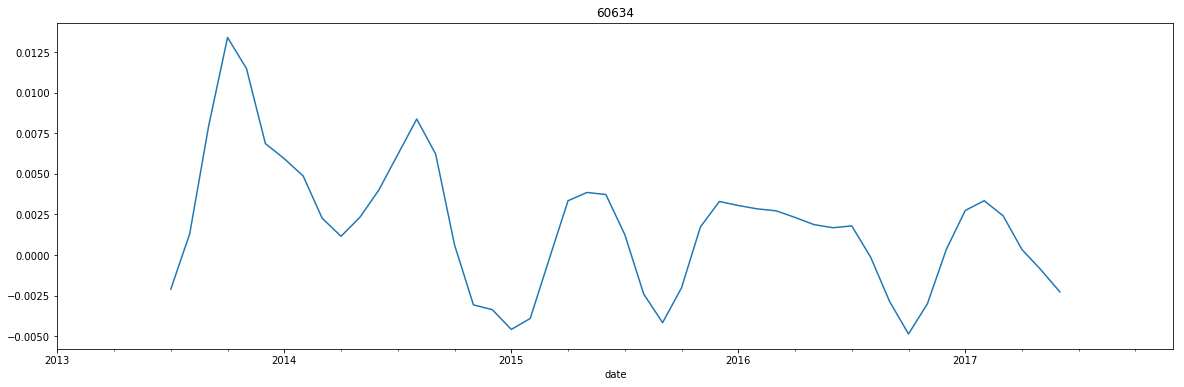

Test Statistic                 -1.763998
p-value                         0.398477
#Lags Used                      7.000000
Number of Observations Used    40.000000
Critical Values (1%)           -3.605565
Critical Values (5%)           -2.937069
Critical Values (10%)          -2.606986
dtype: float64


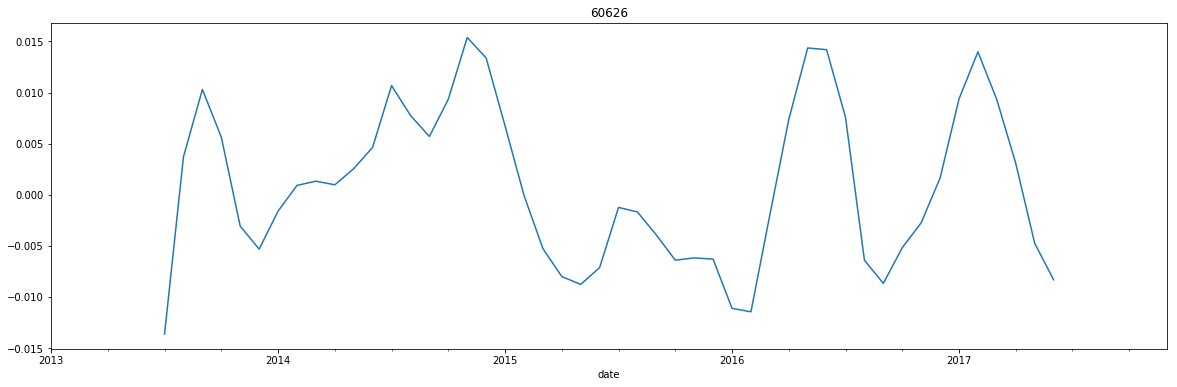

Test Statistic                 -5.213921
p-value                         0.000008
#Lags Used                      1.000000
Number of Observations Used    46.000000
Critical Values (1%)           -3.581258
Critical Values (5%)           -2.926785
Critical Values (10%)          -2.601541
dtype: float64


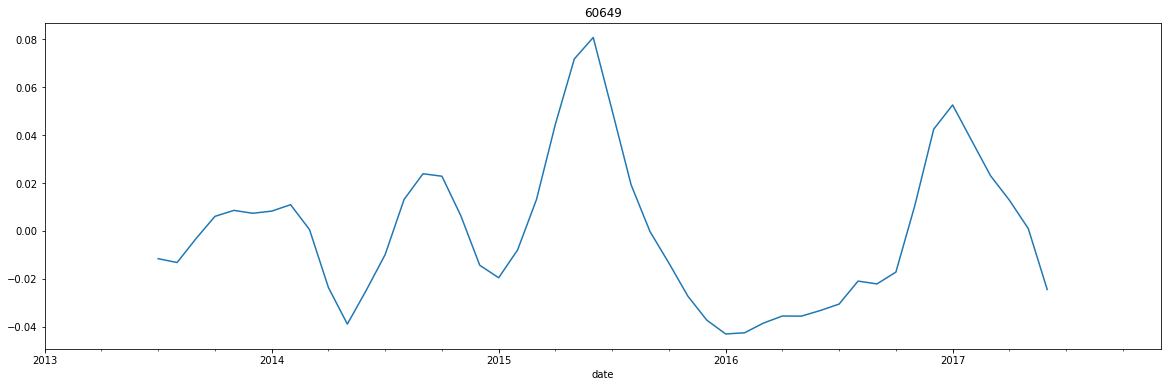

Test Statistic                 -2.474934
p-value                         0.121693
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


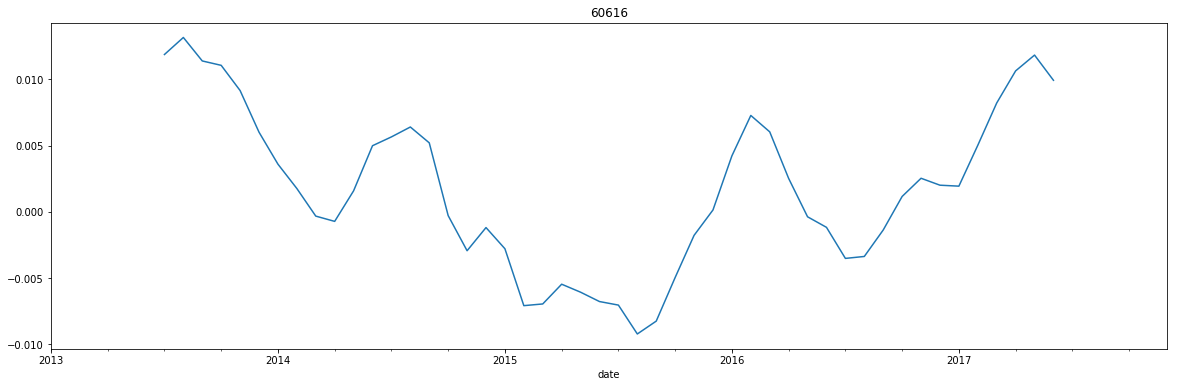

Test Statistic                 -1.850546
p-value                         0.355671
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Values (1%)           -3.592504
Critical Values (5%)           -2.931550
Critical Values (10%)          -2.604066
dtype: float64


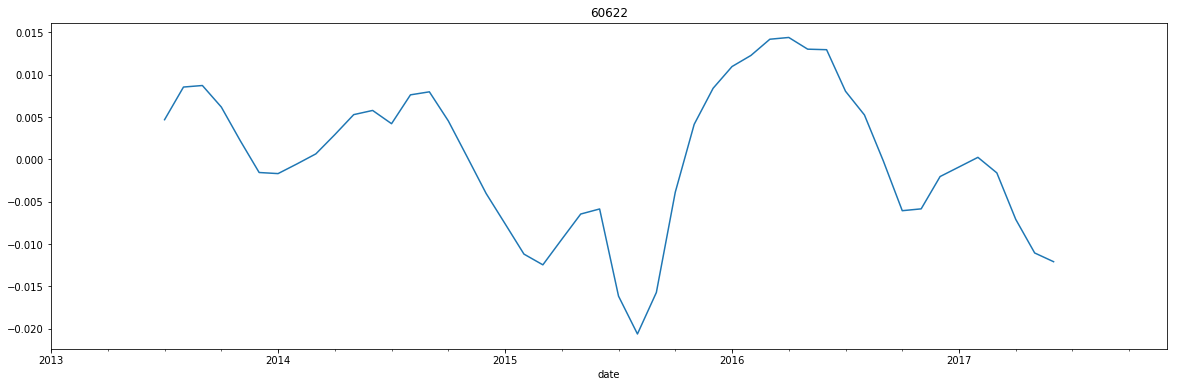

Test Statistic                 -2.062819
p-value                         0.259726
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


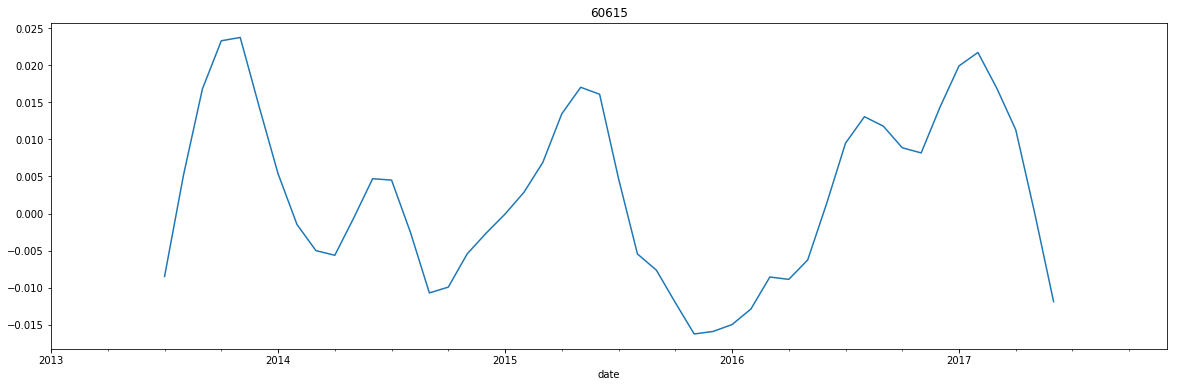

Test Statistic                 -2.967912
p-value                         0.038002
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


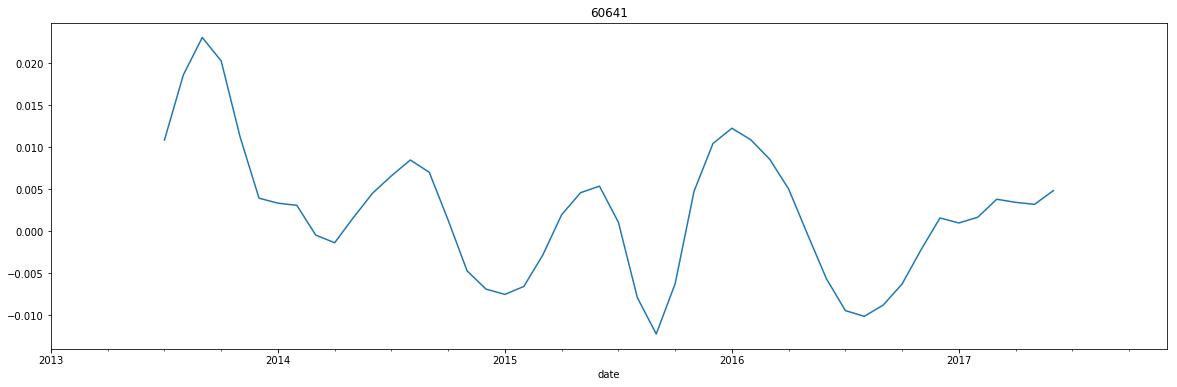

Test Statistic                 -2.380444
p-value                         0.147332
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Values (1%)           -3.592504
Critical Values (5%)           -2.931550
Critical Values (10%)          -2.604066
dtype: float64


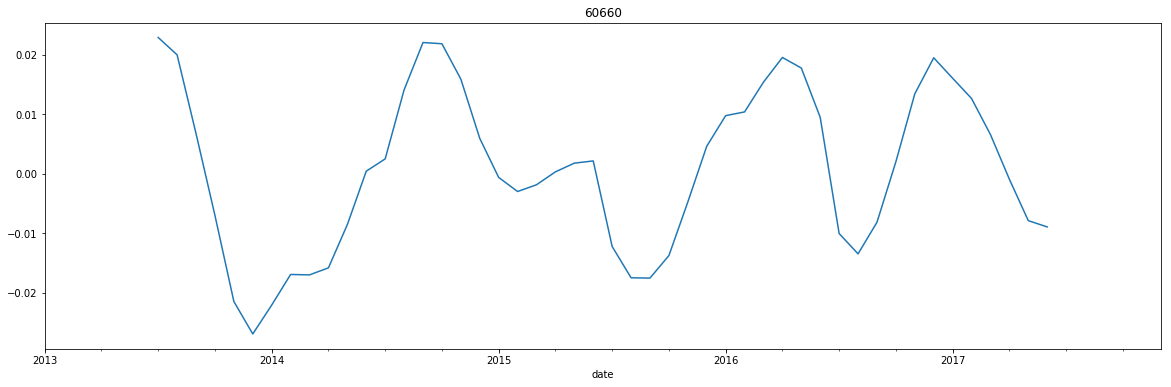

Test Statistic                 -5.301598
p-value                         0.000005
#Lags Used                      1.000000
Number of Observations Used    46.000000
Critical Values (1%)           -3.581258
Critical Values (5%)           -2.926785
Critical Values (10%)          -2.601541
dtype: float64


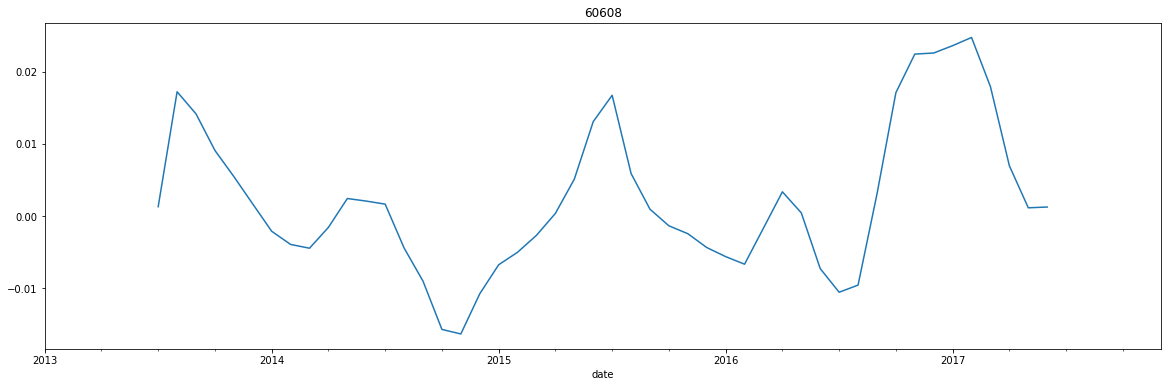

Test Statistic                 -2.567421
p-value                         0.099919
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


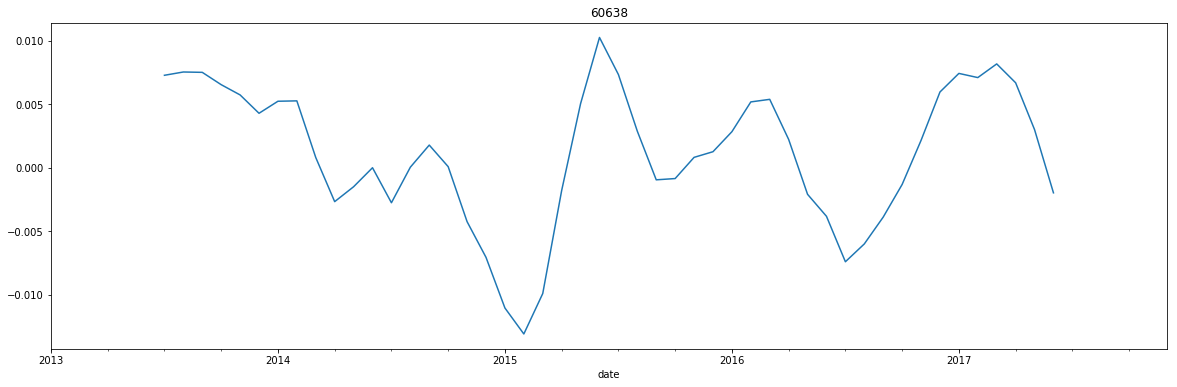

Test Statistic                 -4.730031
p-value                         0.000074
#Lags Used                      1.000000
Number of Observations Used    46.000000
Critical Values (1%)           -3.581258
Critical Values (5%)           -2.926785
Critical Values (10%)          -2.601541
dtype: float64


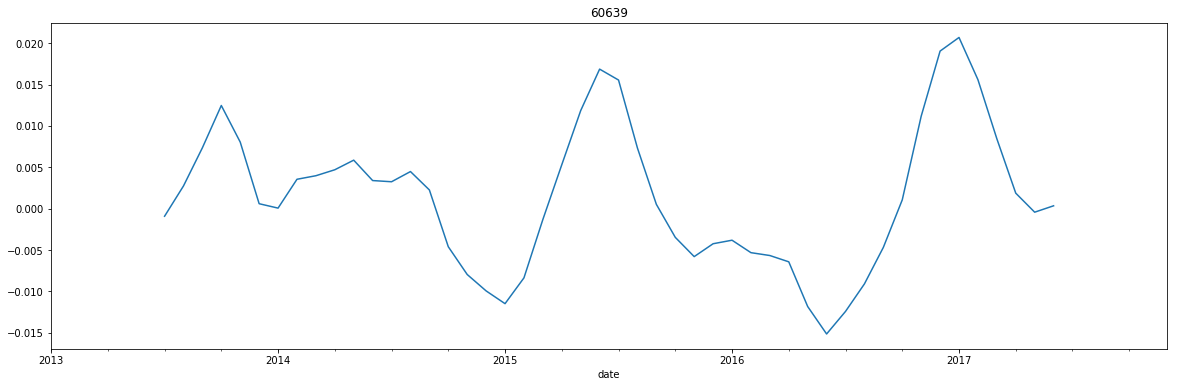

Test Statistic                 -3.884665
p-value                         0.002151
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


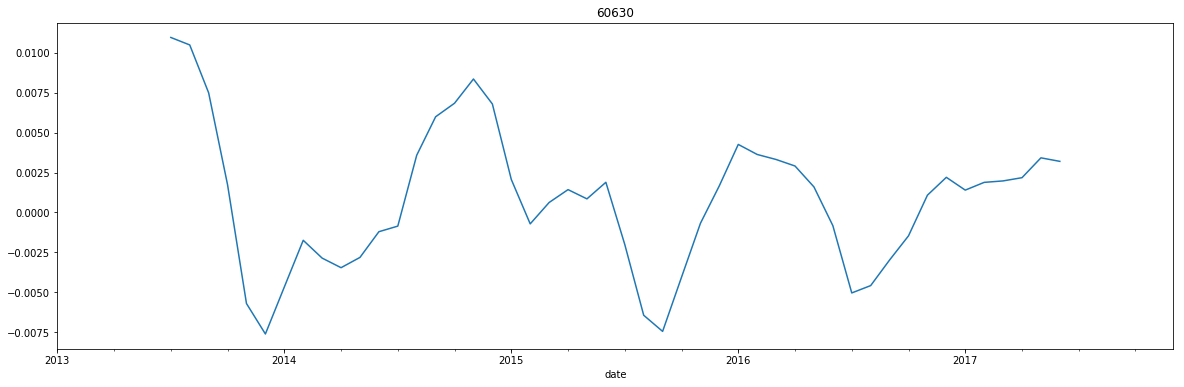

Test Statistic                 -5.373630
p-value                         0.000004
#Lags Used                      1.000000
Number of Observations Used    46.000000
Critical Values (1%)           -3.581258
Critical Values (5%)           -2.926785
Critical Values (10%)          -2.601541
dtype: float64


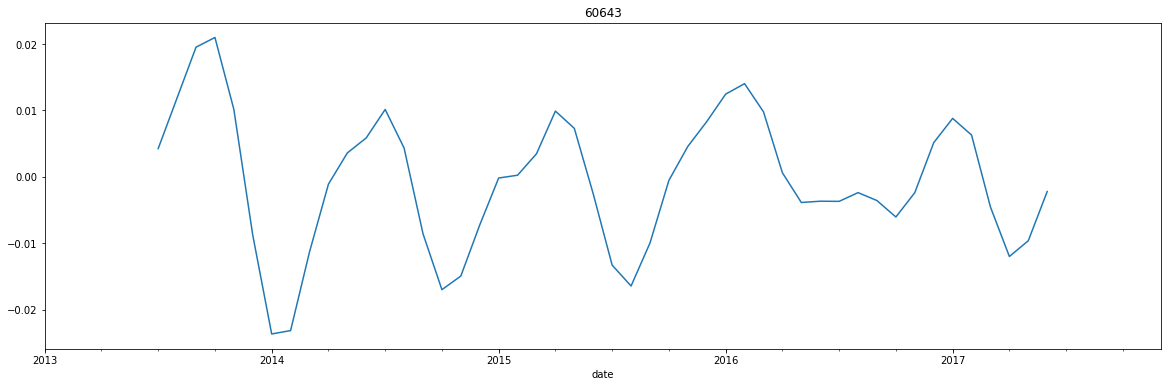

Test Statistic                 -1.809746
p-value                         0.375634
#Lags Used                      6.000000
Number of Observations Used    41.000000
Critical Values (1%)           -3.600983
Critical Values (5%)           -2.935135
Critical Values (10%)          -2.605963
dtype: float64


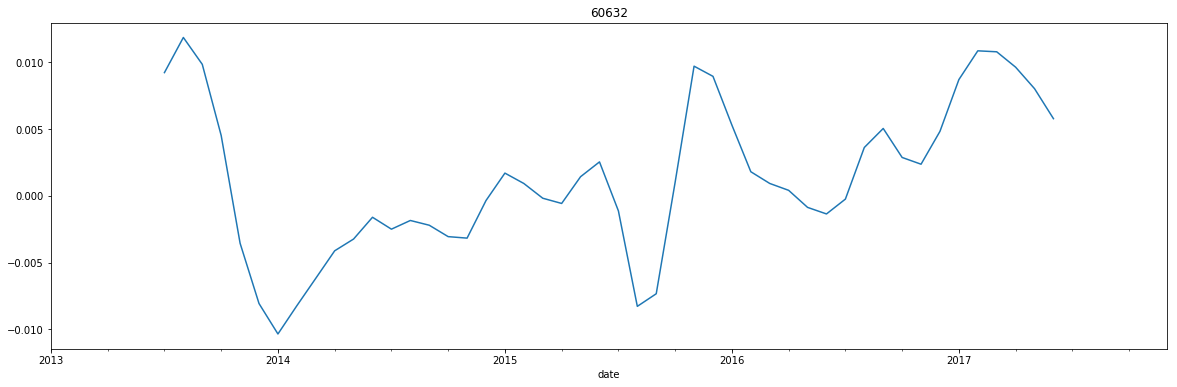

Test Statistic                 -1.126993
p-value                         0.704188
#Lags Used                      5.000000
Number of Observations Used    42.000000
Critical Values (1%)           -3.596636
Critical Values (5%)           -2.933297
Critical Values (10%)          -2.604991
dtype: float64


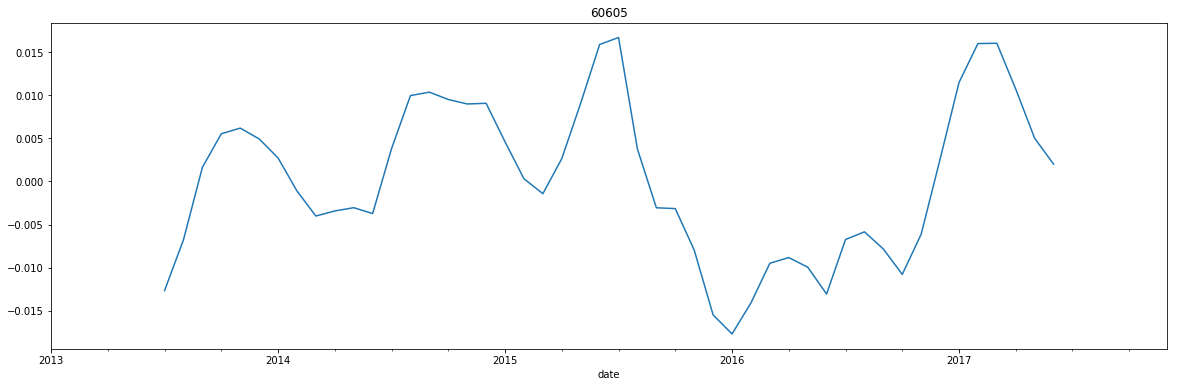

Test Statistic                 -2.212426
p-value                         0.201767
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


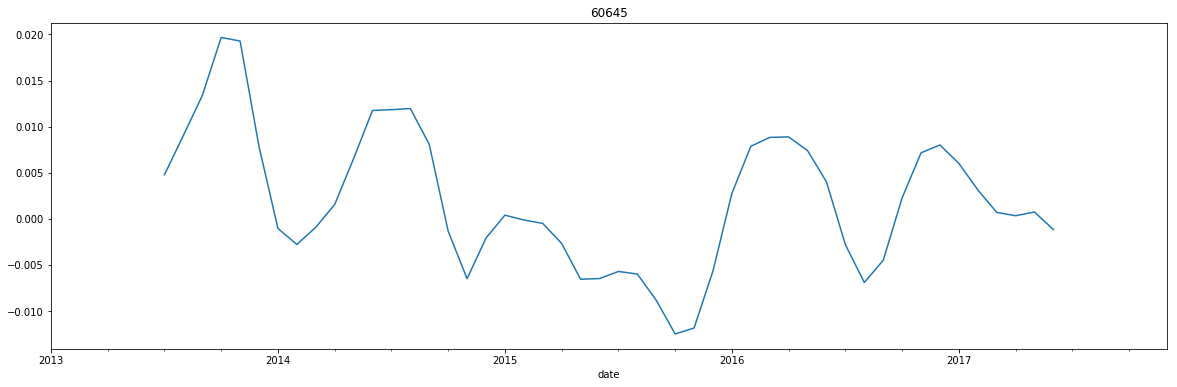

Test Statistic                 -2.269917
p-value                         0.181854
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Values (1%)           -3.592504
Critical Values (5%)           -2.931550
Critical Values (10%)          -2.604066
dtype: float64


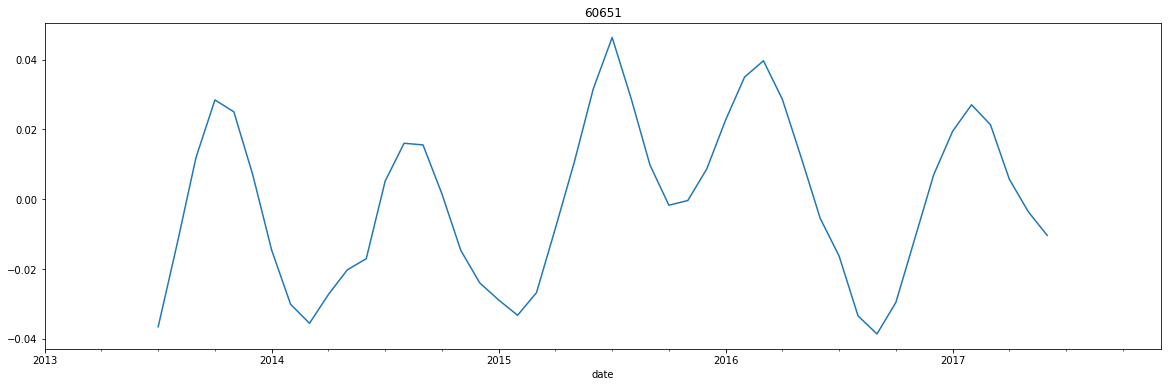

Test Statistic                -7.168136e+00
p-value                        2.850673e-10
#Lags Used                     1.000000e+00
Number of Observations Used    4.600000e+01
Critical Values (1%)          -3.581258e+00
Critical Values (5%)          -2.926785e+00
Critical Values (10%)         -2.601541e+00
dtype: float64


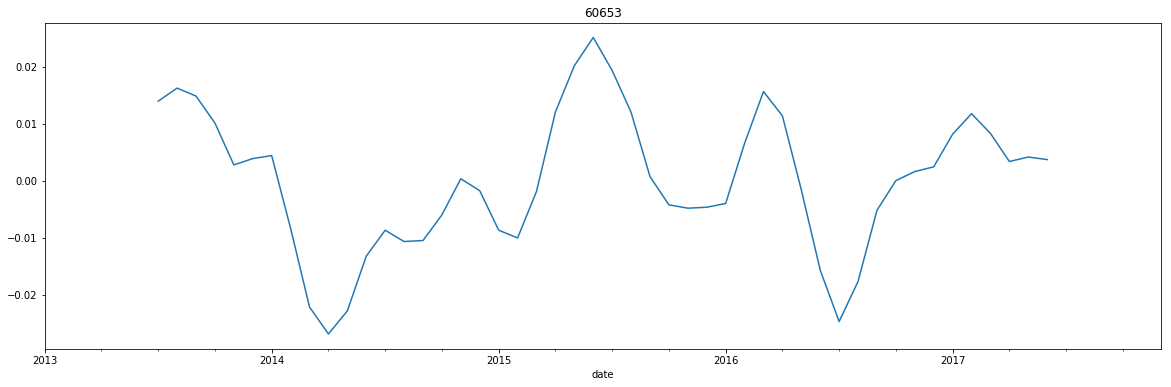

Test Statistic                 -2.520007
p-value                         0.110682
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


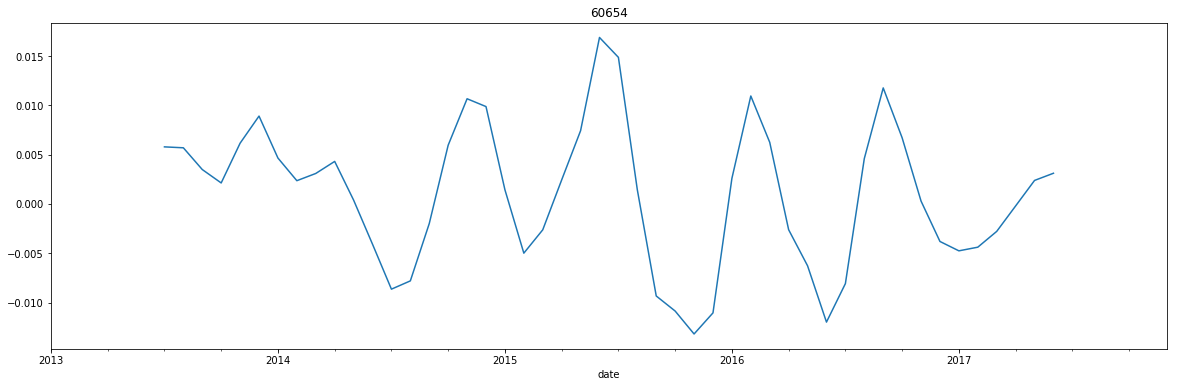

Test Statistic                 -2.594180
p-value                         0.094206
#Lags Used                      6.000000
Number of Observations Used    41.000000
Critical Values (1%)           -3.600983
Critical Values (5%)           -2.935135
Critical Values (10%)          -2.605963
dtype: float64


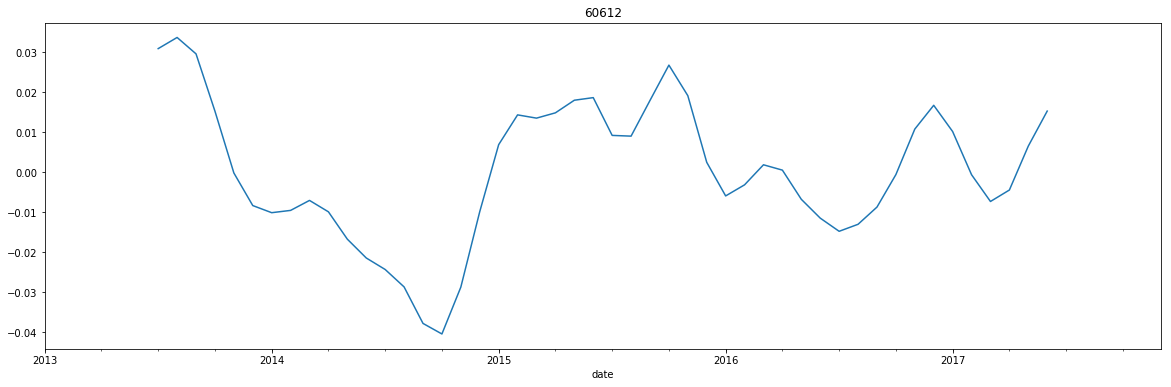

Test Statistic                 -2.830884
p-value                         0.053996
#Lags Used                      7.000000
Number of Observations Used    40.000000
Critical Values (1%)           -3.605565
Critical Values (5%)           -2.937069
Critical Values (10%)          -2.606986
dtype: float64


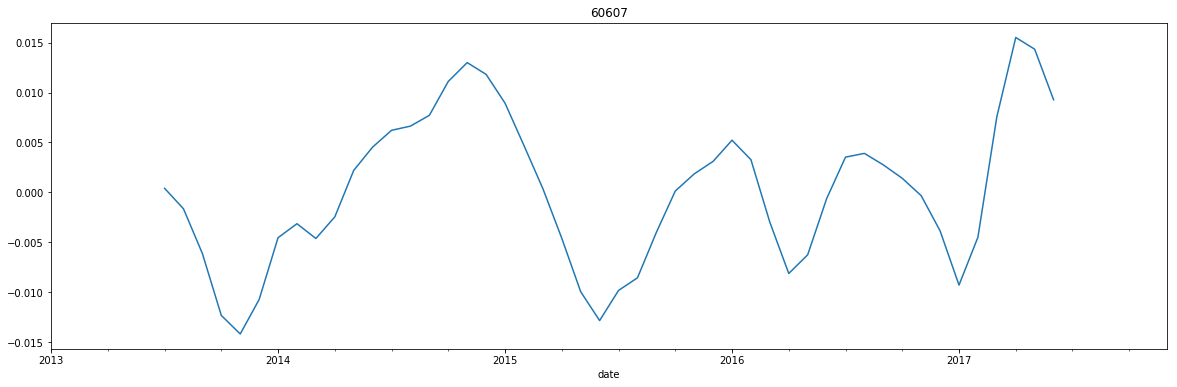

Test Statistic                 -3.643107
p-value                         0.004988
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


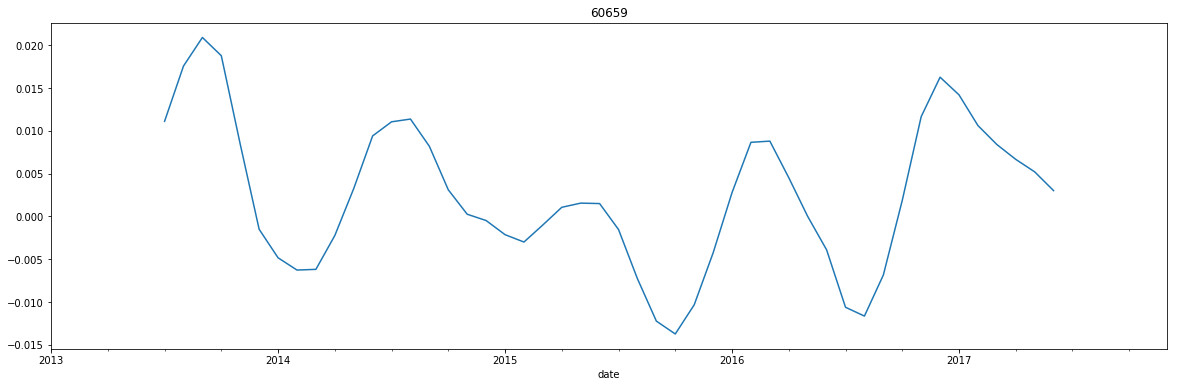

Test Statistic                 -3.736203
p-value                         0.003632
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


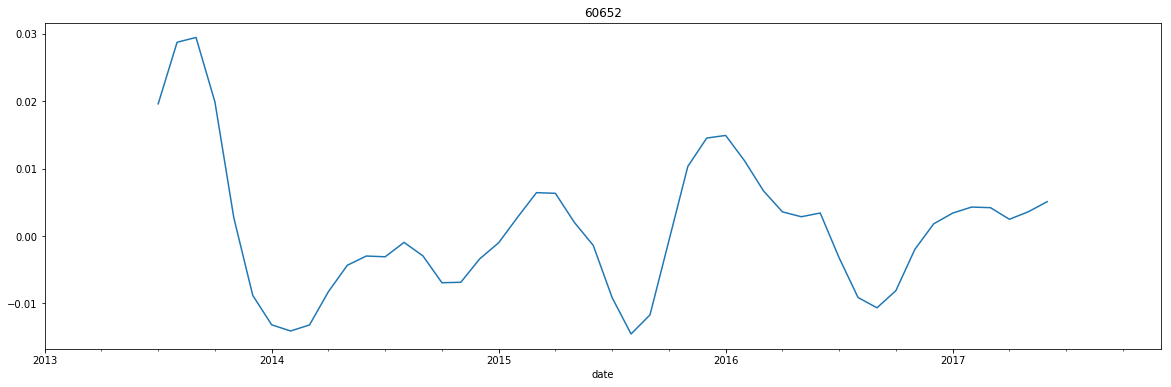

Test Statistic                 -4.131831
p-value                         0.000858
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


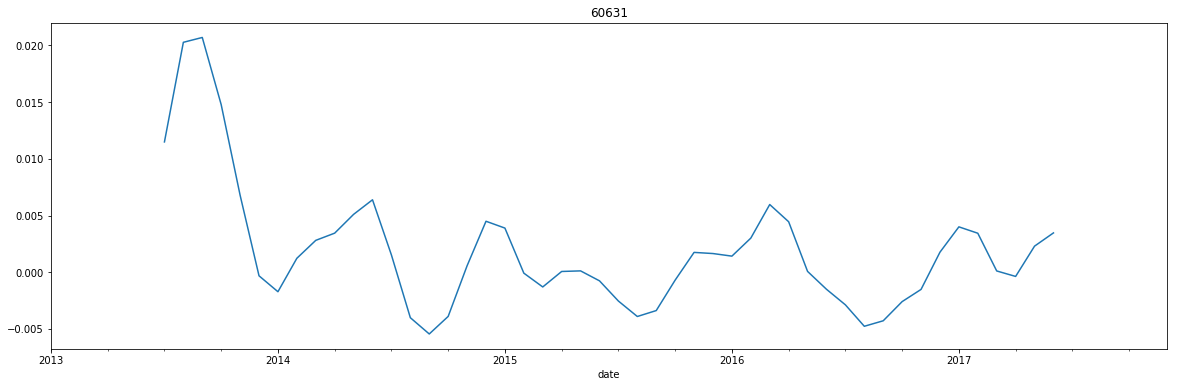

Test Statistic                 -4.783961
p-value                         0.000058
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


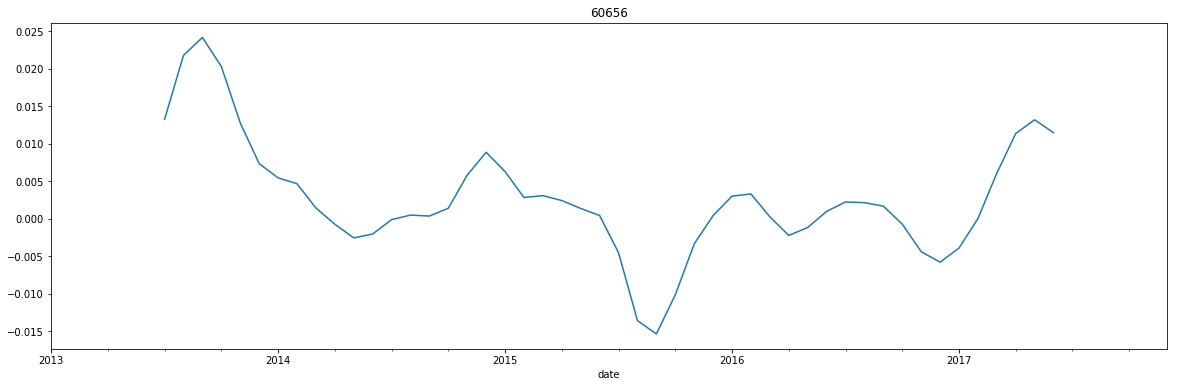

Test Statistic                 -2.375704
p-value                         0.148711
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Values (1%)           -3.592504
Critical Values (5%)           -2.931550
Critical Values (10%)          -2.604066
dtype: float64


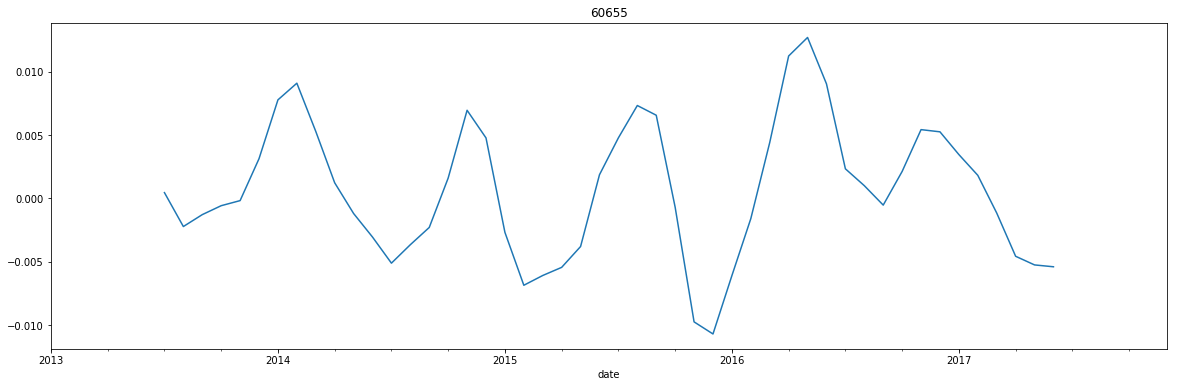

Test Statistic                 -2.572860
p-value                         0.098737
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


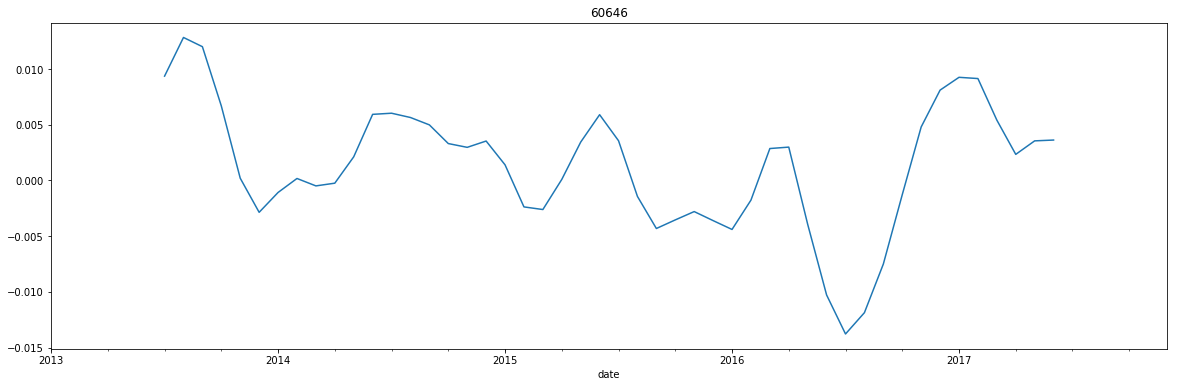

Test Statistic                 -3.267458
p-value                         0.016397
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


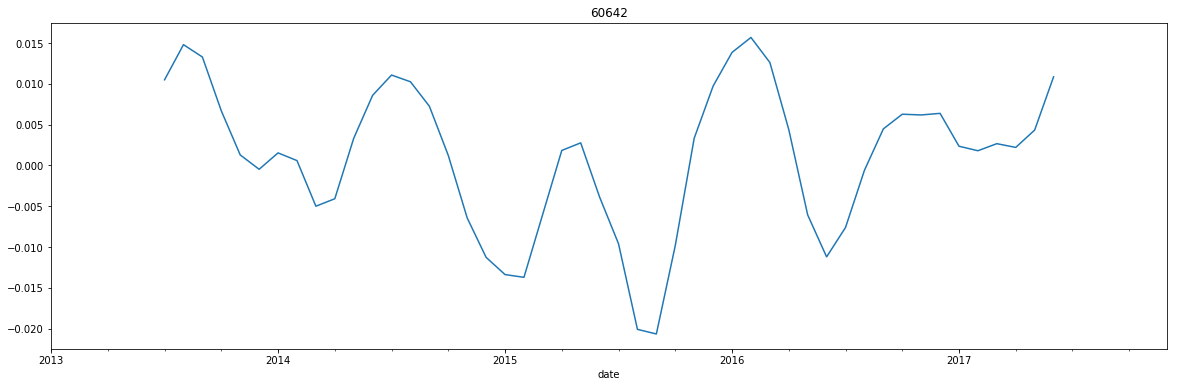

Test Statistic                 -3.013677
p-value                         0.033637
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


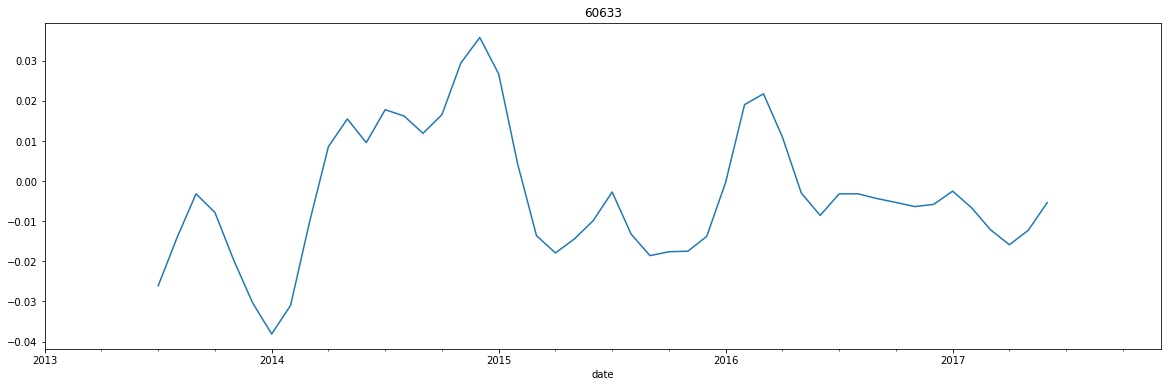

Test Statistic                 -2.233765
p-value                         0.194220
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Values (1%)           -3.584829
Critical Values (5%)           -2.928299
Critical Values (10%)          -2.602344
dtype: float64


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [25]:
[detrend(zillow_chicago,x) for x in list(zillow_chicago.columns)]

In [26]:
z_60647_minus_rolmean = zillow_chicago[60647]-rolmean

NameError: name 'rolmean' is not defined

In [ ]:
fig = plt.figure(figsize=(12,7))
# orig = plt.plot(zillow_chicago[60647], color='blue',label='Original')
mean = plt.plot(z_60647_minus_rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
z_60647_diff = zillow_chicago[60647].diff(periods=1)

In [ ]:
fig = plt.figure(figsize=(12,7))
# orig = plt.plot(zillow_chicago[60647], color='blue',label='Original')
mean = plt.plot(z_60647_diff, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
z_60647_diff.index

In [ ]:
dftest = adfuller(z_60647_diff.dropna())

In [ ]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)



In [ ]:
dfoutput[1]

In [27]:
def detrend(TS, column):
    data_diff = TS[column].diff(periods=12)
    dftest = adfuller(data_diff.dropna())
    data_diff.plot(figsize=(20,6))
    plt.title('{}'.format(column))
    plt.show()
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Values (%s)' %key] = value
    print(dfoutput)
    

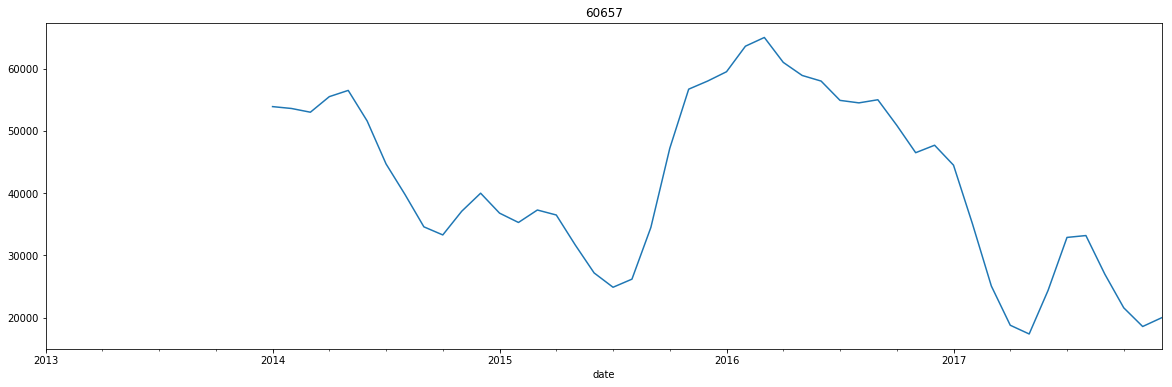

Test Statistic                 -3.113390
p-value                         0.025578
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


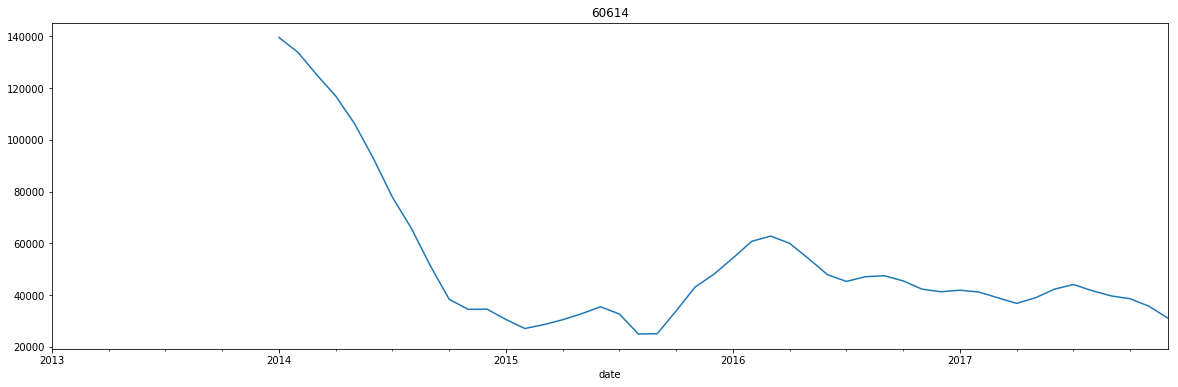

Test Statistic                 -2.700774
p-value                         0.073904
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Values (1%)           -3.620918
Critical Values (5%)           -2.943539
Critical Values (10%)          -2.610400
dtype: float64


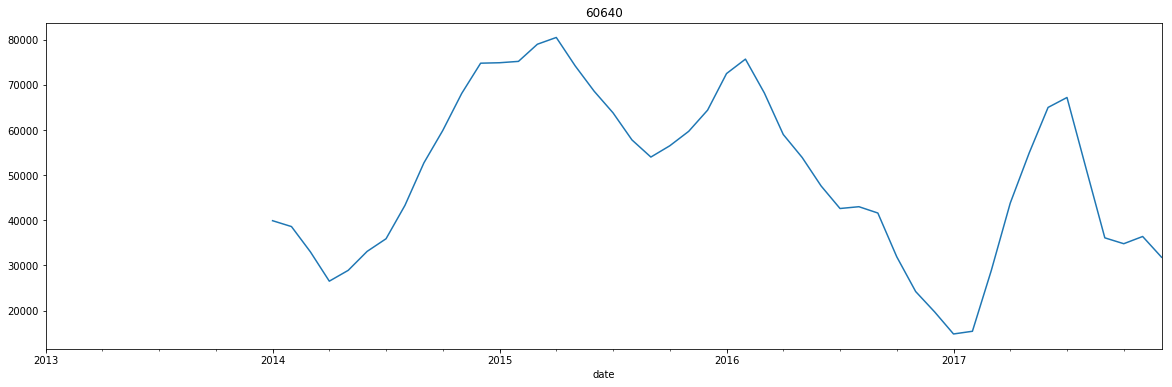

Test Statistic                  0.025201
p-value                         0.960567
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Values (1%)           -3.620918
Critical Values (5%)           -2.943539
Critical Values (10%)          -2.610400
dtype: float64


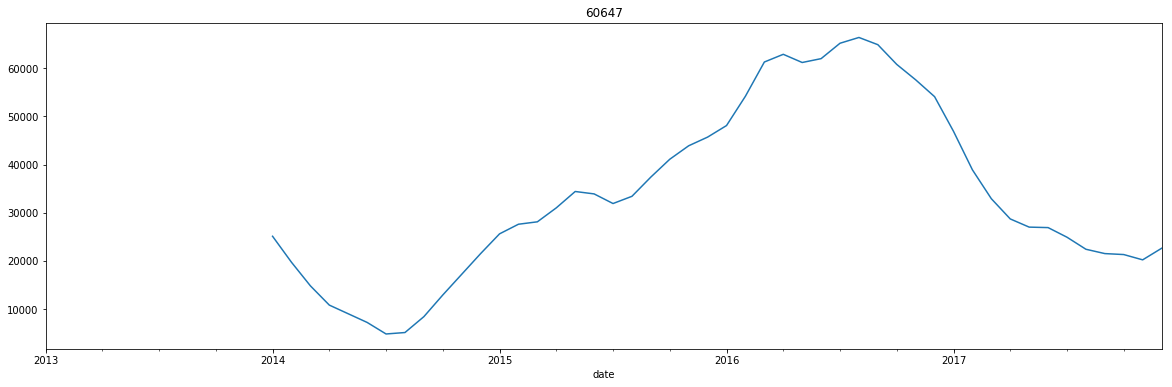

Test Statistic                 -2.149491
p-value                         0.225085
#Lags Used                      6.000000
Number of Observations Used    41.000000
Critical Values (1%)           -3.600983
Critical Values (5%)           -2.935135
Critical Values (10%)          -2.605963
dtype: float64


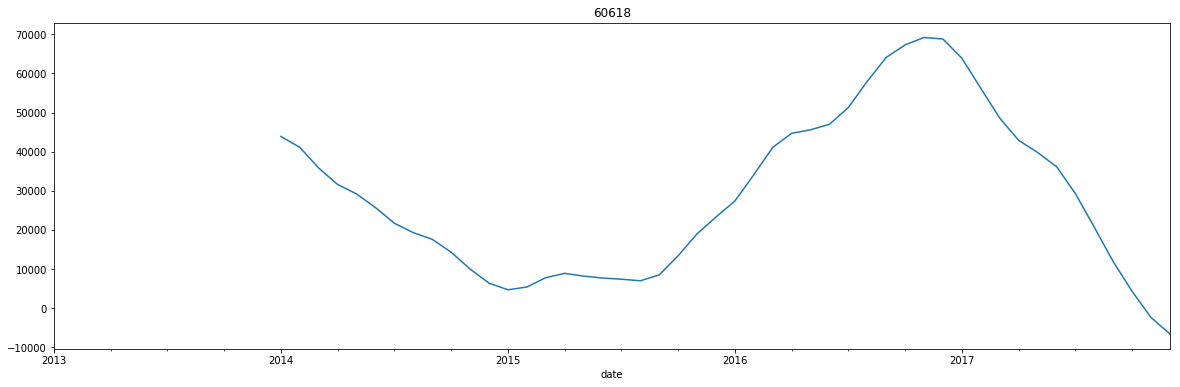

Test Statistic                 -4.349538
p-value                         0.000364
#Lags Used                      8.000000
Number of Observations Used    39.000000
Critical Values (1%)           -3.610400
Critical Values (5%)           -2.939109
Critical Values (10%)          -2.608063
dtype: float64


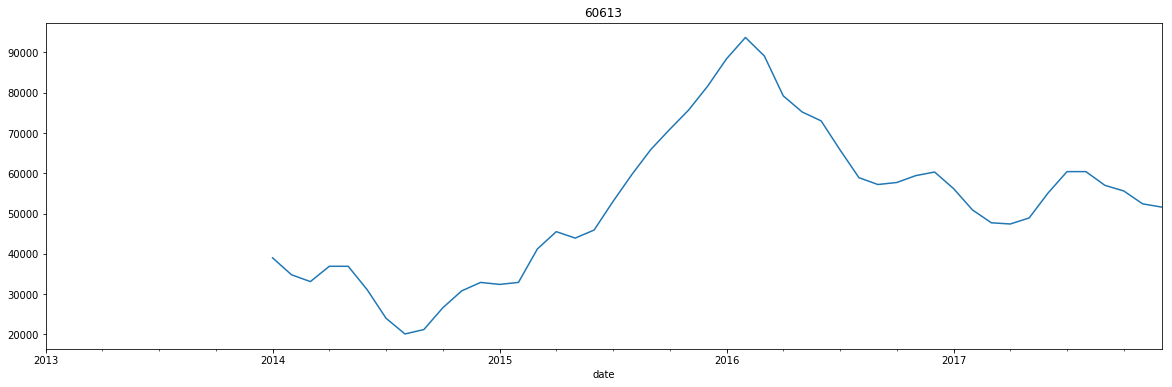

Test Statistic                 -2.328228
p-value                         0.163025
#Lags Used                      5.000000
Number of Observations Used    42.000000
Critical Values (1%)           -3.596636
Critical Values (5%)           -2.933297
Critical Values (10%)          -2.604991
dtype: float64


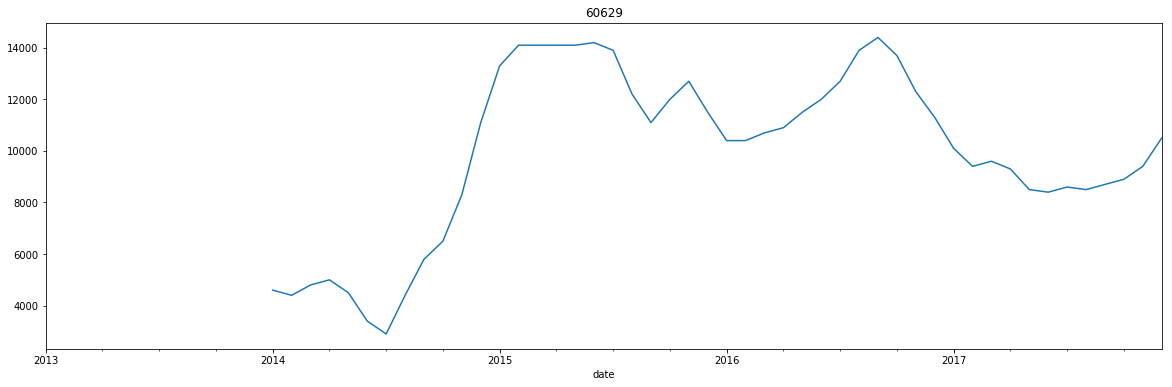

Test Statistic                 -4.097324
p-value                         0.000978
#Lags Used                      5.000000
Number of Observations Used    42.000000
Critical Values (1%)           -3.596636
Critical Values (5%)           -2.933297
Critical Values (10%)          -2.604991
dtype: float64


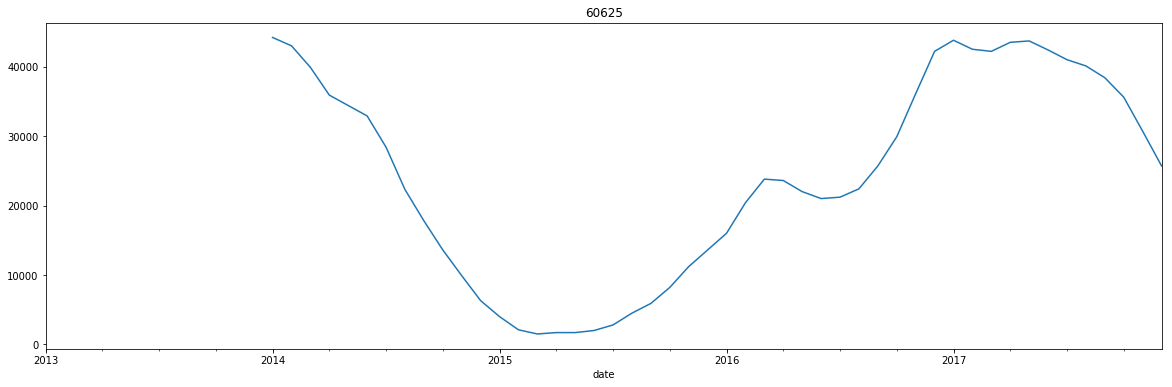

Test Statistic                 -2.700071
p-value                         0.074026
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


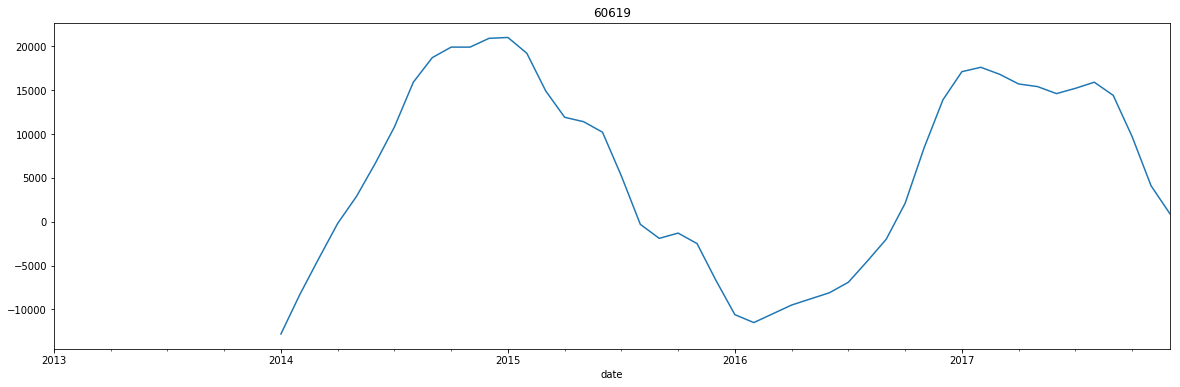

Test Statistic                 -4.866758
p-value                         0.000040
#Lags Used                      8.000000
Number of Observations Used    39.000000
Critical Values (1%)           -3.610400
Critical Values (5%)           -2.939109
Critical Values (10%)          -2.608063
dtype: float64


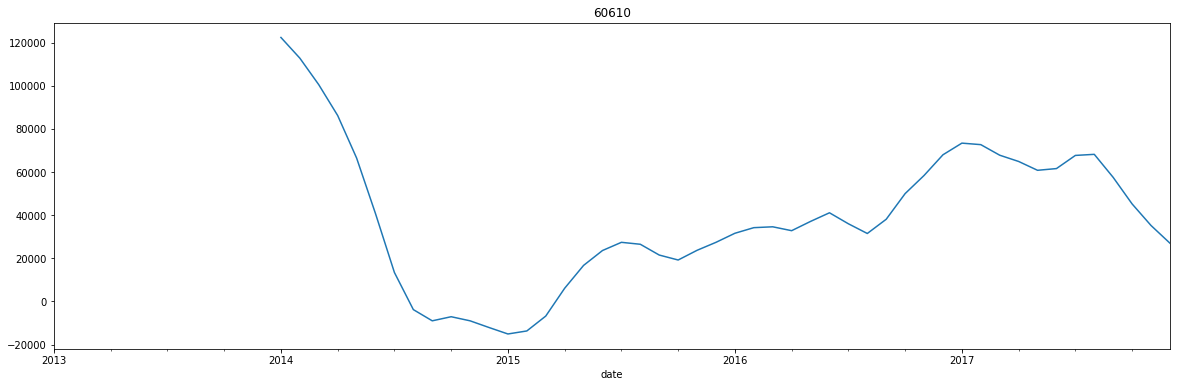

Test Statistic                 -1.023425
p-value                         0.744625
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Values (1%)           -3.620918
Critical Values (5%)           -2.943539
Critical Values (10%)          -2.610400
dtype: float64


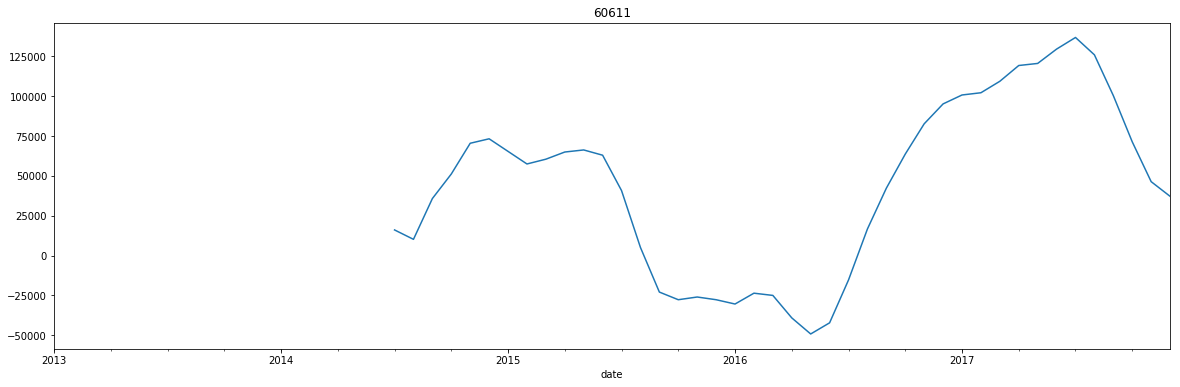

Test Statistic                 -2.852973
p-value                         0.051096
#Lags Used                      7.000000
Number of Observations Used    34.000000
Critical Values (1%)           -3.639224
Critical Values (5%)           -2.951230
Critical Values (10%)          -2.614447
dtype: float64


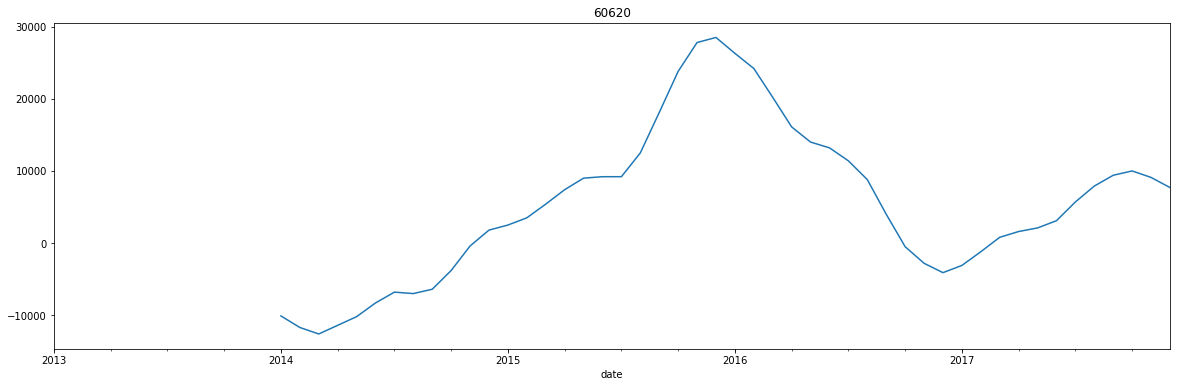

Test Statistic                 -2.086527
p-value                         0.249967
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


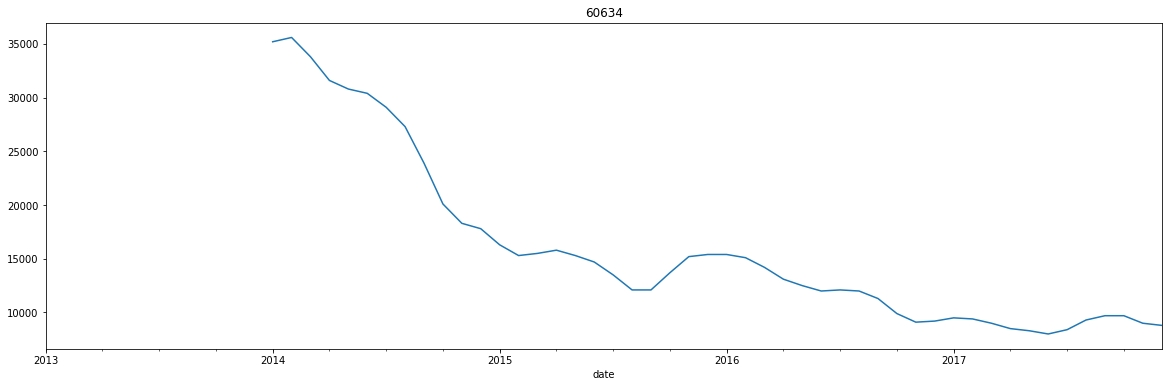

Test Statistic                 -3.697329
p-value                         0.004151
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Values (1%)           -3.592504
Critical Values (5%)           -2.931550
Critical Values (10%)          -2.604066
dtype: float64


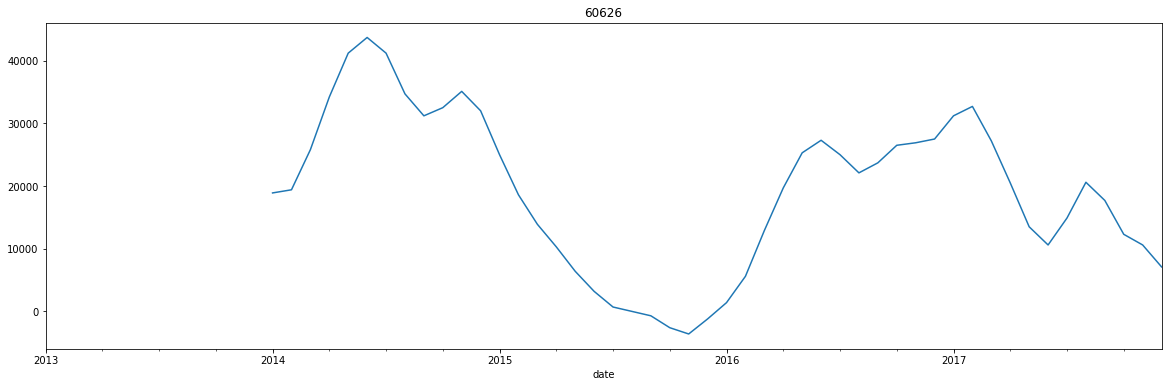

Test Statistic                 -5.269375
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


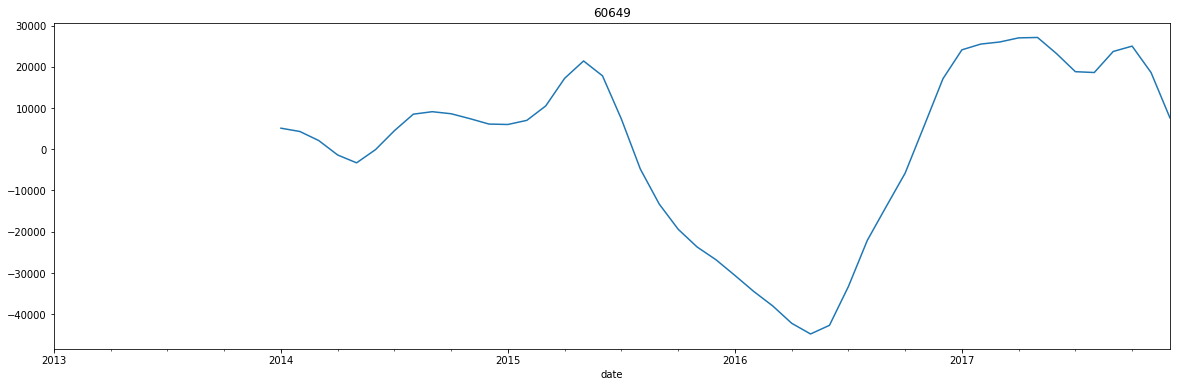

Test Statistic                 -3.662573
p-value                         0.004671
#Lags Used                      7.000000
Number of Observations Used    40.000000
Critical Values (1%)           -3.605565
Critical Values (5%)           -2.937069
Critical Values (10%)          -2.606986
dtype: float64


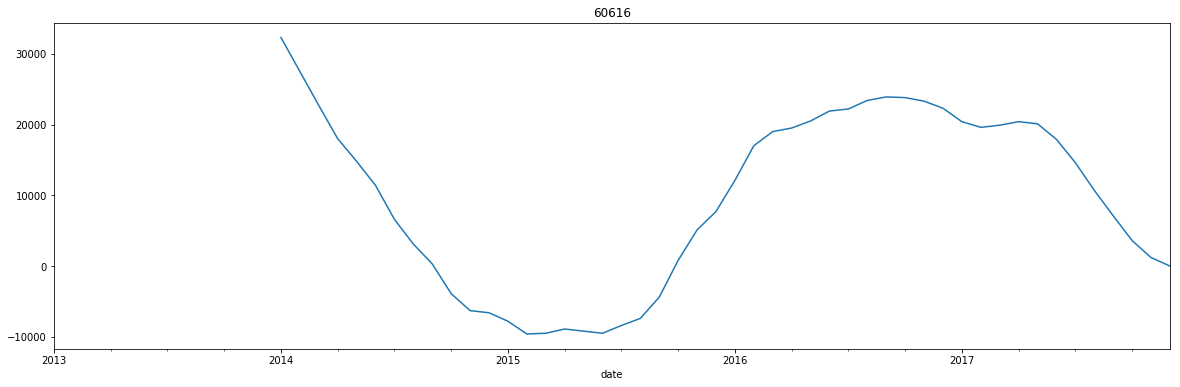

Test Statistic                 -3.390202
p-value                         0.011297
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


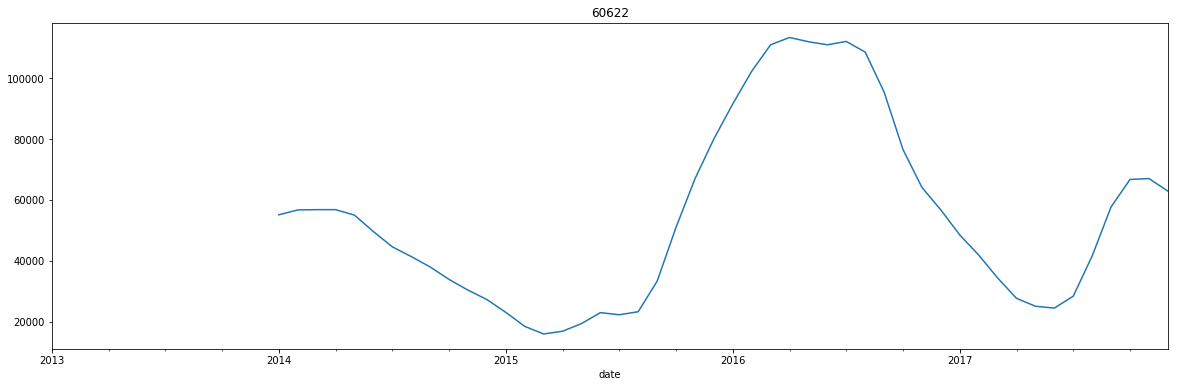

Test Statistic                 -3.568039
p-value                         0.006402
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


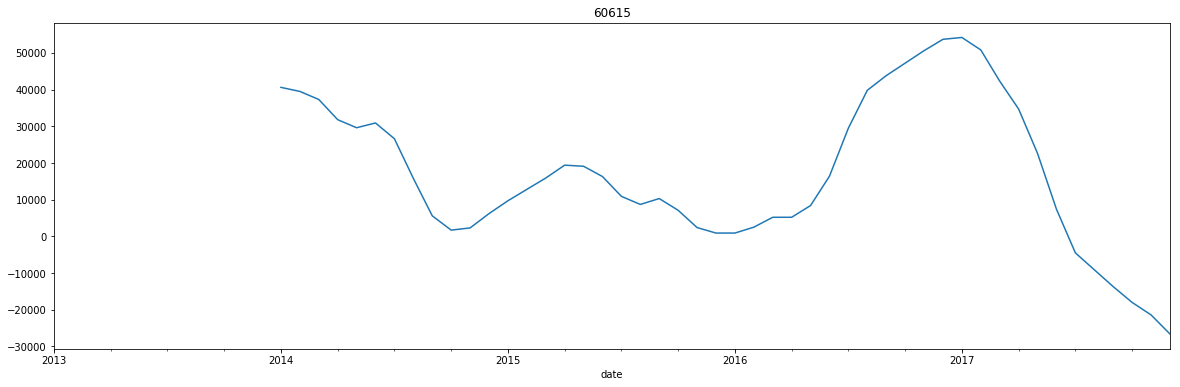

Test Statistic                 -2.718054
p-value                         0.070966
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


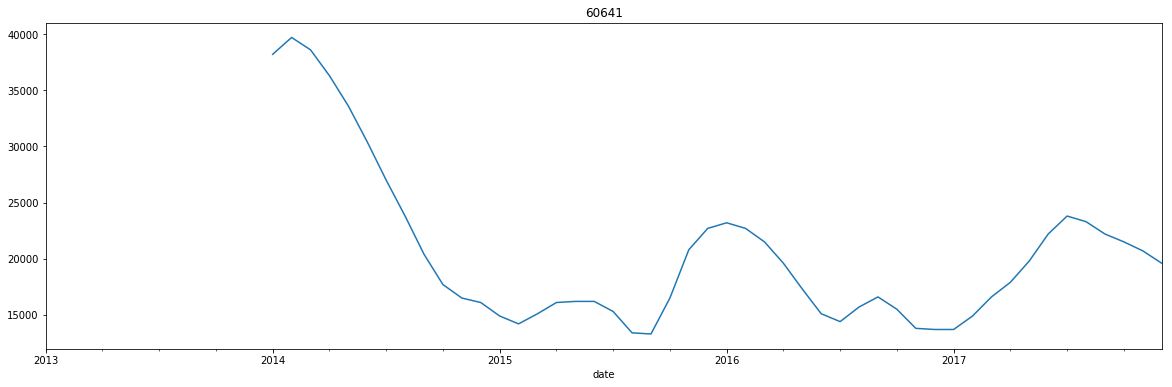

Test Statistic                 -4.184528
p-value                         0.000700
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


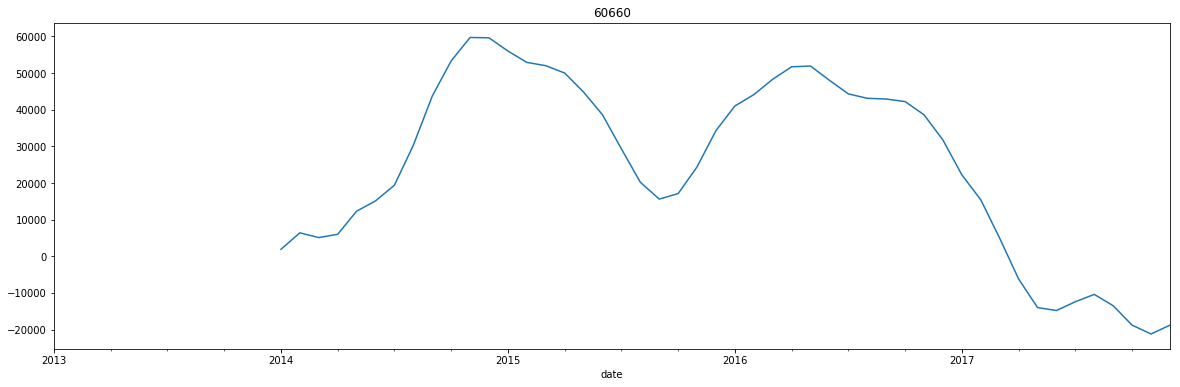

Test Statistic                 -1.954417
p-value                         0.306910
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


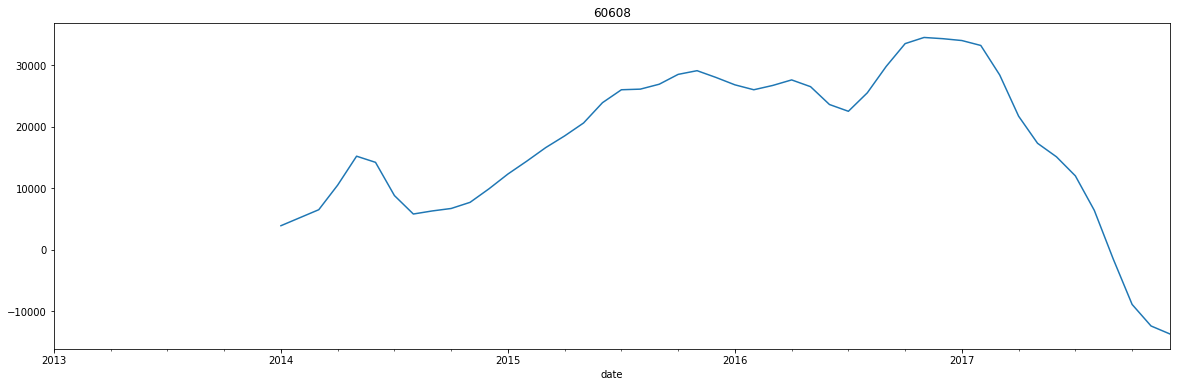

Test Statistic                 -1.185406
p-value                         0.679842
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


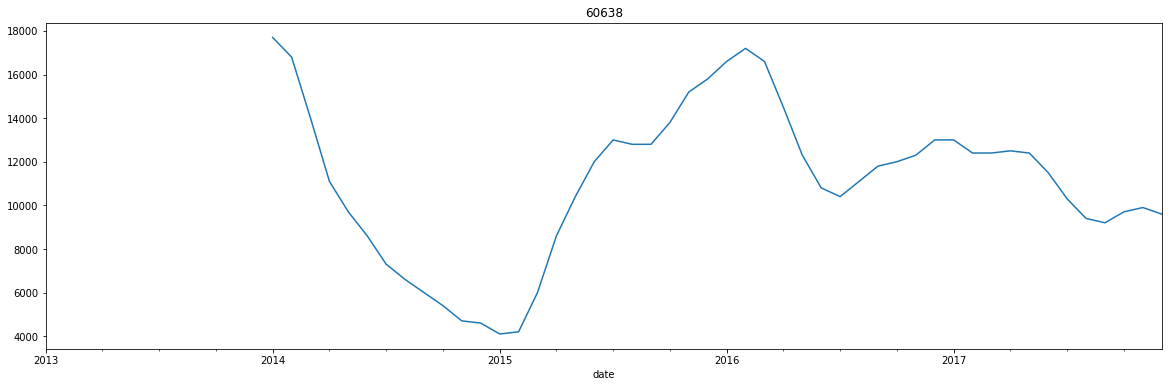

Test Statistic                 -2.045667
p-value                         0.266916
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Values (1%)           -3.620918
Critical Values (5%)           -2.943539
Critical Values (10%)          -2.610400
dtype: float64


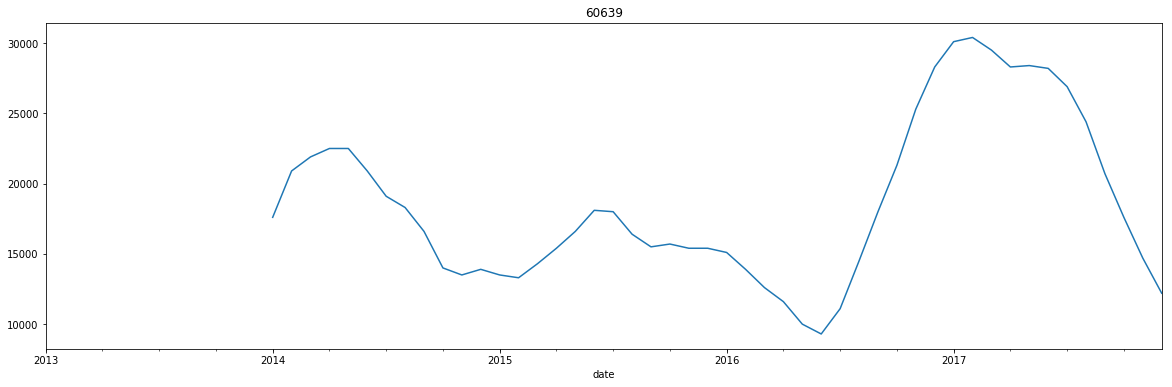

Test Statistic                 -1.045553
p-value                         0.736290
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Values (1%)           -3.620918
Critical Values (5%)           -2.943539
Critical Values (10%)          -2.610400
dtype: float64


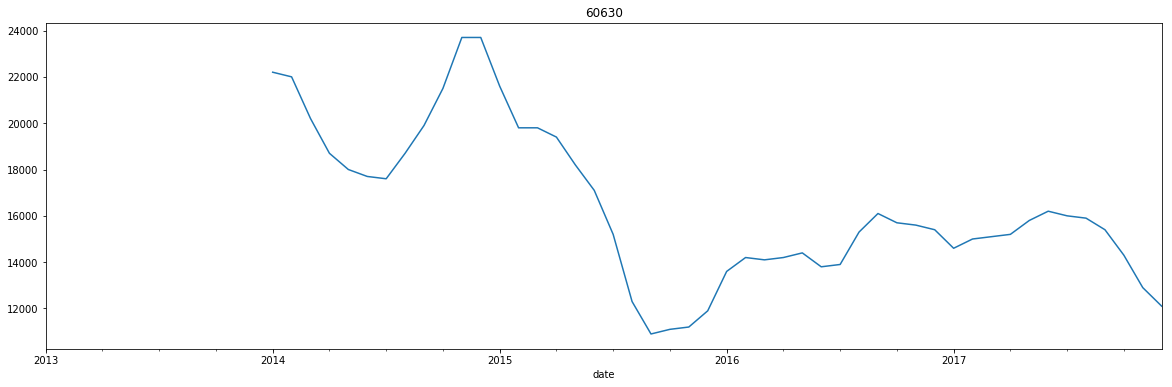

Test Statistic                 -1.507314
p-value                         0.529890
#Lags Used                      6.000000
Number of Observations Used    41.000000
Critical Values (1%)           -3.600983
Critical Values (5%)           -2.935135
Critical Values (10%)          -2.605963
dtype: float64


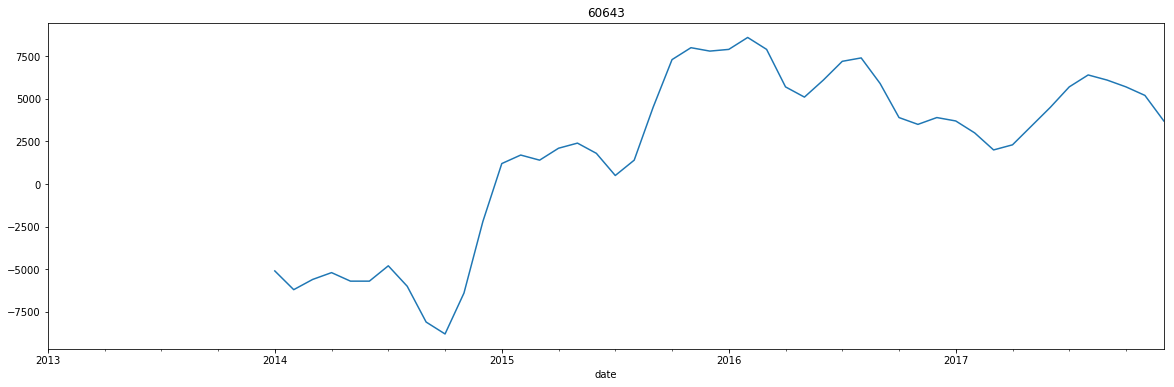

Test Statistic                 -4.361453
p-value                         0.000347
#Lags Used                      8.000000
Number of Observations Used    39.000000
Critical Values (1%)           -3.610400
Critical Values (5%)           -2.939109
Critical Values (10%)          -2.608063
dtype: float64


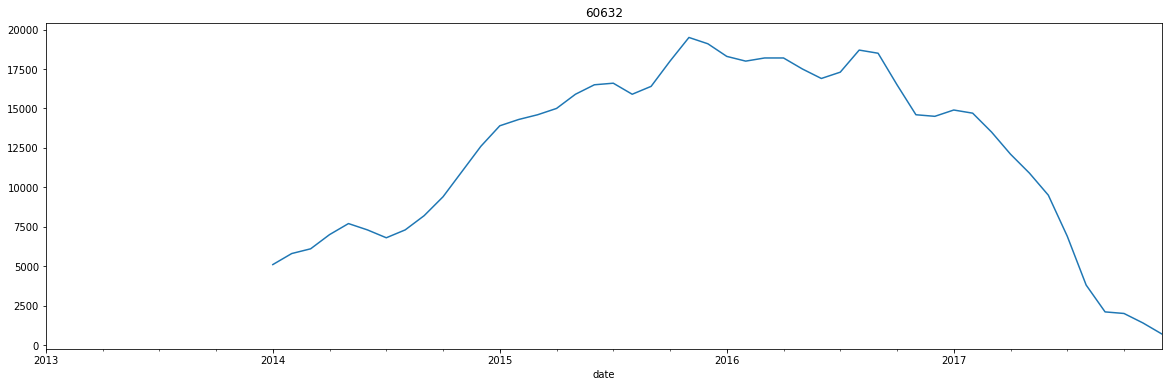

Test Statistic                 -2.181076
p-value                         0.213185
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


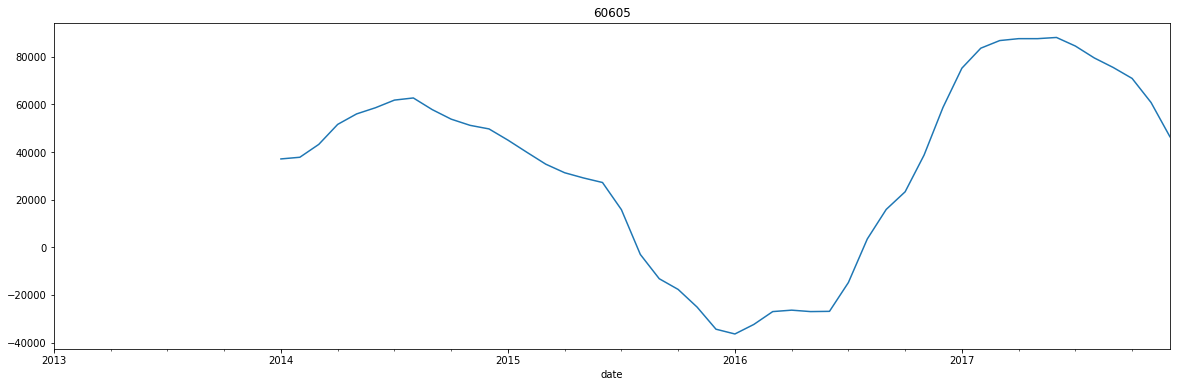

Test Statistic                 -4.222657
p-value                         0.000603
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


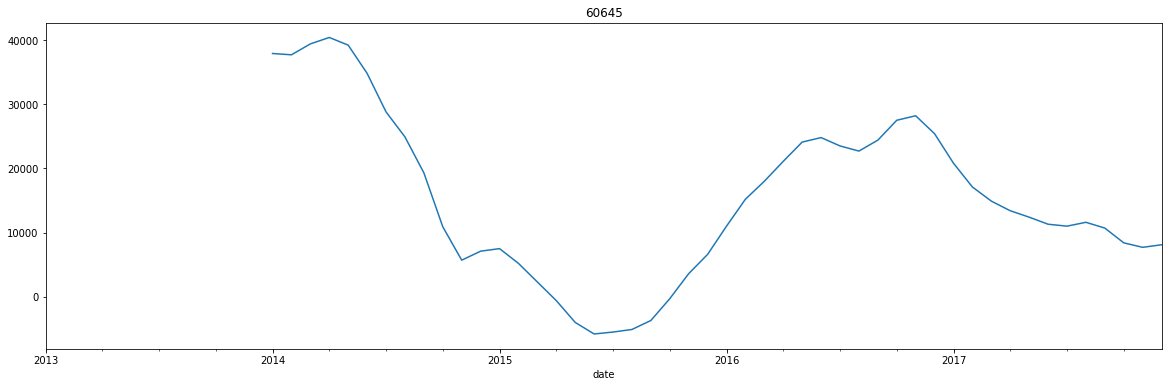

Test Statistic                 -4.317564
p-value                         0.000414
#Lags Used                      8.000000
Number of Observations Used    39.000000
Critical Values (1%)           -3.610400
Critical Values (5%)           -2.939109
Critical Values (10%)          -2.608063
dtype: float64


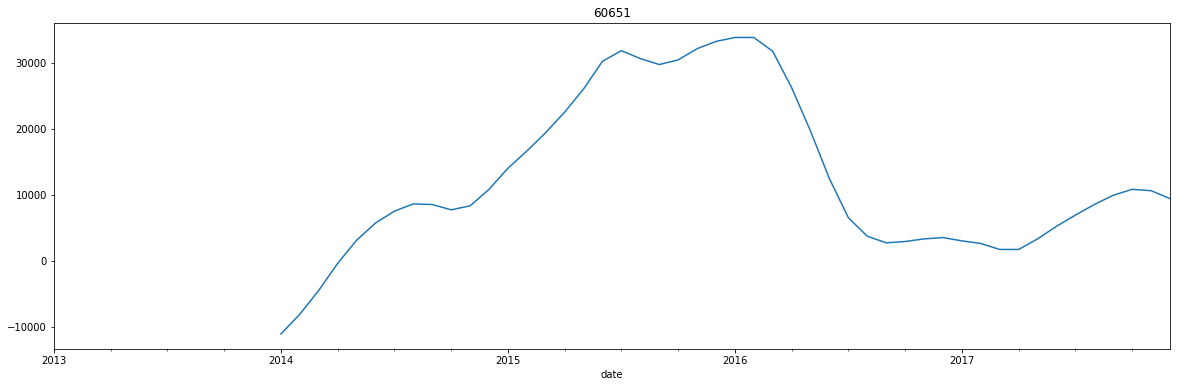

Test Statistic                 -1.767136
p-value                         0.396895
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


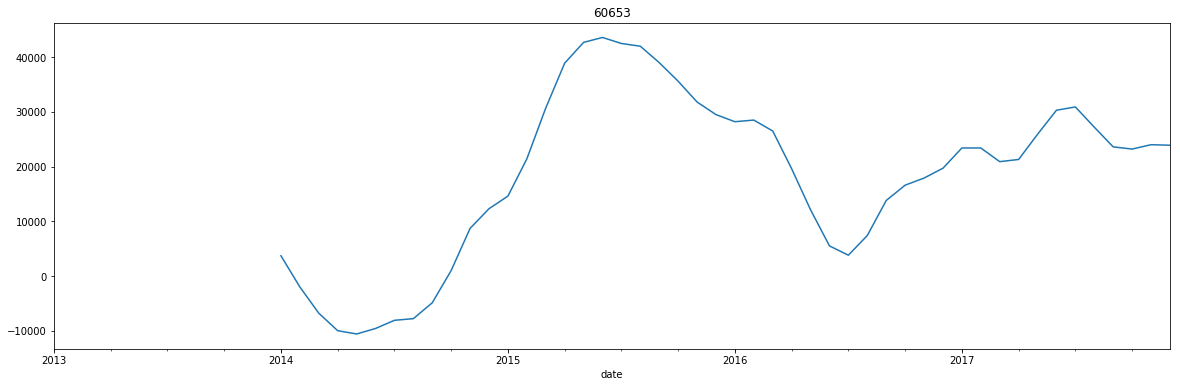

Test Statistic                 -4.534765
p-value                         0.000170
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


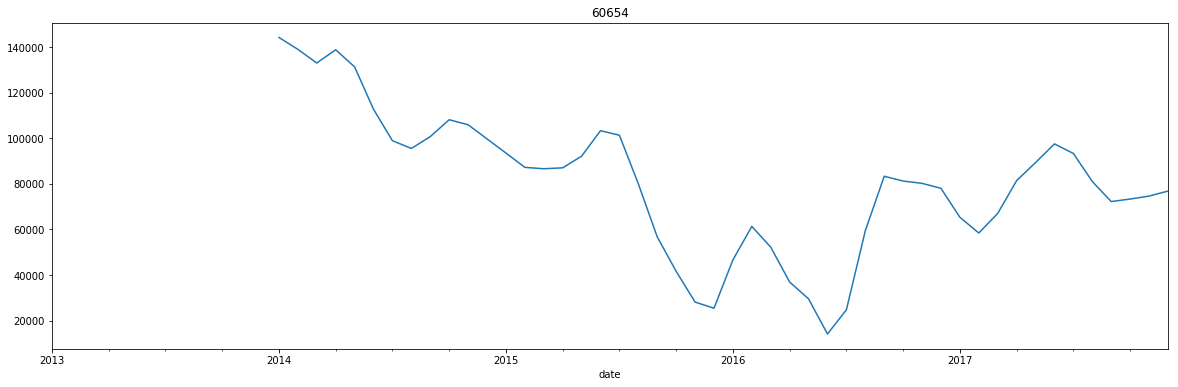

Test Statistic                 -1.620109
p-value                         0.472672
#Lags Used                      6.000000
Number of Observations Used    41.000000
Critical Values (1%)           -3.600983
Critical Values (5%)           -2.935135
Critical Values (10%)          -2.605963
dtype: float64


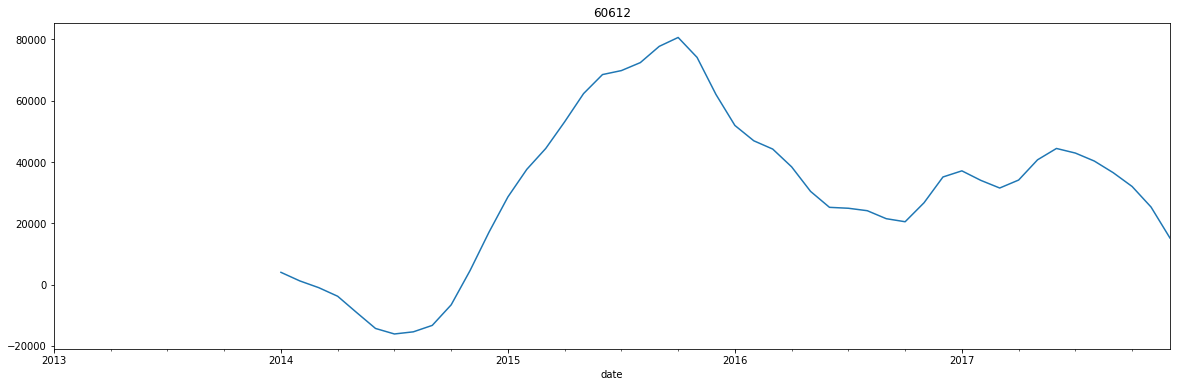

Test Statistic                 -4.180887
p-value                         0.000710
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


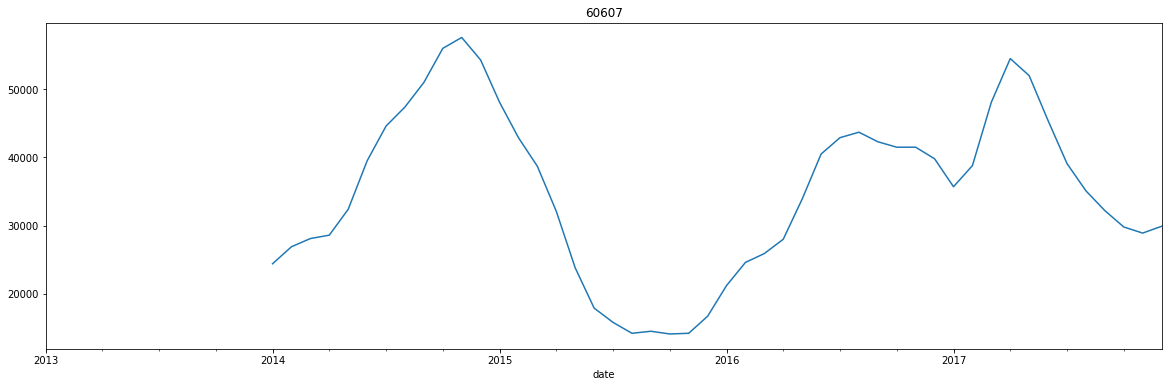

Test Statistic                 -3.532168
p-value                         0.007198
#Lags Used                      8.000000
Number of Observations Used    39.000000
Critical Values (1%)           -3.610400
Critical Values (5%)           -2.939109
Critical Values (10%)          -2.608063
dtype: float64


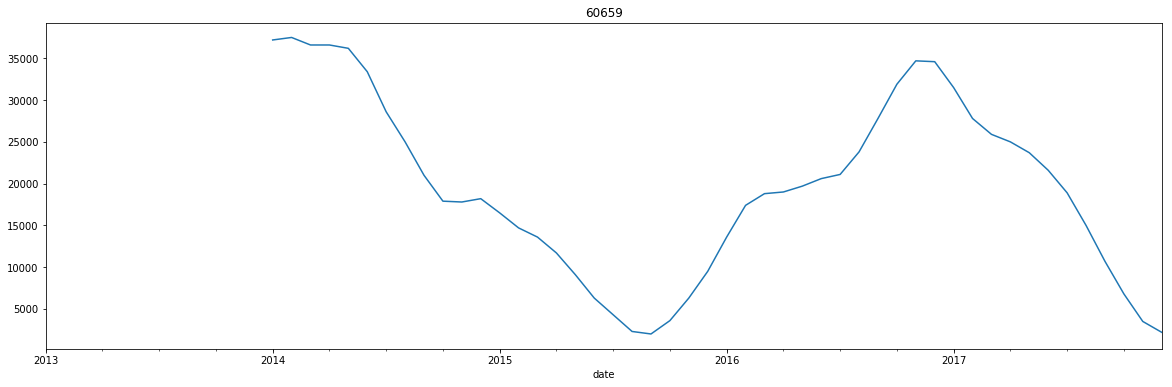

Test Statistic                 -3.558135
p-value                         0.006614
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


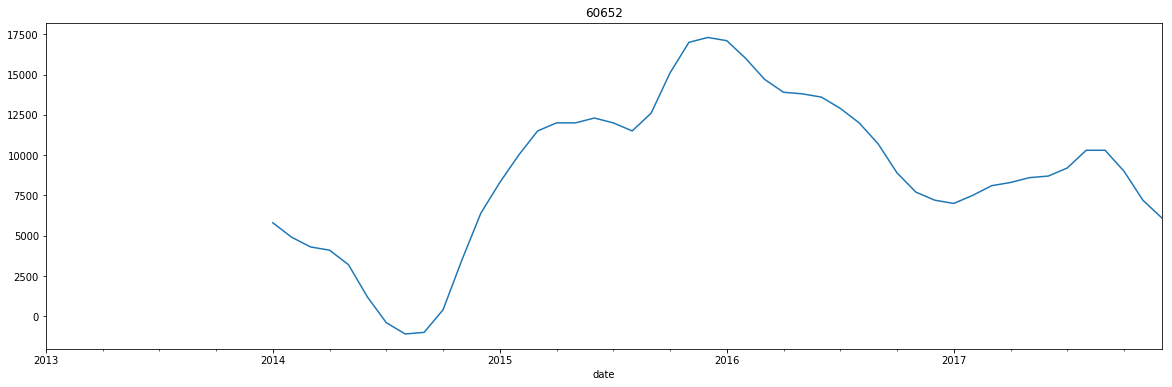

Test Statistic                 -3.007222
p-value                         0.034225
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Values (1%)           -3.620918
Critical Values (5%)           -2.943539
Critical Values (10%)          -2.610400
dtype: float64


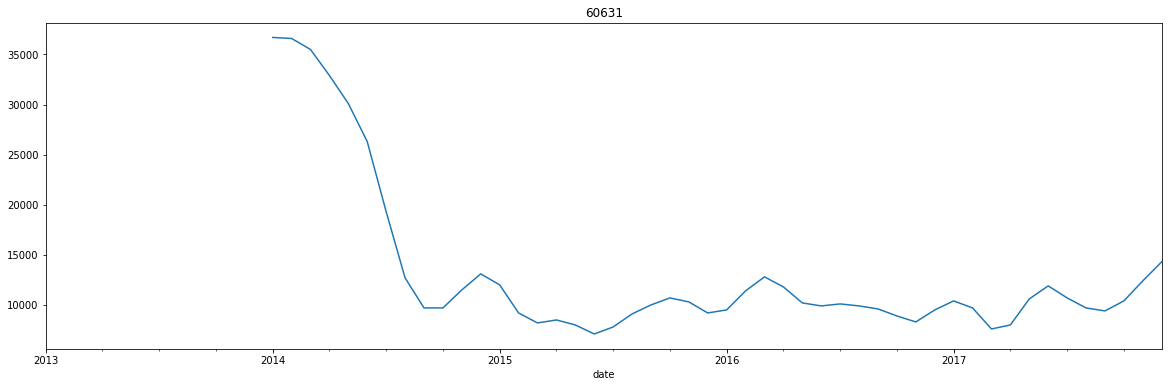

Test Statistic                 -1.338130
p-value                         0.611552
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


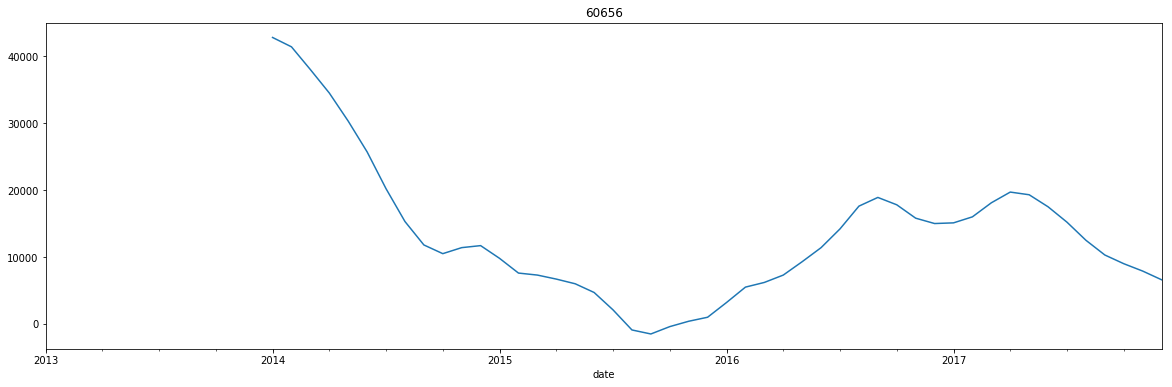

Test Statistic                 -1.799277
p-value                         0.380821
#Lags Used                      8.000000
Number of Observations Used    39.000000
Critical Values (1%)           -3.610400
Critical Values (5%)           -2.939109
Critical Values (10%)          -2.608063
dtype: float64


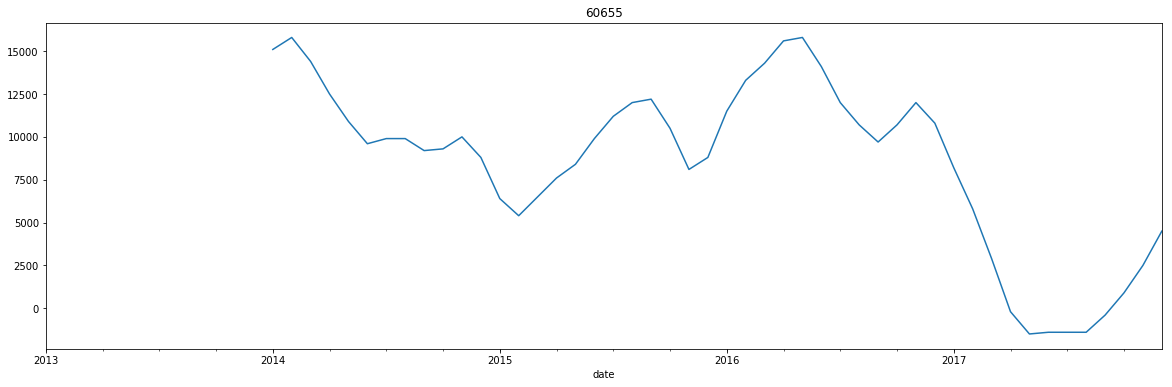

Test Statistic                 -4.197622
p-value                         0.000665
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Values (1%)           -3.615509
Critical Values (5%)           -2.941262
Critical Values (10%)          -2.609200
dtype: float64


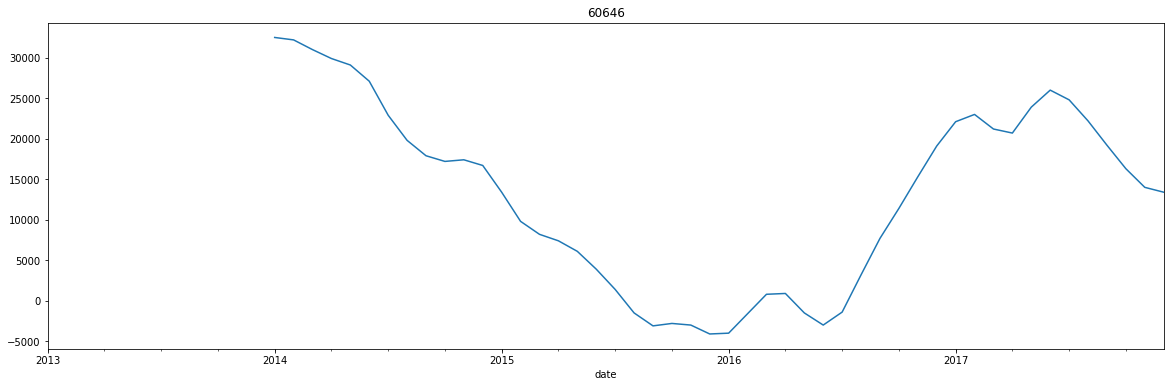

Test Statistic                 -2.489805
p-value                         0.117975
#Lags Used                      5.000000
Number of Observations Used    42.000000
Critical Values (1%)           -3.596636
Critical Values (5%)           -2.933297
Critical Values (10%)          -2.604991
dtype: float64


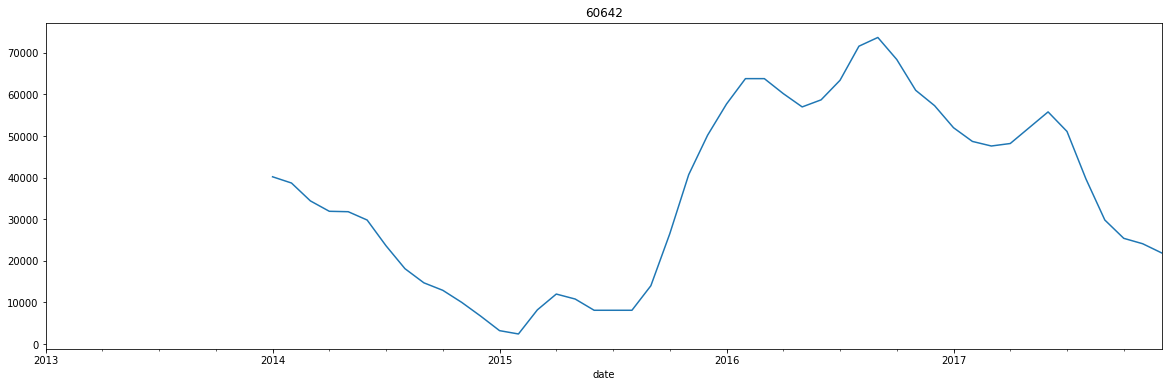

Test Statistic                 -2.427307
p-value                         0.134177
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Values (1%)           -3.620918
Critical Values (5%)           -2.943539
Critical Values (10%)          -2.610400
dtype: float64


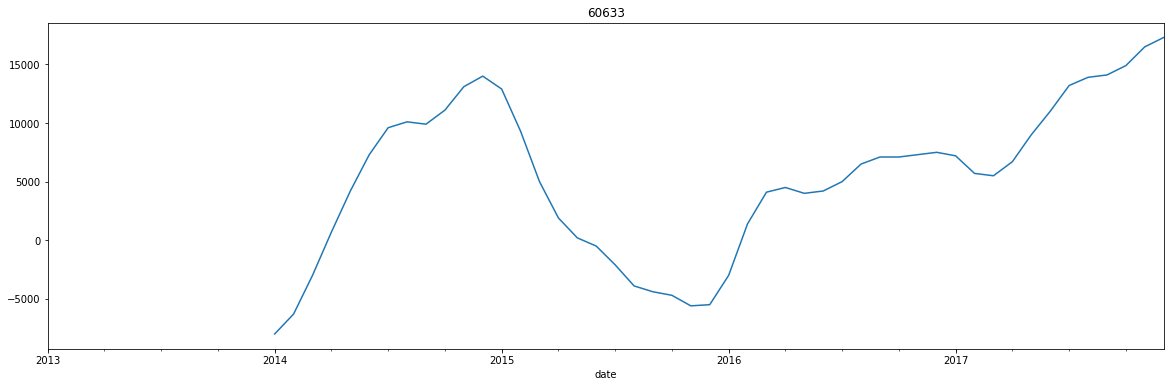

Test Statistic                 -2.267768
p-value                         0.182574
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Values (1%)           -3.588573
Critical Values (5%)           -2.929886
Critical Values (10%)          -2.603185
dtype: float64


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [28]:
[detrend(zillow_chicago,x) for x in list(zillow_chicago.columns)]